Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!

  - Folium maps have custom Javascript and won't display in GitHub : https://stackoverflow.com/questions/53240378/folium-map-fail-to-render-in-notebook-on-github


# CoronaVirus Prediction

### Number of Day to Predict 63

In [1]:
%autosave 360

Autosaving every 360 seconds


In [2]:
num_days_R_prediction=63
num_BackTrack_Days=6

In [3]:
#!pip install rpy2
import rpy2
%load_ext rpy2.ipython
%Rpush num_days_R_prediction

In [4]:
%%R
max_days_prediction<-num_days_R_prediction

In [5]:
bypass_weather=1 # =1 bypass weather_pi api calls
#
number_past_days_training=27 # =(6/14) * num_days_R_prediction  # Number of Past days on training # max to be on 6.Feb.2020
#
max_countries_map=50
#
## DROP_N=15 => 06/02
## DROP_N=45 => 08/03
## DROP_N=75 => 07/04
## DROP_N=145 => 15/06
## DROP_N=175 => 15/07
#
drop_n_dataset_days=235
#

### Load Data from Github - John Hopkins Institute 

In [6]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [7]:
confirmed.iloc[:,:]

Province/State          Country/Region  \
0                                             NaN             Afghanistan   
1                                             NaN                 Albania   
2                                             NaN                 Algeria   
3                                             NaN                 Andorra   
4                                             NaN                  Angola   
5                                             NaN     Antigua and Barbuda   
6                                             NaN               Argentina   
7                                             NaN                 Armenia   
8                    Australian Capital Territory               Australia   
9                                 New South Wales               Australia   
10                             Northern Territory               Australia   
11                                     Queensland               Australia   
12                                South Australia               Australia   
13                                       Tasmania               Australia   
14                                       Victoria               Australia   
15                              Western Australia               Australia   
16                                            NaN                 Austria   
17                                            NaN              Azerbaijan   
18                                            NaN                 Bahamas   
19                                            NaN                 Bahrain   
20                                            NaN              Bangladesh   
21                                            NaN                Barbados   
22                                            NaN                 Belarus   
23                                            NaN                 Belgium   
24                                            NaN                  Belize   
25                                            NaN                   Benin   
26                                            NaN                  Bhutan   
27                                            NaN                 Bolivia   
28                                            NaN  Bosnia and Herzegovina   
29                                            NaN                Botswana   
..                                            ...                     ...   
249                                           NaN             Timor-Leste   
250                                           NaN                    Togo   
251                                           NaN     Trinidad and Tobago   
252                                           NaN                 Tunisia   
253                                           NaN                  Turkey   
254                                           NaN           United States   
255                                           NaN                  Uganda   
256                                           NaN                 Ukraine   
257                                           NaN    United Arab Emirates   
258                                      Anguilla          United Kingdom   
259                                       Bermuda          United Kingdom   
260                        British Virgin Islands          United Kingdom   
261                                Cayman Islands          United Kingdom   
262                               Channel Islands          United Kingdom   
263                   Falkland Islands (Malvinas)          United Kingdom   
264                                     Gibraltar          United Kingdom   
265                                   Isle of Man          United Kingdom   
266                                    Montserrat          United Kingdom   
267  Saint Helena, Ascension and Tristan da Cunha          United Kingdom   
268                      Turks and Caicos Islands          United Kingdom   
269                            

## Get Population

In [8]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/data/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [9]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

Province/State          Country/Region  \
0                                             NaN             Afghanistan   
1                                             NaN                 Albania   
2                                             NaN                 Algeria   
3                                             NaN                 Andorra   
4                                             NaN                  Angola   
5                                             NaN     Antigua and Barbuda   
6                                             NaN               Argentina   
7                                             NaN                 Armenia   
8                    Australian Capital Territory               Australia   
9                                 New South Wales               Australia   
10                             Northern Territory               Australia   
11                                     Queensland               Australia   
12                                South Australia               Australia   
13                                       Tasmania               Australia   
14                                       Victoria               Australia   
15                              Western Australia               Australia   
16                                            NaN                 Austria   
17                                            NaN              Azerbaijan   
18                                            NaN                 Bahamas   
19                                            NaN                 Bahrain   
20                                            NaN              Bangladesh   
21                                            NaN                Barbados   
22                                            NaN                 Belarus   
23                                            NaN                 Belgium   
24                                            NaN                  Belize   
25                                            NaN                   Benin   
26                                            NaN                  Bhutan   
27                                            NaN                 Bolivia   
28                                            NaN  Bosnia and Herzegovina   
29                                            NaN                Botswana   
..                                            ...                     ...   
255                                           NaN             Timor-Leste   
256                                           NaN                    Togo   
257                                           NaN     Trinidad and Tobago   
258                                           NaN                 Tunisia   
259                                           NaN                  Turkey   
260                                           NaN           United States   
261                                           NaN                  Uganda   
262                                           NaN                 Ukraine   
263                                           NaN    United Arab Emirates   
264                                      Anguilla          United Kingdom   
265                                       Bermuda          United Kingdom   
266                        British Virgin Islands          United Kingdom   
267                                Cayman Islands          United Kingdom   
268                               Channel Islands          United Kingdom   
269                   Falkland Islands (Malvinas)          United Kingdom   
270                                     Gibraltar          United Kingdom   
271                                   Isle of Man          United Kingdom   
272                                    Montserrat          United Kingdom   
273  Saint Helena, Ascension and Tristan da Cunha          United Kingdom   
274                      Turks and Caicos Islands          United Kingdom   
275                            

In [10]:
# merge region death
death.iloc[185:195,:]

Province/State    Country/Region        Lat        Long  1/22/20  1/23/20  \
185            NaN             Malta  35.937500   14.375400        0        0   
186            NaN  Marshall Islands   7.131500  171.184500        0        0   
187            NaN        Mauritania  21.007900  -10.940800        0        0   
188            NaN         Mauritius -20.348404   57.552152        0        0   
189            NaN            Mexico  23.634500 -102.552800        0        0   
190            NaN        Micronesia   7.425600  150.550800        0        0   
191            NaN           Moldova  47.411600   28.369900        0        0   
192            NaN            Monaco  43.733300    7.416700        0        0   
193            NaN          Mongolia  46.862500  103.846700        0        0   
194            NaN        Montenegro  42.708678   19.374390        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  7/3/21  7/4/21  7/5/21  7/6/21  \
185        0        0        0        0  ...     420     420     420     420   
186        0        0        0        0  ...       0       0       0       0   
187        0        0        0        0  ...     489     489     489     489   
188        0        0        0        0  ...      18      18      18      18   
189        0        0        0        0  ...  233580  233622  233689  233958   
190        0        0        0        0  ...       0       0       0       0   
191        0        0        0        0  ...    6195    6196    6197    6200   
192        0        0        0        0  ...      33      33      33      33   
193        0        0        0        0  ...     617     629     629     646   
194        0        0        0        0  ...    1614    1615    1619    1619   

     7/7/21  7/8/21  7/9/21  7/10/21   Population                 region  
185     420     420     420      420       441,543             Malta_nan  
186       0       0       0        0           NaN  Marshall Islands_nan  
187     490     490     493      494     4,649,658        Mauritania_nan  
188      18      18      18       18           NaN         Mauritius_nan  
189  234192  234458  234675   234907   128,640,794            Mexico_nan  
190       0       0       0        0           NaN        Micronesia_nan  
191    6203    6205    6207     6208     4,035,942           Moldova_nan  
192      33      33      33       33        39,183            Monaco_nan  
193     646     660     660      684     3,278,290          Mongolia_nan  
194    1619    1619    1620     1620       622 500        Montenegro_nan  

[10 rows x 542 columns]

In [11]:
# merge region recover
recover.iloc[175:185,:]

Province/State Country/Region        Lat       Long  \
175                               NaN         Monaco  43.733300    7.41670   
176                               NaN       Mongolia  46.862500  103.84670   
177                               NaN     Montenegro  42.708678   19.37439   
178                               NaN        Morocco  31.791700   -7.09260   
179                               NaN     Mozambique -18.665700   35.52960   
180                               NaN        Namibia -22.957600   18.49040   
181                               NaN          Nepal  28.166700   84.25000   
182                             Aruba    Netherlands  12.521100  -69.96830   
183  Bonaire, Sint Eustatius and Saba    Netherlands  12.178400  -68.23850   
184                           Curacao    Netherlands  12.169600  -68.99000   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  7/3/21  \
175        0        0        0        0        0        0  ...    2533   
176        0        0        0        0        0        0  ...   82933   
177        0        0        0        0        0        0  ...   98403   
178        0        0        0        0        0        0  ...  519139   
179        0        0        0        0        0        0  ...   71628   
180        0        0        0        0        0        0  ...   69672   
181        0        0        0        0        0        0  ...  606666   
182        0        0        0        0        0        0  ...   11009   
183        0        0        0        0        0        0  ...    1619   
184        0        0        0        0        0        0  ...   12199   

     7/4/21  7/5/21  7/6/21  7/7/21  7/8/21  7/9/21  7/10/21   Population   \
175    2537    2539    2541    2541    2542    2542     2542        39,183   
176   87145   87145   89717   92299   96513   96513   103666     3,278,290   
177   98424   98441   98452   98464   98476   98491    98514       622 500   
178  519696  520107  520963  521671  522377  523128   523998    36,817,128   
179   71634   72167   72404   72437   72449   72894    72899    31,542,919   
180   70383   70773   71518   75272   75850   76102    76871     2,540,905   
181  609218  611429  612994  614327  615613  616929   618361    29,300,000   
182   11009   11009   11009   11009   11009   11029    11029       116,600   
183    1619    1623    1623    1623    1631    1631     1631        26,000   
184   12199   12199   12205   12208   12208   12214    12218       158,665   

                                           region  
175                                    Monaco_nan  
176                                  Mongolia_nan  
177                                Montenegro_nan  
178                                   Morocco_nan  
179                                Mozambique_nan  
180                                   Namibia_nan  
181                                     Nepal_nan  
182                             Netherlands_Aruba  
183  Netherlands_Bonaire, Sint Eustatius and Saba  
184                           Netherlands_Curacao  

[10 rows x 542 columns]

In [12]:
confirmed.iloc[185:195,:]

Province/State    Country/Region        Lat        Long  1/22/20  1/23/20  \
185            NaN             Malta  35.937500   14.375400        0        0   
186            NaN  Marshall Islands   7.131500  171.184500        0        0   
187            NaN        Mauritania  21.007900  -10.940800        0        0   
188            NaN         Mauritius -20.348404   57.552152        0        0   
189            NaN            Mexico  23.634500 -102.552800        0        0   
190            NaN        Micronesia   7.425600  150.550800        0        0   
191            NaN           Moldova  47.411600   28.369900        0        0   
192            NaN            Monaco  43.733300    7.416700        0        0   
193            NaN          Mongolia  46.862500  103.846700        0        0   
194            NaN        Montenegro  42.708678   19.374390        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...   7/3/21   7/4/21   7/5/21  \
185        0        0        0        0  ...    30640    30652    30664   
186        0        0        0        0  ...        4        4        4   
187        0        0        0        0  ...    21027    21076    21134   
188        0        0        0        0  ...     1858     1858     1858   
189        0        0        0        0  ...  2537457  2540068  2541873   
190        0        0        0        0  ...        1        1        1   
191        0        0        0        0  ...   256931   256970   257035   
192        0        0        0        0  ...     2587     2587     2589   
193        0        0        0        0  ...   125260   126811   126811   
194        0        0        0        0  ...   100316   100327   100338   

      7/6/21   7/7/21   7/8/21   7/9/21  7/10/21   Population   \
185    30675    30700    30755    30851    30960       441,543   
186        4        4        4        4        4           NaN   
187    21236    21303    21303    21499    21590     4,649,658   
188     1858     1858     1858     1858     1858           NaN   
189  2549862  2558369  2567821  2577140  2586721   128,640,794   
190        1        1        1        1        1           NaN   
191   257105   257187   257272   257343   257419     4,035,942   
192     2595     2599     2603     2611     2622        39,183   
193   130452   130452   134270   134270   137788     3,278,290   
194   100362   100392   100414   100430   100459       622 500   

                   region  
185             Malta_nan  
186  Marshall Islands_nan  
187        Mauritania_nan  
188         Mauritius_nan  
189            Mexico_nan  
190        Micronesia_nan  
191           Moldova_nan  
192            Monaco_nan  
193          Mongolia_nan  
194        Montenegro_nan  

[10 rows x 542 columns]

In [13]:
confirmed.iloc[220:230,:]

Province/State                    Country/Region        Lat        Long  \
220            NaN                          Portugal  39.399900   -8.224500   
221            NaN                             Qatar  25.354800   51.183900   
222            NaN                           Romania  45.943200   24.966800   
223            NaN                            Russia  61.524010  105.318756   
224            NaN                            Rwanda  -1.940300   29.873900   
225            NaN             Saint Kitts and Nevis  17.357822  -62.782998   
226            NaN                       Saint Lucia  13.909400  -60.978900   
227            NaN  Saint Vincent and the Grenadines  12.984300  -61.287200   
228            NaN                             Samoa -13.759000 -172.104600   
229            NaN                        San Marino  43.942400   12.457800   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...   7/3/21  \
220        0        0        0        0        0        0  ...   887047   
221        0        0        0        0        0        0  ...   222453   
222        0        0        0        0        0        0  ...  1080918   
223        0        0        0        0        0        0  ...  5519516   
224        0        0        0        0        0        0  ...    41696   
225        0        0        0        0        0        0  ...      490   
226        0        0        0        0        0        0  ...     5302   
227        0        0        0        0        0        0  ...     2229   
228        0        0        0        0        0        0  ...        3   
229        0        0        0        0        0        0  ...     5091   

      7/4/21   7/5/21   7/6/21   7/7/21   7/8/21   7/9/21  7/10/21  \
220   889088   890571   892741   896026   899295   902489   905651   
221   222574   222667   222760   222918   223031   223175   223272   
222  1080951  1080979  1081030  1081090  1081120  1081174  1081210   
223  5544209  5568104  5591030  5614540  5638901  5664200  5688807   
224    42585    43396    44279    45039    45950    46837    47667   
225      492      492      515      517      519      520      525   
226     5326     5326     5352     5363     5374     5380     5399   
227     2233     2238     2240     2240     2240     2241     2241   
228        3        3        3        3        3        3        3   
229     5091     5092     5092     5092     5092     5092     5092   

      Population                                 region  
220    10,290,000                          Portugal_nan  
221     2,870,256                             Qatar_nan  
222    19,530,000                           Romania_nan  
223   144,500,000                            Russia_nan  
224    12,952,218                            Rwanda_nan  
225           NaN             Saint Kitts and Nevis_nan  
226       184,106                       Saint Lucia_nan  
227       110,940  Saint Vincent and the Grenadines_nan  
228           NaN                             Samoa_nan  
229        33,916                        San Marino_nan  

[10 rows x 542 columns]

## Create Time Series + Plots

In [14]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [15]:
## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute
#
ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

In [16]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
plt.show()

No handles with labels found to put in legend.


<Figure size 640x480 with 1 Axes>

Text(0.5, 1.0, 'Daily Update - Total Recovered - Major_4,25 2nd Areas')

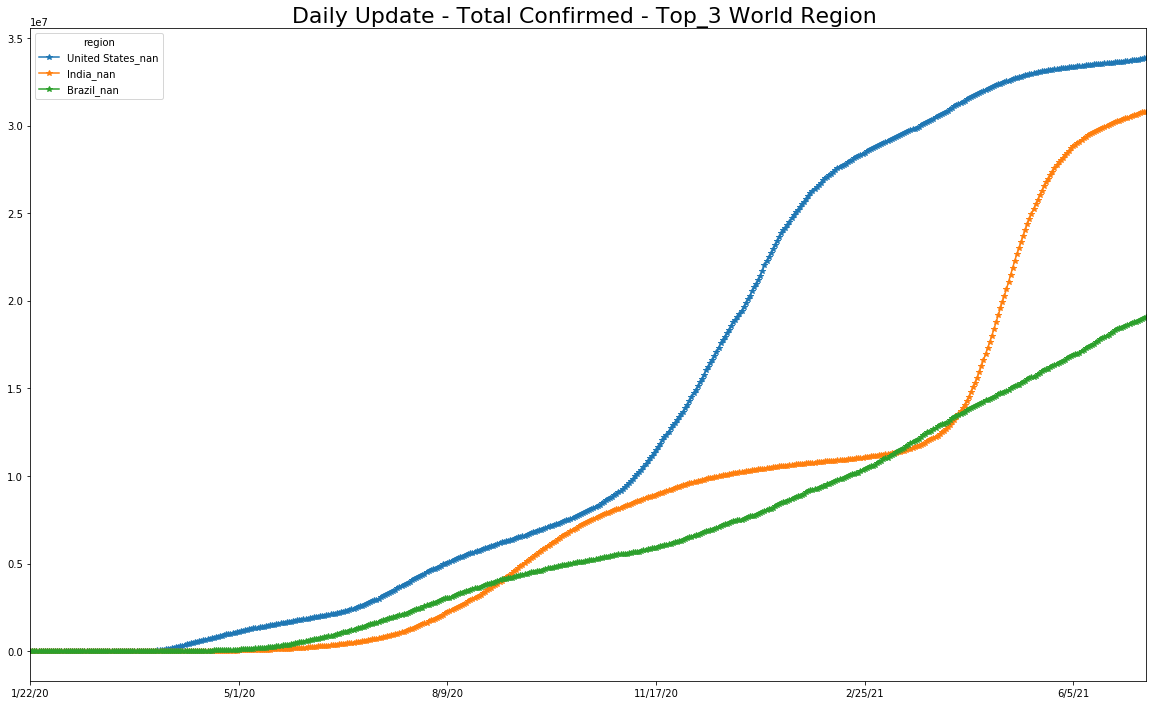

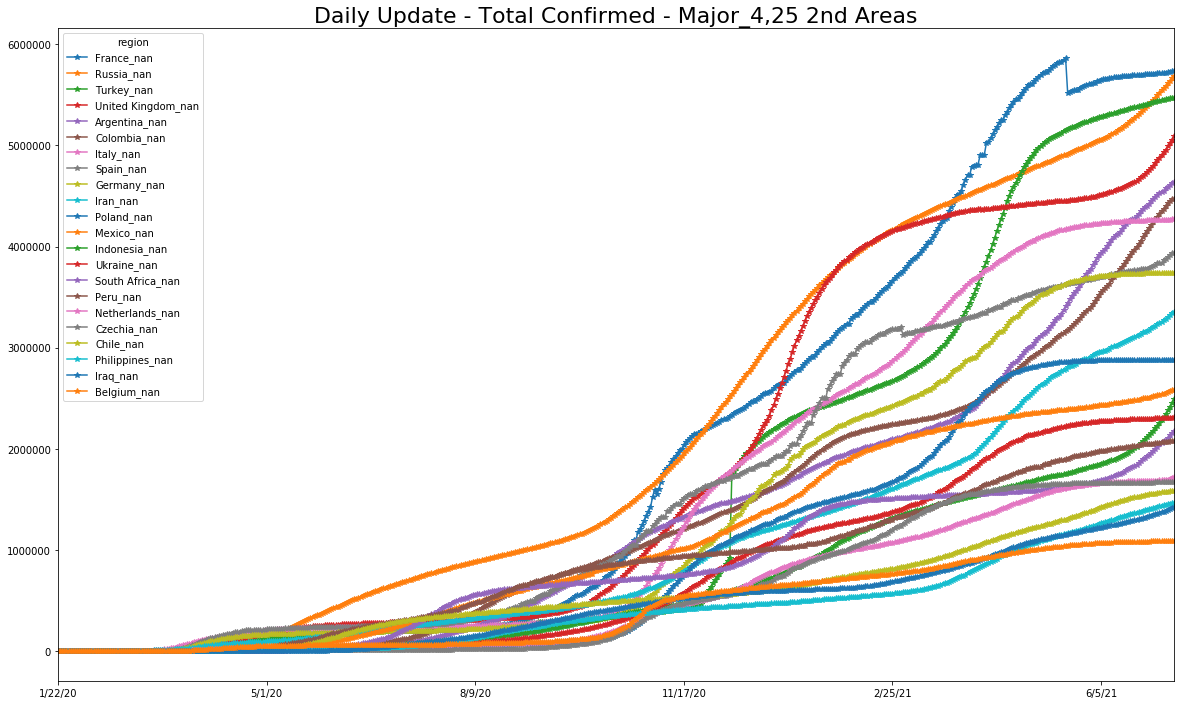

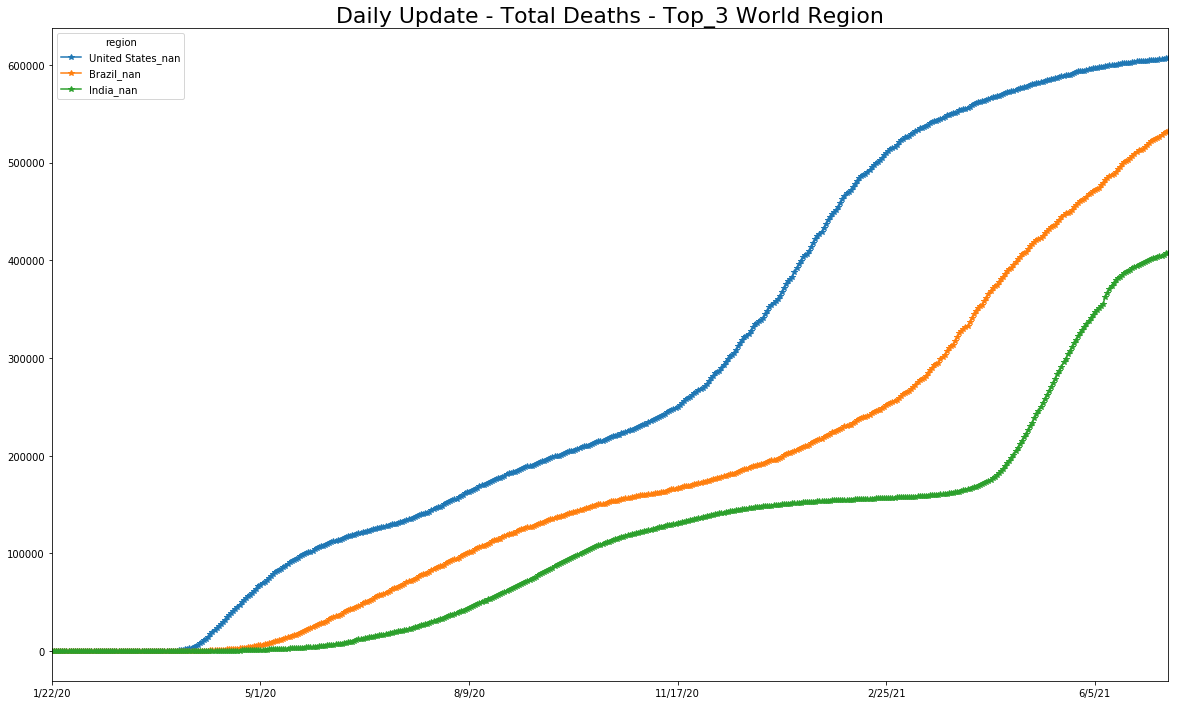

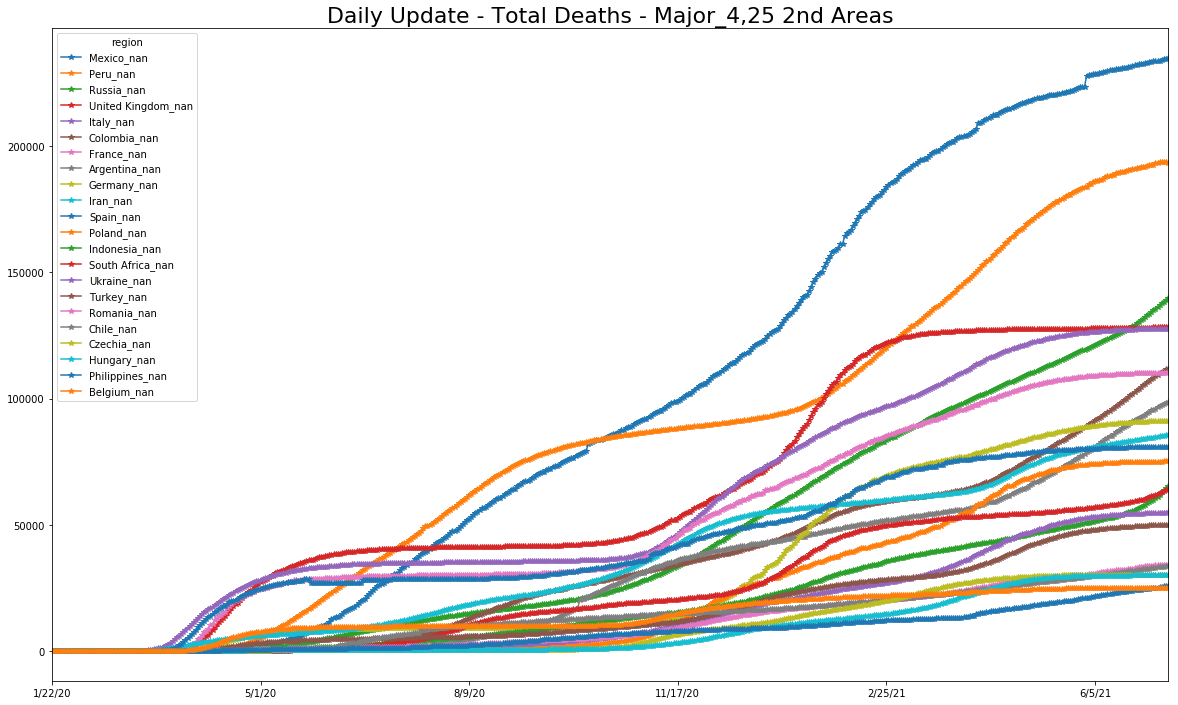

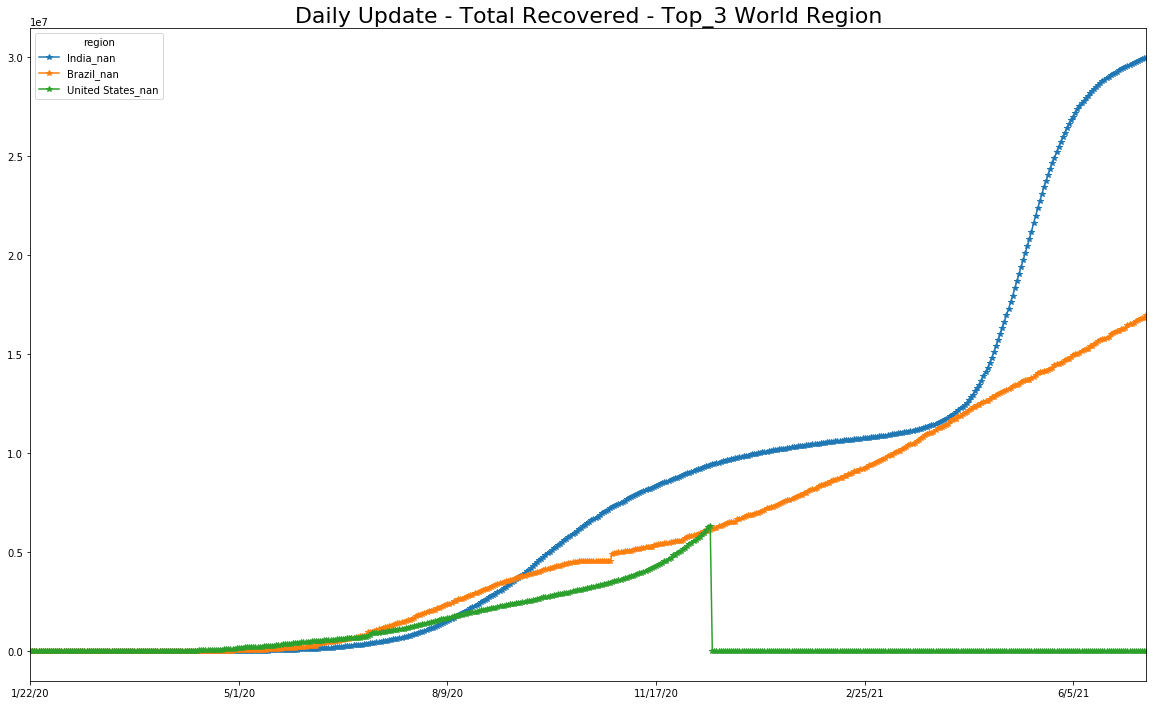

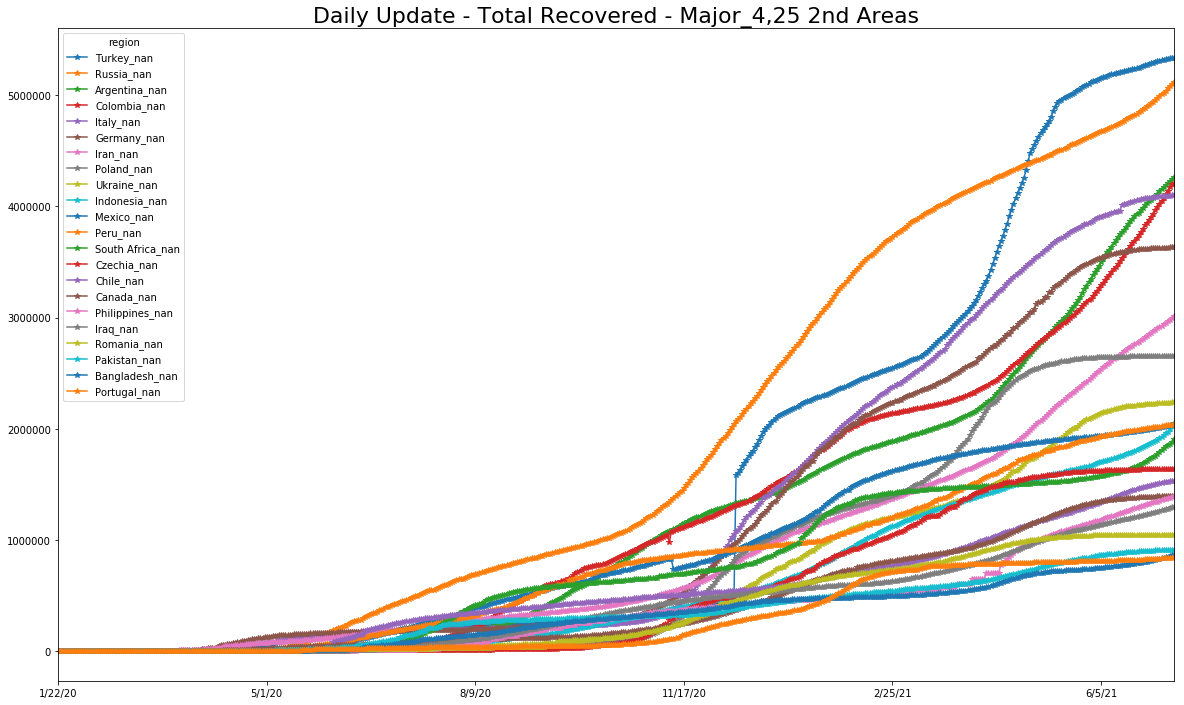

In [17]:
#
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Top_3 World Region ',fontdict={'fontsize': 22})
p.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts_d.max().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Top_3 World Region',fontdict={'fontsize': 22})
p_d.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts_rec.max().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Top_3 World Region',fontdict={'fontsize': 22})
p_r.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

### Extract Weather Data

In [18]:
#!pip install pyweatherbit
#
from weatherbit.api import Api
import json  
import pandas as pd  
from pandas.io.json import json_normalize 

### API - Joao
from datetime import datetime

#
api_key="29d9e51c56b94621b16297bcdeee9c4d" # hxj@mail.xcom
#

api = Api(api_key)
api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.

#api.get_forecast(lat='Lat', lon='Lon')
#my_end_date=datetime.today().strftime('%Y-%m-%d')

#### United Kingdom
#lat1='55.378100'
#lon1='-3.436000'
#api.get_history(lat=lat1,lon=lon1, start_date='2020-03-29',end_date=my_end_date)


In [19]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Portugal_nan',
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
        'Poland_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      # 'Australia_Queensland',
      # 'Australia_South Australia', 'Australia_Victoria', 
        'Brazil_nan',
      # 'Cambodia_nan',
      # 'Canada_British Columbia',
        'Canada_Ontario',
        'Canada_Quebec',
      # 'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      # 'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
     #  'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
        'Austria_nan',
     #  'Taiwan*_nan', 
     #  'Vietnam_nan',
        'Turkey_nan',
        'Peru_nan',
        'Chile_nan',
        'Mexico_nan'
       ]
#

#### Weather History

In [20]:
# ################## already done since API is limited to 500 call per day
## consume Wether data From 15/03/2020 forward to end_date=30/03/2020
#
### Location in confirmed array to start in pos 1='Albania_nan' 61 = 'China_Hong Kong'
### Only run for Countries in above : my_train_list 
vpos=len(confirmed.iloc[1])-1 #90# 89 #88 #87 #86 #85 #84 #83 #82 #81 #80 #79 #78 #77 #76 #75 #74 #1 #73
print('xcountry_region='+confirmed.iloc[1,vpos])

my_weather_fetch_list= my_train_list # ['Canada_Quebec'] #  ['Iran_nan'] #['Brazil_nan'] #

start_date_init=pd.to_datetime('today').strftime('%Y/%m/%d') # '2020-04-18'
print('start_date_init=',start_date_init)
offset_days=-1 # -1 to start yesterday pick today # API free-tier just picks one per api call!
max_days=1 #1

w=pd.DataFrame(columns=['date','region','min','max'])
if bypass_weather != 1 :
    for h in range(0,max_days):
        offset_days=h
        start_date=pd.to_datetime(start_date_init)
        #
        end_date=(start_date+pd.DateOffset(days=offset_days+1)).strftime('%Y-%m-%d')
        start_date=(start_date+pd.DateOffset(days=offset_days)).strftime('%Y-%m-%d')
        prnt_start_date=pd.to_datetime(start_date).strftime('%Y/%m/%d')
        prnt_end_date=pd.to_datetime(end_date).strftime('%Y/%m/%d')
        #
        for i in range (1,len(confirmed)):
            if confirmed.iloc[i,vpos] not in my_weather_fetch_list:
                continue
            if confirmed.iloc[i,vpos] in my_weather_fetch_list:
                #
                # Clean JSON structure return from API Call
                jas=""
                jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date,end_date=end_date).json
                if (((json_normalize(jas['data'])['min_temp'].values[0])=='')
                     or (np.isnan((json_normalize(jas['data'])['min_temp'].values[0])) == True )):
                    continue
                try:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
                except Exception:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':None,'max':None}, ignore_index=True)
    #        
#
table_columns=['date','region','min','max']
w = w[w.columns.intersection(table_columns)]

xcountry_region=Albania_nan
start_date_init= 2021/07/11


In [21]:
w.to_csv('data/w_v2_v227.csv', index = False, header=True)

In [22]:
w[:]

Empty DataFrame
Columns: [date, region, min, max]
Index: []

## Kalman Filter With R

In [23]:
# Joao - FIX - Improve Performance 
### Drop the Months of Jan, Feb < 06/02 as
### they are too in the Past and model no longuer trains in China Hubei only!
#
## DROP_N=75 => 07/04

drop_n=drop_n_dataset_days

ts=ts[drop_n:]
ts_d=ts_d[drop_n:]
ts_rec=ts_rec[drop_n:]

In [24]:
ts[:3]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
9/13/20            38716        11353        48254         1344        3388   
9/14/20            38772        11520        48496         1438        3439   
9/15/20            38815        11672        48734         1438        3569   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
9/13/20                       95         555537        45862   
9/14/20                       95         565446        45969   
9/15/20                       95         577338        46119   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
9/13/20                                     113                       4170   
9/14/20                                     113                       4177   
9/15/20                                     113                       4185   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Vanuatu_nan  \
9/13/20  ...            6523005         1808           47287            0   
9/14/20  ...            6557428         1812           47836            0   
9/15/20  ...            6596920         1827           48429            0   

region   Venezuela_nan  Vietnam_nan  West Bank and Gaza_nan  Yemen_nan  \
9/13/20          60540         1063                   30574       2011   
9/14/20          61569         1063                   31362       2013   
9/15/20          62655         1063                   32250       2016   

region   Zambia_nan  Zimbabwe_nan  
9/13/20       13539          7526  
9/14/20       13720          7531  
9/15/20       13819          7576  

[3 rows x 279 columns]

In [25]:
ts[-4:]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
7/7/21            129021       132557       143032        14021       39491   
7/8/21            130113       132565       143652        14050       39593   
7/9/21            131586       132580       144483        14075       39791   
7/10/21           131586       132587       145296        14075       39881   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
7/7/21                      1265        4593763       225801   
7/8/21                      1266        4613019       225987   
7/9/21                      1266        4627537       226135   
7/10/21                     1266        4639098       226285   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
7/7/21                                      124                       6064   
7/8/21                                      124                       6109   
7/9/21                                      124                       6161   
7/10/21                                     124                       6243   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Vanuatu_nan  \
7/7/21   ...           33770444       374665          114039            4   
7/8/21   ...           33790505       375298          114529            4   
7/9/21   ...           33838746       375902          115011            4   
7/10/21  ...           33847784       376281          115478            4   

region   Venezuela_nan  Vietnam_nan  West Bank and Gaza_nan  Yemen_nan  \
7/7/21          280980        23385                  314869       6934   
7/8/21          281907        24810                  314869       6936   
7/9/21          282940        26608                  315047       6940   
7/10/21         283742        28470                  315107       6941   

region   Zambia_nan  Zimbabwe_nan  
7/7/21       169003         60227  
7/8/21       170456         62383  
7/9/21       172405         65066  
7/10/21      174789         66853  

[4 rows x 279 columns]

In [26]:
# Create data for R script
ts_conf=ts.reset_index()
ts_conf=ts_conf.rename(columns = {'index':'date'})
ts_conf['date']=pd.to_datetime(ts_conf['date'] ,errors ='coerce')
ts_conf.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv')

ts_rec=ts_rec.reset_index()
ts_rec=ts_rec.rename(columns = {'index':'date'})
ts_rec['date']=pd.to_datetime(ts_rec['date'] ,errors ='coerce')
ts_rec.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_rec_r.csv')


ts_d=ts_d.reset_index()
ts_d=ts_d.rename(columns = {'index':'date'})
ts_d['date']=pd.to_datetime(ts_d['date'] ,errors ='coerce')
ts_d.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_d_r.csv')


In [27]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')

Sys.setenv(TZ='GMT')
Sys.timezone()

[1] "GMT"


In [28]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: 
── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  date = col_date(format = "")
)
ℹ Use `spec()` for the full column specifications.




In [29]:
p=%R pred_all

In [30]:
############ Merge R output due to package problem
### Joao FIX - 
# t=ts_d    -  deaths
# t=ts_rec  -  recovered
# t=ts      -  confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

# JOAO - FIX - temp fixed
# Y,X,X2 nan issue from p revolved

p_pd=pd.DataFrame(p,columns=['Y','X','X2'])

p_pd['nindex'] = range(1, 1+len(p_pd))
temp['nindex']= range(1,1+len(temp))

#temp_1 = temp.join(p_pd)
temp_1 = temp.merge(p_pd, on='nindex', how='inner', suffixes=('_1', '_2')).rename(columns={"Y_2": "Y", "X_2": "X", "X2_2" : "X2"})
temp_1 = temp_1.drop(columns=['Y_1', 'X_1','X2_1','nindex'])


temp=temp_1
temp.to_csv(r'/home/notebookuser/notebooks/covid19/data/temp.csv')

## Pre Proccessing Data for ML Model

### Extract Weather Forecast Data

In [31]:
#
### Joao - Test Later Weather from new file : w_v2.csv and w_v2_v2.csv
w_v2=pd.read_csv('data/w_v2.csv', sep=',', encoding='latin1')
w_v2['date']=pd.to_datetime(w_v2['date'],format='%Y/%m/%d')

w_v2_v2=pd.read_csv('data/w_v2_v2.csv', sep=',', encoding='latin1')
w_v2_v2['date']=pd.to_datetime(w_v2_v2['date'],format='%Y/%m/%d')

w_v2_v227=pd.read_csv('data/w_v2_v227.csv', sep=',', encoding='latin1')
w_v2_v227['date']=pd.to_datetime(w_v2_v227['date'],format='%Y/%m/%d')

w=pd.read_csv('data/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')

w_forecast=pd.read_csv('data/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

### Append Weather fetched now to file w_v2_v2
w_n_forward=w_v2_v2.append(w_v2_v227) 
w_n_forward=w_n_forward.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_n_forward=w_n_forward.sort_values(by=['region','date'], ascending=True)
w_n_forward.to_csv(r'data/w_v2_v2.csv', index = False, header=True)

In [32]:
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2).append(w_v2_v227) 
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)

w_total.to_csv(r'data/w_total.csv', index = False, header=True)

In [33]:
w_in_model=pd.read_csv('data/w_total.csv', sep=',', encoding='latin1')
#
w_in_model['date']=pd.to_datetime(w_in_model['date'],format='%Y/%m/%d')
w_in_model.to_csv(r'data/w_in_model.csv', index = False, header=True)

In [34]:
w_in_model.tail(2)

date       region   min   max
8379 2020-05-10  Vietnam_nan  26.9  33.0
8380 2020-05-11  Vietnam_nan  25.0  33.0

### Build Train Set Data Structure

In [35]:
### JOAO - Fix -
## t=ts confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [36]:
### JOAO - Fix -
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
    if(t.iloc[i,1] is t.iloc[i-2,1]):
        t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
        t.iloc[i,6]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-2,2]*100 -1 +1))*100
        t.iloc[i,9]=t.iloc[i-1,2]
    if(t.iloc[i,1] is t.iloc[i-4,1]):
        t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
        t.iloc[i,7]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-4,2]*100 -1 +1))*100
    if(t.iloc[i,1] is t.iloc[i-8,1]):
        t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
        t.iloc[i,8]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-8,2]*100 -1 +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)

### Joao - Fix NaN Kalman_Filter
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'])

#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(10000000) ### Fill 10M if nan
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=(((train['last_day'] +1)*100)/((train['population'] +1)*100000) *10) # *100 - % converter
 #
#### Joao , merge w weather only !?!
##train=train.merge(w,how='left',on=['date','region'])
train=train.merge(w_in_model,how='left',on=['date','region'])
#
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
    if(np.isnan(train.iloc[i,13])):
        if(train.iloc[i,1] is train.iloc[i-1,1]):
            train.iloc[i,13]=train.iloc[i-1,13]
            train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in long_scalars
  from ipykernel import kernelapp as app


In [37]:
# Joao - Fix - Nulls are an issue
train_notnull=train[train['kalman_prediction'] != 0.0 ] #.any(axis=1)]
train_notnull[:]

date           region  confirmed  1_day_change  3_day_change  \
1     2020-09-14  Afghanistan_nan      38772             0             0   
2     2020-09-15  Afghanistan_nan      38815            56             0   
3     2020-09-16  Afghanistan_nan      38855            43             0   
4     2020-09-17  Afghanistan_nan      38872            40           139   
5     2020-09-18  Afghanistan_nan      38897            17           100   
6     2020-09-19  Afghanistan_nan      38919            25            82   
7     2020-09-20  Afghanistan_nan      39044            22            64   
8     2020-09-21  Afghanistan_nan      39074           125           172   
9     2020-09-22  Afghanistan_nan      39096            30           177   
10    2020-09-23  Afghanistan_nan      39145            22           177   
11    2020-09-24  Afghanistan_nan      39170            49           101   
12    2020-09-25  Afghanistan_nan      39186            25            96   
13    2020-09-26  Afghanistan_nan      39192            16            90   
14    2020-09-27  Afghanistan_nan      39227             6            47   
15    2020-09-28  Afghanistan_nan      39239            35            57   
16    2020-09-29  Afghanistan_nan      39254            12            53   
17    2020-09-30  Afghanistan_nan      39268            15            62   
18    2020-10-01  Afghanistan_nan      39285            14            41   
19    2020-10-02  Afghanistan_nan      39290            17            46   
20    2020-10-03  Afghanistan_nan      39297             5            36   
21    2020-10-04  Afghanistan_nan      39341             7            29   
22    2020-10-05  Afghanistan_nan      39422            44            56   
23    2020-10-06  Afghanistan_nan      39486            81           132   
24    2020-10-07  Afghanistan_nan      39548            64           189   
25    2020-10-08  Afghanistan_nan      39616            62           207   
26    2020-10-09  Afghanistan_nan      39693            68           194   
27    2020-10-10  Afghanistan_nan      39703            77           207   
28    2020-10-11  Afghanistan_nan      39799            10           155   
29    2020-10-12  Afghanistan_nan      39870            96           183   
30    2020-10-13  Afghanistan_nan      39928            71           177   
...          ...              ...        ...           ...           ...   
86040 2021-06-12     Zimbabwe_nan      39852           192           367   
86041 2021-06-13     Zimbabwe_nan      39959           164           420   
86042 2021-06-14     Zimbabwe_nan      40077           107           463   
86043 2021-06-15     Zimbabwe_nan      40318           118           389   
86044 2021-06-16     Zimbabwe_nan      40556           241           466   
86045 2021-06-17     Zimbabwe_nan      40927           238           597   
86046 2021-06-18     Zimbabwe_nan      41335           371           850   
86047 2021-06-19     Zimbabwe_nan      41628           408          1017   
86048 2021-06-20     Zimbabwe_nan      41779           293          1072   
86049 2021-06-21     Zimbabwe_nan      42195           151           852   
86050 2021-06-22     Zimbabwe_nan      42714           416           860   
86051 2021-06-23     Zimbabwe_nan      43480           519          1086   
86052 2021-06-24     Zimbabwe_nan      44306           766          1701   
86053 2021-06-25     Zimbabwe_nan      45217           826          2111   
86054 2021-06-26     Zimbabwe_nan      46018           911          2503   
86055 2021-06-27     Zimbabwe_nan      46442           801          2538   
86056 2021-06-28     Zimbabwe_nan      47284           424          2136   
86057 2021-06-29     Zimbabwe_nan      48533           842          2067   
86058 2021-06-30     Zimbabwe_nan      49864          1249          2515   
86059 2021-07-01     Zimbabwe_nan      51221          1331          3422   
86060 2021-07-02     Zimbabwe_nan      52663          1357  

In [38]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train['kalman_prediction'].isnull() ] #.any(axis=1)]
train_nulls[:]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [39]:
# Joao - Fix - Nulls are an issue

train_nulls=train[train.isnull().any(axis=1)]
train_nulls[:]
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
86069 2021-07-11  Zimbabwe_nan          0          1787          6626   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
86069         13188         102.746457         111.001727         124.574695   

       last_day  kalman_prediction  population  infected_rate  min  max  
86069     66853            68575.0    14862924       0.000045  NaN  NaN

In [40]:
## JOAO - FIX Drop Duplicates
train=train.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
## JOAO - FIX Drop empty region='nan_nan'
train=train[train['region']!='nan_nan']
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
86069 2021-07-11  Zimbabwe_nan          0          1787          6626   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
86069         13188         102.746457         111.001727         124.574695   

       last_day  kalman_prediction  population  infected_rate  min  max  
86069     66853            68575.0    14862924       0.000045  NaN  NaN

In [41]:
train.to_csv(r'data/train.csv', index = False, header=True)

##Shared -- Ratio in Confirmed - 21Day Forecast -- train 25April2020 - I
ratiod=pd.read_csv('data/train.csv', sep=',', encoding='latin1')
todayd=datetime.today().strftime('%Y-%m-%d')
ratiofn="World v2 -- Confirmed - "+str(num_days_R_prediction)+"Day Forecast -- train "+todayd+".csv"

ratiod['population_percentage : infected_rate confirmed']=ratiod['infected_rate']*100
### Assumption : Each affected person can contact up to 9 others that not report or are assimptomatic COVID19 cases.
ratiod['population_percentage : factor 9/10 infected_rate confirmed']=np.clip(ratiod['infected_rate']*900,0.0,1.0)
#
ratiod['delta : pred new_cases']=ratiod['kalman_prediction']-ratiod['last_day']
ratiod['delta : pred new_cases per 1M hab']=ratiod['delta : pred new_cases']/ratiod['population']*1000000

### roling 7day_AVG
ratiod['delta : roling 7day AVG']=ratiod['7_day_change']/7
ratiod['delta : aprox 14-day case notification rate per 100k hab']=(ratiod['7_day_change']*2)/ratiod['population']*100000
###

ratiod=ratiod.rename(columns={'kalman_prediction': 'confirmed_prediction', 'last_day': 'confirmed_yesterday'})
ratiod.to_csv(r'data/'+ratiofn, index = False, header=True)
ratiod[-3:]

date        region  confirmed  1_day_change  3_day_change  \
84255  2021-07-09  Zimbabwe_nan      65066          2156          6369   
84256  2021-07-10  Zimbabwe_nan      66853          2683          7103   
84257  2021-07-11  Zimbabwe_nan          0          1787          6626   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
84255         11162         103.579806         111.370390         121.791863   
84256         12403         104.300867         112.254386         123.551659   
84257         13188         102.746457         111.001727         124.574695   

       confirmed_yesterday  ...  population  infected_rate  min  max  \
84255                62383  ...    14862924       0.000042  NaN  NaN   
84256                65066  ...    14862924       0.000044  NaN  NaN   
84257                66853  ...    14862924       0.000045  NaN  NaN   

       population_percentage : infected_rate confirmed  \
84255                                         0.004197   
84256                                         0.004378   
84257                                         0.004498   

       population_percentage : factor 9/10 infected_rate confirmed  \
84255                                           0.037776             
84256                                           0.039400             
84257                                           0.040482             

       delta : pred new_cases  delta : pred new_cases per 1M hab  \
84255                  1026.0                          69.030831   
84256                  1105.0                          74.346071   
84257                  1722.0                         115.858764   

       delta : roling 7day AVG  \
84255              1594.571429   
84256              1771.857143   
84257              1884.000000   

       delta : aprox 14-day case notification rate per 100k hab  
84255                                         150.199247         
84256                                         166.898519         
84257                                         177.461716         

[3 rows x 21 columns]

## Kalman 1 day Prediction with Evaluation

                region           mse          rmse            mae
269  United States_nan  3.814758e+12  1.953141e+06  135914.109635


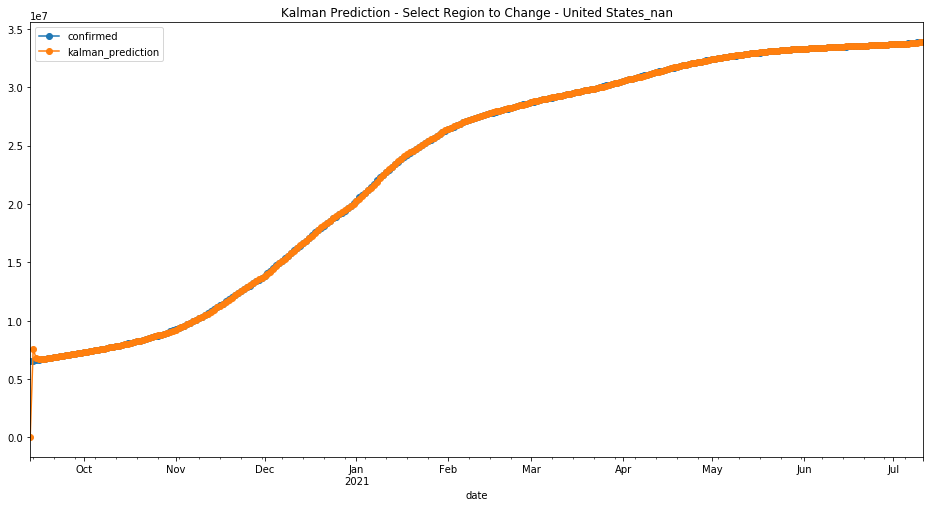

In [42]:
# Select region
region='United States_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse           rmse           mae
217  Russia_nan  1.085068e+11  329403.680818  21280.561462


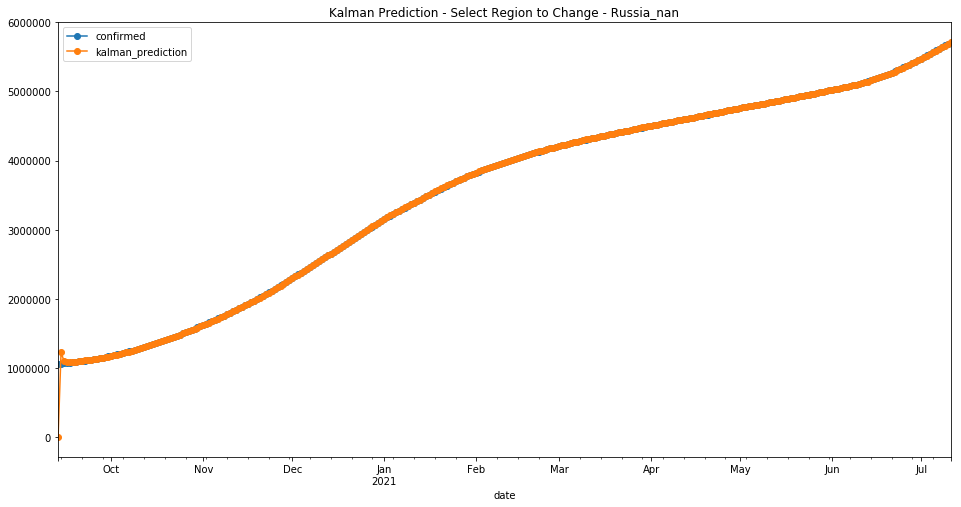

In [43]:
# Select region
region='Russia_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

        region           mse          rmse           mae
30  Brazil_nan  1.216183e+12  1.102807e+06  86494.315615


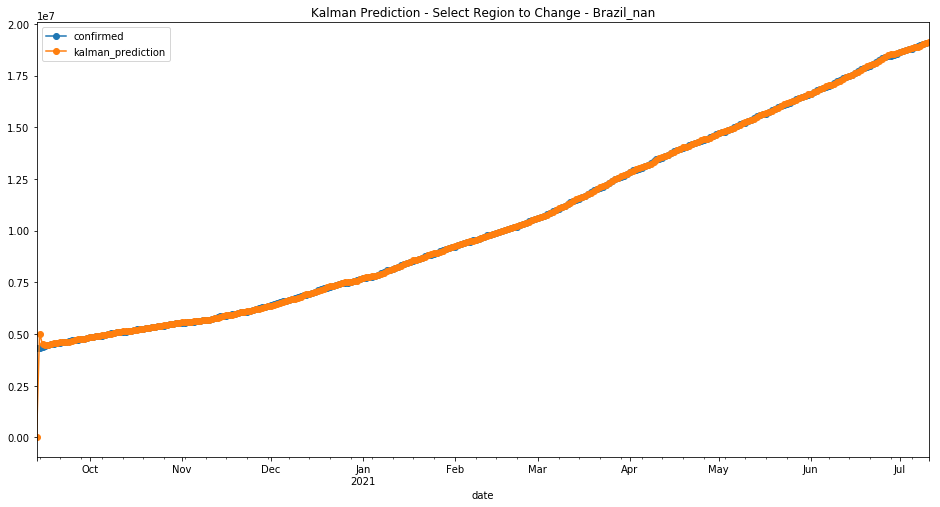

In [44]:
# Select region
region='Brazil_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

                 region           mse          rmse           mae
268  United Kingdom_nan  8.706265e+10  295063.81128  21491.933555


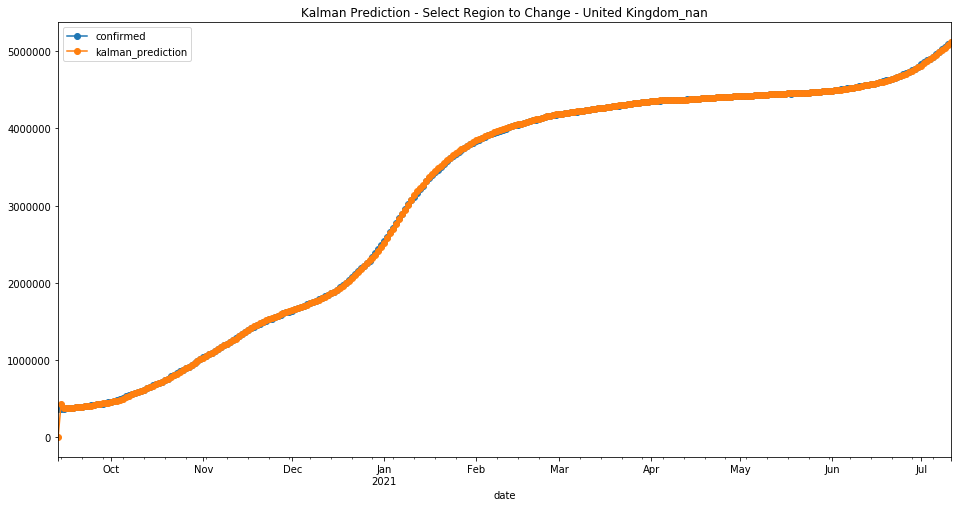

In [45]:
# Select region
region='United Kingdom_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [46]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='3G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpav2fkowc
  JVM stdout: /tmp/tmpav2fkowc/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpav2fkowc/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54323
Connecting to H2O server at http://127.0.0.1:54323... successful.


--------------------------  ----------------------------------------
H2O cluster uptime:         01 secs
H2O cluster timezone:       Etc/GMT
H2O data parsing timezone:  UTC
H2O cluster version:        3.22.0.1
H2O cluster version age:    2 years, 8 months and 14 days !!!
H2O cluster name:           H2O_from_python_unknownUser_c6ez6w
H2O cluster total nodes:    1
H2O cluster free memory:    3.541 Gb
H2O cluster total cores:    8
H2O cluster allowed cores:  8
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:54323
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.7.7 final
--------------------------  ----------------------------------------

In [47]:

train=train.fillna(0)

########################################################

### Joao - Training  progression - When growth happened 2020/03/05 to 2020/04/12
### Joao - FIX - Refresh this daily forward

### Old Fixed manual ### Last run 17April2020
##
#train_df=train[train['date']>'2020-03-04']
#train_df=train[train['date']<'2020-04-16']
#boots=train_df[train_df['date']>='2020-04-08'] # some bootstrap to give more weight for recent days
#train_df=train_df.append([boots[boots['date']>='2020-04-12']]*1000,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
#region_to_train=my_train_list
#train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
#test=train[train['date']>='2020-04-03']
#test=test[test['date']<'2020-04-17']
#test_v2=test[test['region'].isin(region_to_train)]
#valid_v2=test_v2[test_v2['date']>='2020-04-16']

########################################################

# Set minimum of 14 training day 2weeks.
#
if number_past_days_training>=7 : 
    ntraindays=number_past_days_training 
else : 
    ntraindays=7
#
to_day=pd.to_datetime('today')
first_train_date=(to_day+pd.DateOffset(days=-ntraindays)).strftime('%Y-%m-%d') # ntraindays/7 weeks =ntraindays days training
last_train_date=(to_day+pd.DateOffset(days=-1)).strftime('%Y-%m-%d')
first_bootstrap_date=(to_day+pd.DateOffset(days=-9)).strftime('%Y-%m-%d')
boost_bootstrap_date=(to_day+pd.DateOffset(days=-4)).strftime('%Y-%m-%d')
first_test_date=(to_day+pd.DateOffset(days=-10)).strftime('%Y-%m-%d')
last_test_date=to_day.strftime('%Y-%m-%d')
first_valid_date=(to_day+pd.DateOffset(days=-2)).strftime('%Y-%m-%d')

print('first_train_date=',first_train_date)
print('last_train_date=',last_train_date)
print('first_bootstrap_date=',first_bootstrap_date)
print('boost_bootstrap_date=',boost_bootstrap_date)
print('first_test_date=',first_test_date)
print('last_test_date=',last_test_date)
print('first_valid_date=',first_valid_date)

train_df=train[train['date']>first_train_date]
train_df=train[train['date']<last_train_date]
boots=train_df[train_df['date']>=first_bootstrap_date] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>=boost_bootstrap_date]]*5,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
region_to_train=my_train_list
train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
test=train[train['date']>first_test_date]
test=test[test['date']<=last_test_date]
test_v2=test[test['region'].isin(region_to_train)]
valid_v2=test_v2[test_v2['date']>=first_valid_date]


first_train_date= 2021-06-14
last_train_date= 2021-07-10
first_bootstrap_date= 2021-07-02
boost_bootstrap_date= 2021-07-07
first_test_date= 2021-07-01
last_test_date= 2021-07-11
first_valid_date= 2021-07-09


In [48]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            '1_day_change_rate', 
            '3_day_change_rate',
            '7_day_change_rate', 
            'last_day',
            'min', 'max',
            'infected_rate',
            'kalman_prediction'
          #  ,'population_percent_infected_rate_confirmed'
          #  ,'delta_new_cases'
          #  ,'delta_new_cases_per_1M_hab'
          ]

In [49]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values


In [50]:
pred2.iloc[:25]

0  confirmed       date           region
0   121853.0     120216 2021-07-02  Afghanistan_nan
1   121774.0     120216 2021-07-03  Afghanistan_nan
2   121622.0     120216 2021-07-04  Afghanistan_nan
3   121177.0     125937 2021-07-05  Afghanistan_nan
4   127485.0     127464 2021-07-06  Afghanistan_nan
5   128339.0     129021 2021-07-07  Afghanistan_nan
6   130714.0     130113 2021-07-08  Afghanistan_nan
7   131739.0     131586 2021-07-09  Afghanistan_nan
8   133311.0     131586 2021-07-10  Afghanistan_nan
9   132984.0          0 2021-07-11  Afghanistan_nan
10  132587.0     132526 2021-07-02      Albania_nan
11  132591.0     132534 2021-07-03      Albania_nan
12  132599.0     132535 2021-07-04      Albania_nan
13  132600.0     132537 2021-07-05      Albania_nan
14  132603.0     132544 2021-07-06      Albania_nan
15  132610.0     132557 2021-07-07      Albania_nan
16  132623.0     132565 2021-07-08      Albania_nan
17  132631.0     132580 2021-07-09      Albania_nan
18  132649.0     132587 2021-07-10      Albania_nan
19  132655.0          0 2021-07-11      Albania_nan
20  140509.0     140550 2021-07-02      Algeria_nan
21  140994.0     141007 2021-07-03      Algeria_nan
22  141462.0     141471 2021-07-04      Algeria_nan
23  141943.0     141966 2021-07-05      Algeria_nan
24  142454.0     142447 2021-07-06      Algeria_nan

In [51]:
pred2.iloc[175:195]

0  confirmed       date          region
175  336693.0     336684 2021-07-07  Azerbaijan_nan
176  336827.0     336788 2021-07-08  Azerbaijan_nan
177  336926.0     336962 2021-07-09  Azerbaijan_nan
178  337120.0     337098 2021-07-10  Azerbaijan_nan
179  337252.0          0 2021-07-11  Azerbaijan_nan
180   12763.0      12735 2021-07-02     Bahamas_nan
181   12853.0      12735 2021-07-03     Bahamas_nan
182   12876.0      12735 2021-07-04     Bahamas_nan
183   12850.0      12808 2021-07-05     Bahamas_nan
184   12874.0      12889 2021-07-06     Bahamas_nan
185   12956.0      12965 2021-07-07     Bahamas_nan
186   13045.0      13024 2021-07-08     Bahamas_nan
187   13128.0      13024 2021-07-09     Bahamas_nan
188   13163.0      13024 2021-07-10     Bahamas_nan
189   13156.0          0 2021-07-11     Bahamas_nan
190  266213.0     266140 2021-07-02     Bahrain_nan
191  266361.0     266286 2021-07-03     Bahrain_nan
192  266485.0     266426 2021-07-04     Bahrain_nan
193  266611.0     266557 2021-07-05     Bahrain_nan
194  266728.0     266685 2021-07-06     Bahrain_nan

In [52]:
pred2.iloc[220:240]

0  confirmed       date       region
220   418922.0     419330 2021-07-02  Belarus_nan
221   420105.0     420406 2021-07-03  Belarus_nan
222   421239.0     421350 2021-07-04  Belarus_nan
223   422236.0     421964 2021-07-05  Belarus_nan
224   422841.0     422521 2021-07-06  Belarus_nan
225   423402.0     423519 2021-07-07  Belarus_nan
226   424446.0     424554 2021-07-08  Belarus_nan
227   425445.0     425804 2021-07-09  Belarus_nan
228   426763.0     426886 2021-07-10  Belarus_nan
229   427847.0          0 2021-07-11  Belarus_nan
230  1086633.0    1086508 2021-07-02  Belgium_nan
231  1087254.0    1086508 2021-07-03  Belgium_nan
232  1087147.0    1086508 2021-07-04  Belgium_nan
233  1087103.0    1088363 2021-07-05  Belgium_nan
234  1089221.0    1089105 2021-07-06  Belgium_nan
235  1089690.0    1091095 2021-07-07  Belgium_nan
236  1092113.0    1092477 2021-07-08  Belgium_nan
237  1093392.0    1093700 2021-07-09  Belgium_nan
238  1094860.0    1093700 2021-07-10  Belgium_nan
239  1094692.0          0 2021-07-11  Belgium_nan

In [53]:
#
train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_v2 = h2o.H2OFrame(train_df_v2) # different model for V2 region ### Spain This time


test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)
test_h20_v2 = h2o.H2OFrame(test_v2)

valid_h20_v2=h2o.H2OFrame(valid_v2)

#training_columns = ['region','1_day_change', '3_day_change', '7_day_change','1_day_change_rate','3_day_change_rate','7_day_change_rate','last_day', 'kalman_prediction','infected_rate', 'min', 'max']
training_cols_v2 = ['region']+x_col #+['population_percent_infected_rate_confirmed','delta_new_cases','delta_new_cases_per_1M_hab']
training_columns = training_cols_v2

# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Model V2
model_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=23)
model_v2.train(x=training_columns, y=response_column, training_frame=train_h20_v2, validation_frame=valid_h20_v2)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%


In [54]:
#Print Model

print('# MSE on the training data = ',model_v2.mse())
print('# MSE on the validation data = ',model_v2.mse(valid=True))
print('# R^2 on the training data = ',model_v2.r2())
print('# R^2 on the validation data = ',model_v2.r2(valid=True))

# MSE on the training data =  3901175723.8697824
# MSE on the validation data =  23240530680874.895
# R^2 on the training data =  0.9998553580223666
# R^2 on the validation data =  0.44204882899374887


In [55]:
model_v2.show()

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1625986457977_1


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 3901175723.8697824
RMSE: 62459.39259927031
MAE: 6624.530616019229
RMSLE: 0.16938536970393334
Mean Residual Deviance: 3901175723.8697824

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 23240530680874.895
RMSE: 4820843.357844652
MAE: 1269136.0778131767
RMSLE: 7.758349571339867
Mean Residual Deviance: 23240530680874.895
Scoring History: 


timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance    validation_rmse     validation_mae      validation_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------  ------------------  ------------------  ---------------------
     2021-07-11 06:54:27  0.068 sec   0.0                nan                 nan                 nan                  nan                 nan                 nan
     2021-07-11 06:54:27  0.559 sec   1.0                95046.08470082616   19999.428860432465  9033758216.956621    4882543.695177089   1264311.0818201012  23839232935313.55
     2021-07-11 06:54:28  0.963 sec   2.0                99139.4159973677    19434.27787402568   9828623804.299128    4874150.231983491   1268935.6710639473  23757340483944.723
     2021-07-11 06:54:28  1.347 sec   3.0                90029.33778330637   17343.739610551387  8105281661.700677    4883072.930222321   1271644.0786660684  23844401241870.008
     2021-07-11 06:54:28  1.439 sec   4.0                86596.33129455538   16038.095960104527  7498924593.676392    4886275.48586114    1272991.524704581   23875688123727.523
---  ---                  ---         ---                ---                 ---                 ---                  ---                 ---                 ---
     2021-07-11 06:54:47  20.144 sec  298.0              62667.08175496593   7018.203828909982   3927163135.683584    4832107.540382563   1270908.9547294946  23349263281822.027
     2021-07-11 06:54:51  24.147 sec  362.0              62198.19850885873   6824.1666960318025  3868615897.7473965   4831823.973977556   1270077.7467388425  23346522915504.26
     2021-07-11 06:54:55  28.226 sec  423.0              62776.944775114025  6789.5587844177435  3940944795.2977157   4829982.546497229   1269995.8337109697  23328731399467.855
     2021-07-11 06:55:00  33.309 sec  497.0              62532.19808180258   6624.460659209789   3910275796.9417934   4820465.7296602065  1269150.791918576   23236889850828.504
     2021-07-11 06:55:01  33.831 sec  500.0              62459.39259927031   6624.530616019229   3901175723.8697824   4820843.357844652   1269136.0778131767  23240530680874.895


See the whole table with table.as_data_frame()
Variable Importances: 


variable           relative_importance    scaled_importance    percentage
-----------------  ---------------------  -------------------  ------------
last_day           5.17635e+19            1                    0.376802
kalman_prediction  4.06903e+19            0.78608              0.296197
region             2.13762e+19            0.412959             0.155604
7_day_change       9.02139e+18            0.174281             0.0656695
3_day_change       5.15675e+18            0.0996213            0.0375375
1_day_change       3.41488e+18            0.0659707            0.0248579
infected_rate      1.70613e+18            0.0329601            0.0124195
min                1.16969e+18            0.0225968            0.00851452
max                1.10339e+18            0.021316             0.00803193
7_day_change_rate  9.9504e+17             0.0192228            0.0072432
3_day_change_rate  7.13137e+17            0.0137768            0.00519114
1_day_change_rate  2.65312e+17            0.00512547           0.00193129

In [56]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao -  Model V2
modlv2=model_v2.varimp(True).iloc[:,:] # Feature importance for Model V2 Global RF
modlv2.sort_values('percentage',ascending=False)

variable  relative_importance  scaled_importance  percentage
0            last_day         5.176353e+19           1.000000    0.376802
1   kalman_prediction         4.069029e+19           0.786080    0.296197
2              region         2.137623e+19           0.412959    0.155604
3        7_day_change         9.021391e+18           0.174281    0.065669
4        3_day_change         5.156747e+18           0.099621    0.037538
5        1_day_change         3.414876e+18           0.065971    0.024858
6       infected_rate         1.706133e+18           0.032960    0.012419
7                 min         1.169688e+18           0.022597    0.008515
8                 max         1.103393e+18           0.021316    0.008032
9   7_day_change_rate         9.950403e+17           0.019223    0.007243
10  3_day_change_rate         7.131374e+17           0.013777    0.005191
11  1_day_change_rate         2.653122e+17           0.005125    0.001931

In [57]:
## Joao - Model Predictions - Country_nan _v2
performance = model_v2.model_performance(test_data=test_h20_v2)
# # Model Create Predictions
pred=model_v2.predict(test_h20_v2);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test_v2['confirmed'].values
pred['date']=test_v2['date'].values
pred['region']=test_v2['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

Correlation Matrix


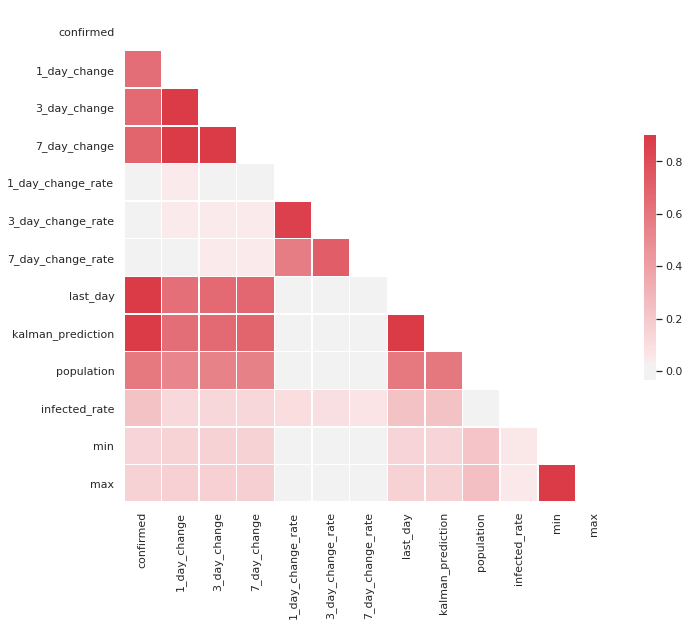

In [58]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [59]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.641466
3_day_change         0.665870
7_day_change         0.682041
1_day_change_rate    0.030615
3_day_change_rate    0.027204
7_day_change_rate    0.017794
last_day             0.995576
kalman_prediction    0.995740
population           0.596853
infected_rate        0.236745
min                  0.142160
max                  0.161771
Name: confirmed, dtype: float64


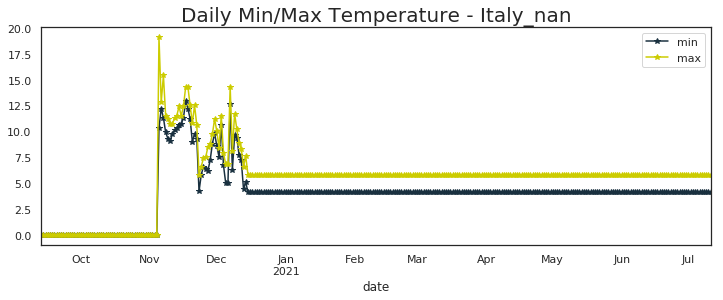

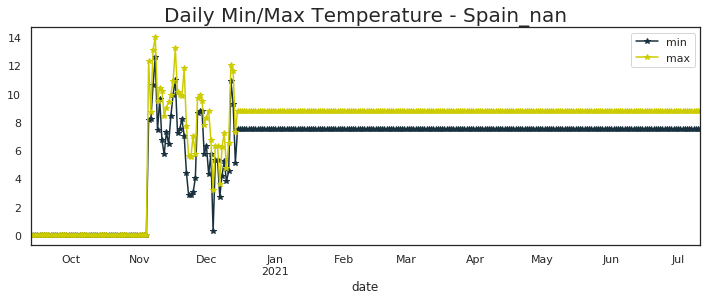

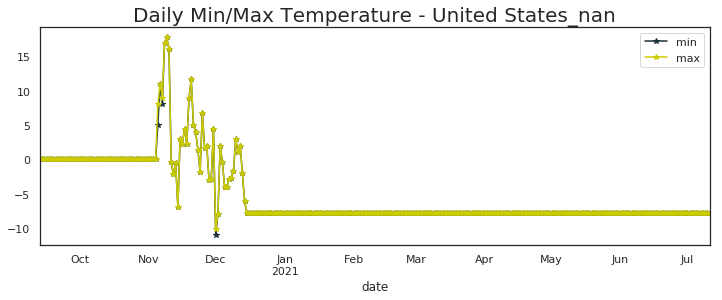

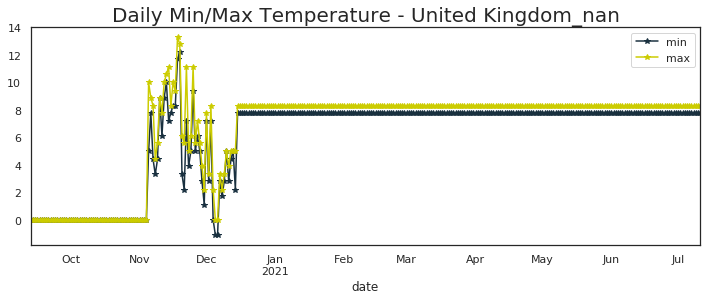

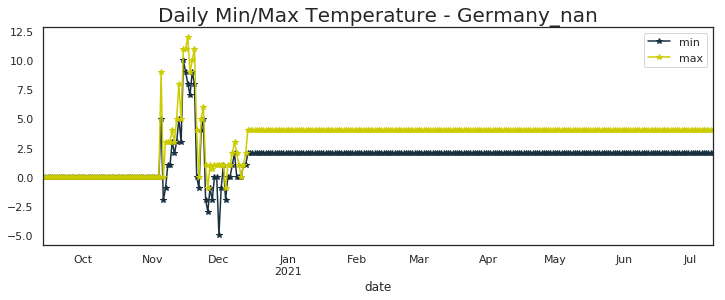

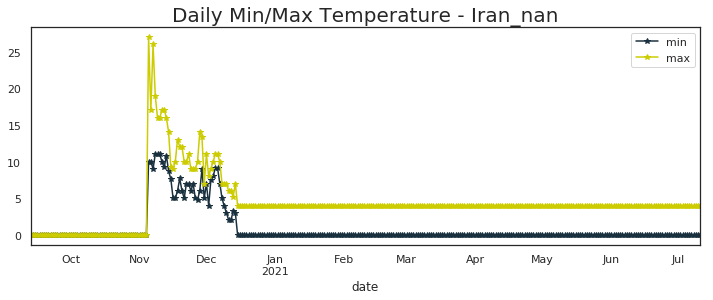

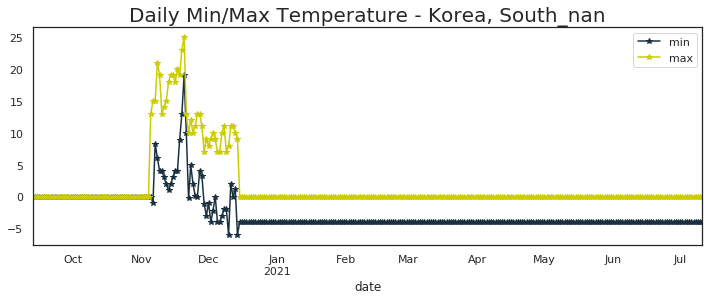

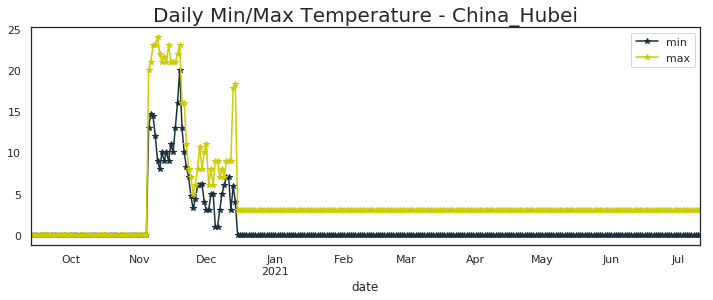

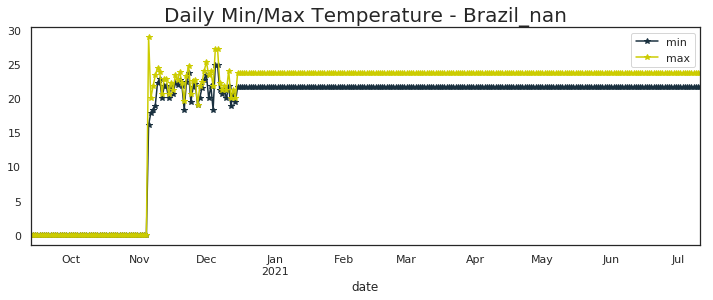

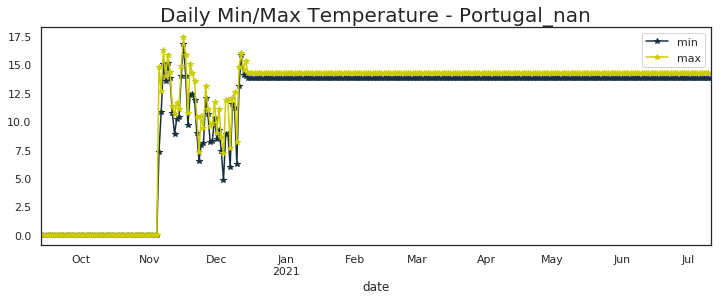

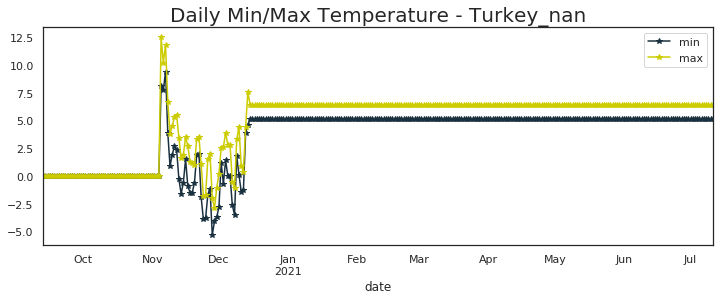

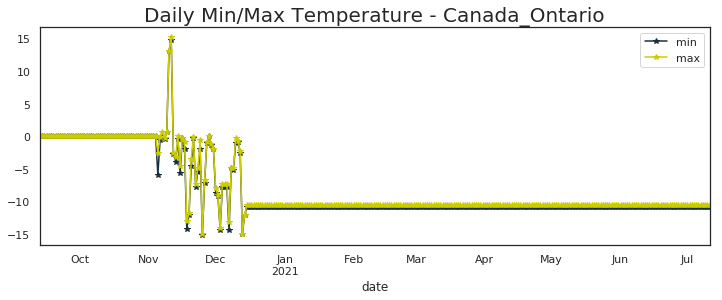

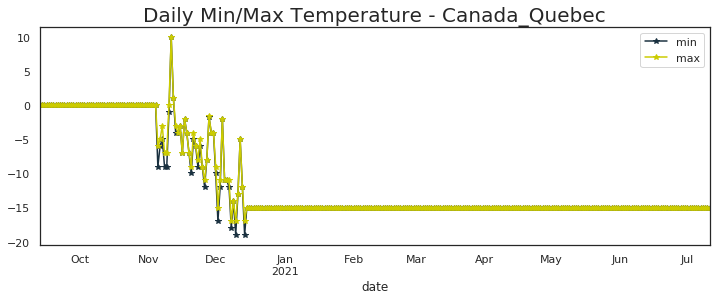

In [60]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
#
#rg1='China_Hubei'
#p=p[p['region']==rg1]
#p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+rg1,fontdict={'fontsize': 20})
#
## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
region_s=['Italy_nan','Spain_nan','United States_nan','United Kingdom_nan','Germany_nan','Iran_nan',
          'Korea, South_nan','China_Hubei','Brazil_nan','Portugal_nan','Turkey_nan',
          'Canada_Ontario','Canada_Quebec']
p=train[['date','region','min','max']].set_index('date')
for i in range(0,len(region_s)):     
    pv=p[p['region']==region_s[i]]
    pv.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+region_s[i],fontdict={'fontsize': 20})
#

In [61]:
avg_temp=train[['region','confirmed','min','max']]  # from 20-02-20 to 06-04-2020
avg_temp=avg_temp.groupby(by='region').max()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                             min   max
region                                
United States_nan           17.8  17.8
India_nan                   22.0  31.0
Brazil_nan                  24.8  28.9
France_nan                  12.1  13.3
Russia_nan                   0.0   4.0
Turkey_nan                   9.4  12.5
United Kingdom_nan          12.2  13.3
Argentina_nan                0.0   0.0
Colombia_nan                 0.0   0.0
Italy_nan                   12.9  19.1
Spain_nan                   12.6  14.0
Germany_nan                 10.0  12.0
Iran_nan                    11.0  27.0
Poland_nan                   8.9  10.6
Mexico_nan                  15.1  15.1
Indonesia_nan                0.0   0.0
Ukraine_nan                  0.0   0.0
South Africa_nan             0.0   0.0
Peru_nan                    24.6  29.9
Netherlands_nan             14.4  16.1
Czechia_nan                  0.0   0.0
Chile_nan                   18.0  22.0
Philippines_nan             

### Kalman X Days Ahead Prediction

In [62]:
%%R

#install.packages('reshape')

NULL


In [63]:
%%R

require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL

### JOAO - FIX
#
### Flexy Days maximum forward prediction =A Hint!= "Error increases as number of days increases"
days_prediction<-max_days_prediction # Set i days prediction # max_days_prediction=90 days forward prediction with Kalman Filter

for (i in 1: days_prediction) { 
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  date = col_date(format = "")
)
ℹ Use `spec()` for the full column specifications.




In [64]:
all_new=%R all_new

In [65]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Spain_nan')

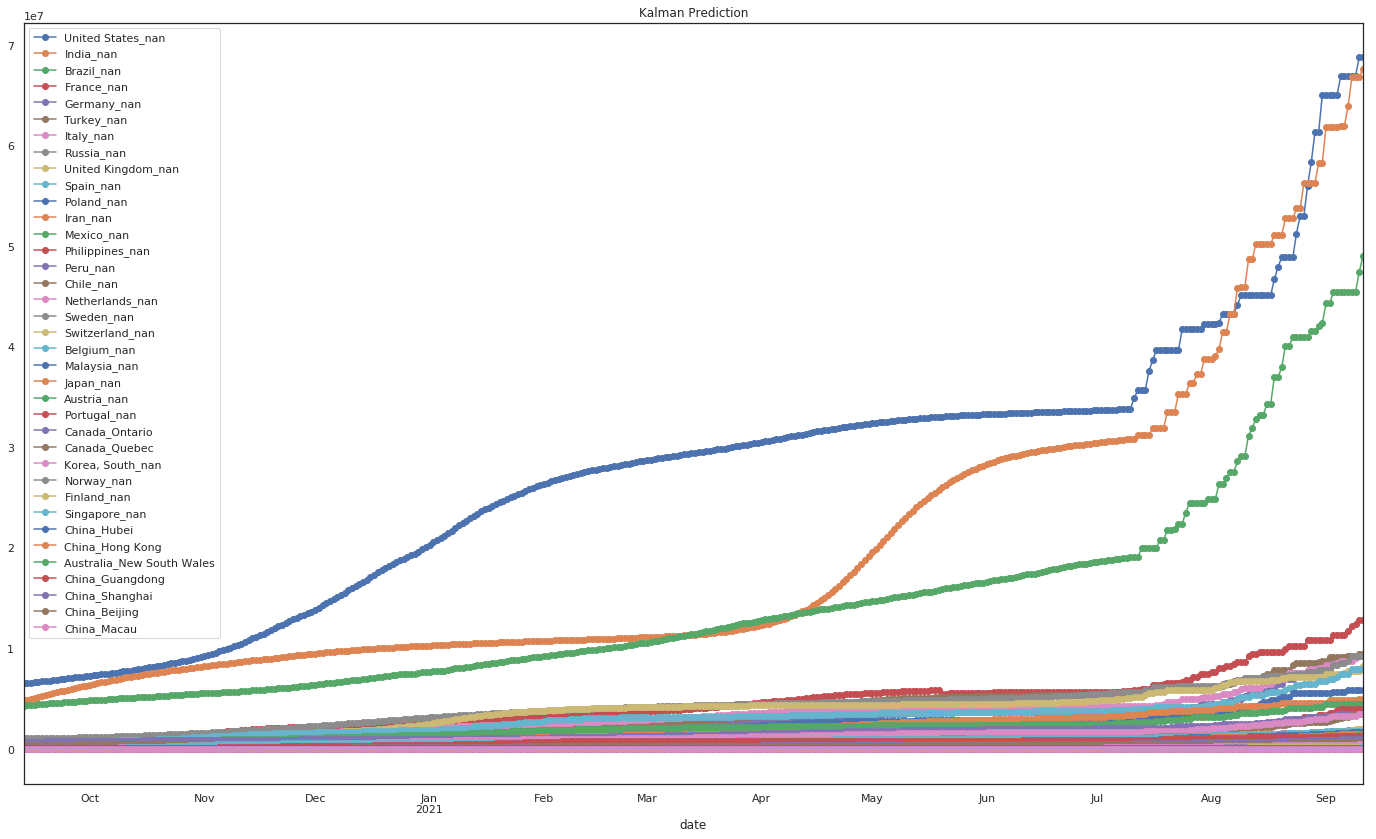

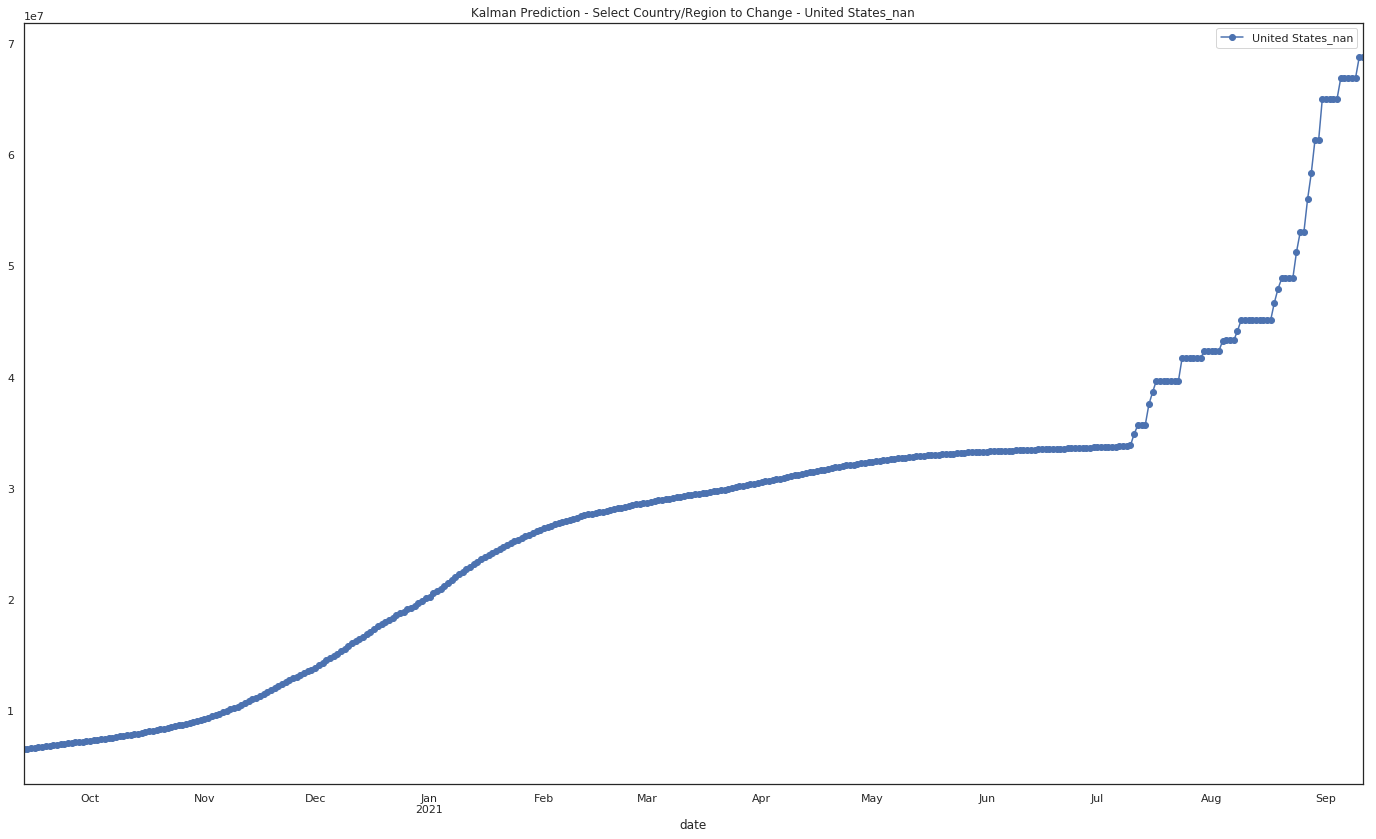

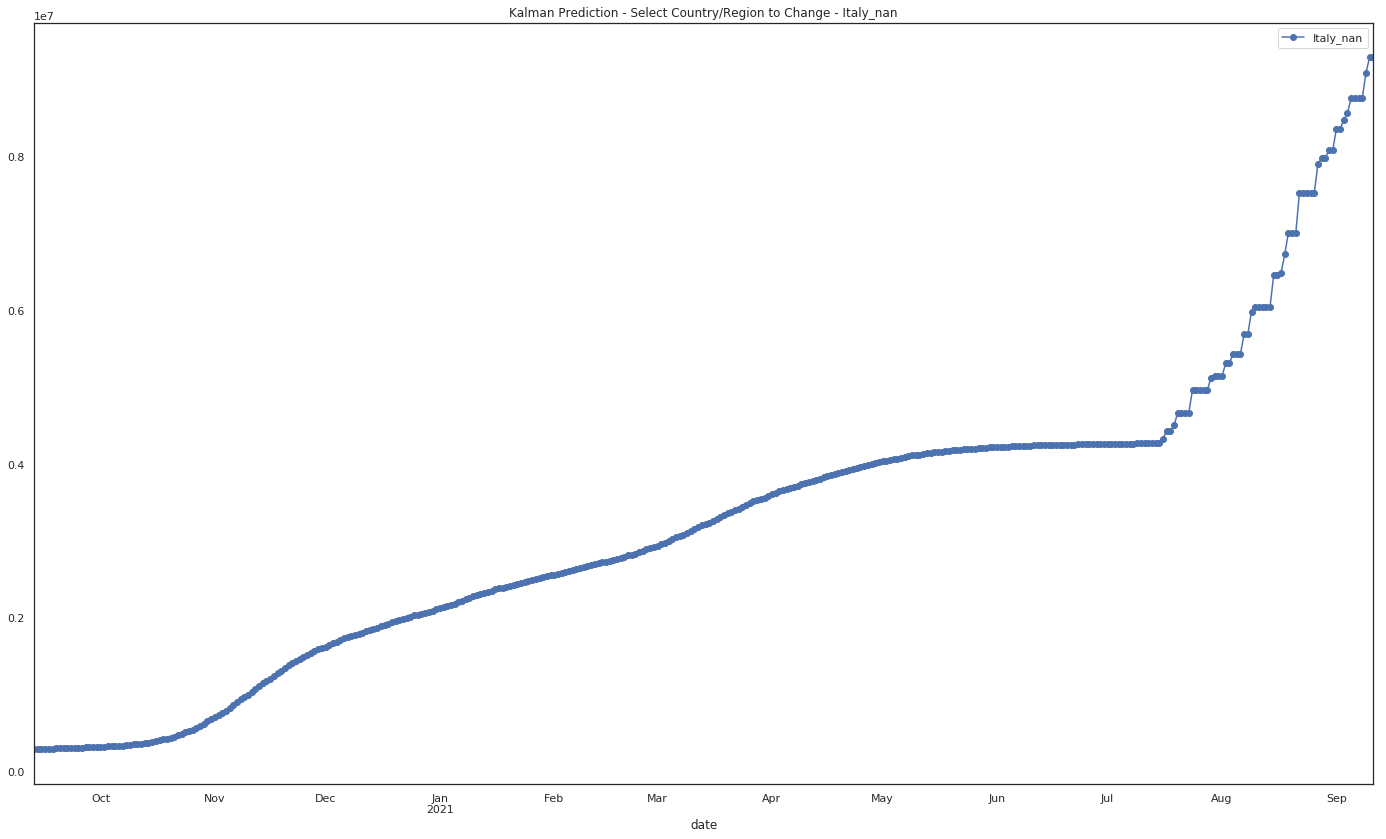

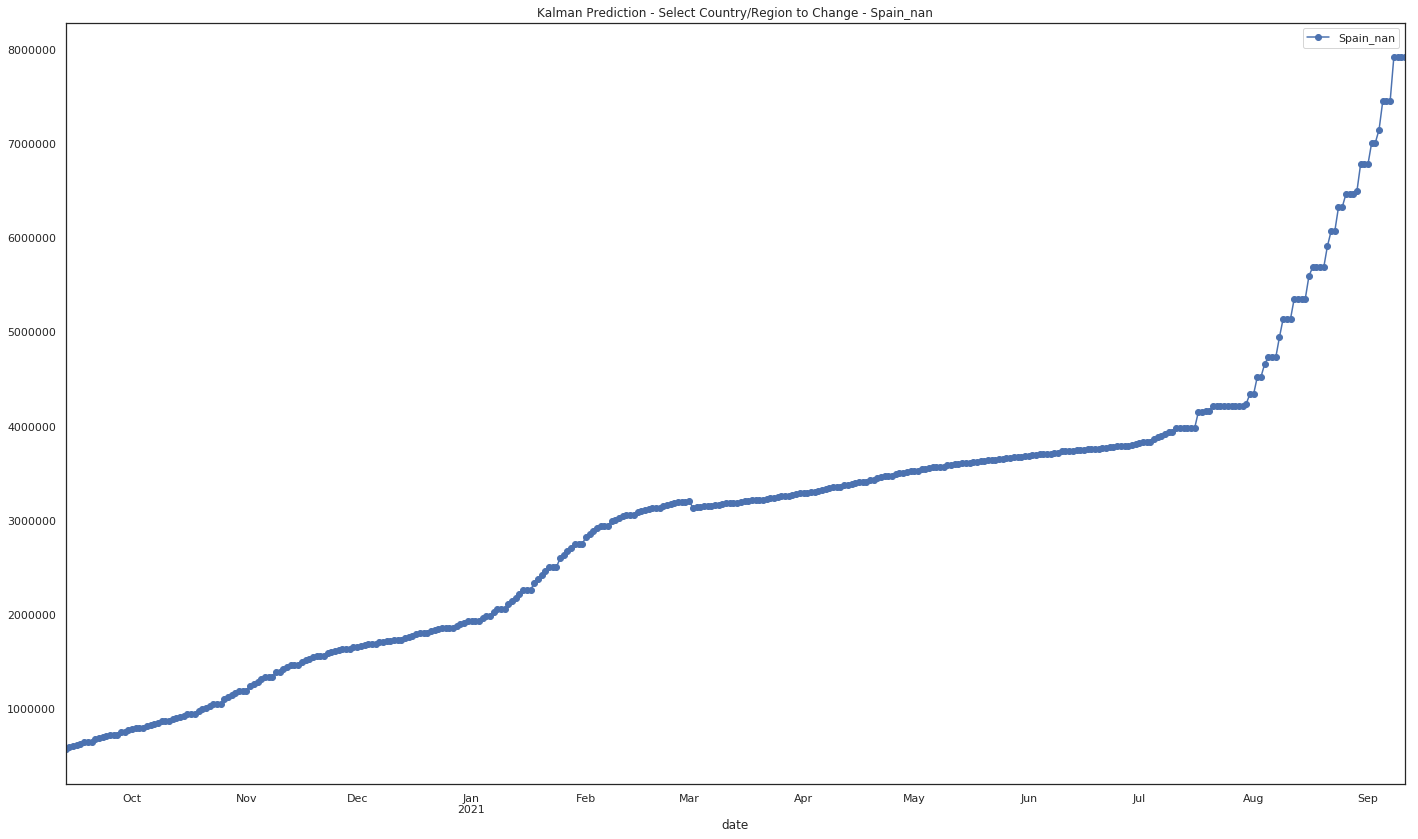

In [66]:
#
### Joao - Moving Forward ...
# Select regions From my_train_list
#
region=['date']+my_train_list
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman=p_kalman.reindex(p_kalman.max().sort_values(ascending=False).index, axis=1)
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')
#
p_kalman2=all_new[['date','United States_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))
#
p_kalman3=all_new[['date','Italy_nan']] ## Joao
p_kalman3=p_kalman3.set_index(['date'])
p_kalman3.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman3.columns[0]))
#
p_kalman4=all_new[['date','Spain_nan']] ## Joao
p_kalman4=p_kalman4.set_index(['date'])
p_kalman4.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman4.columns[0]))
#

/home/notebookuser/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


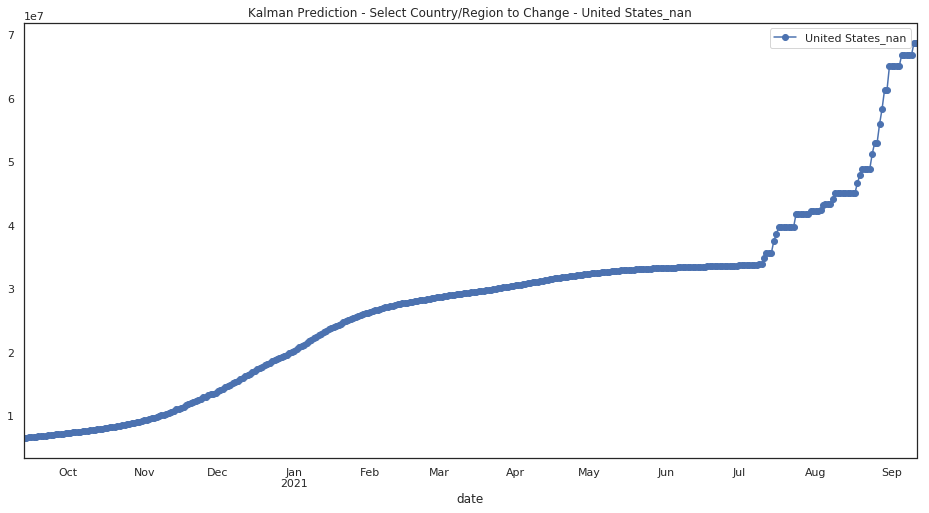

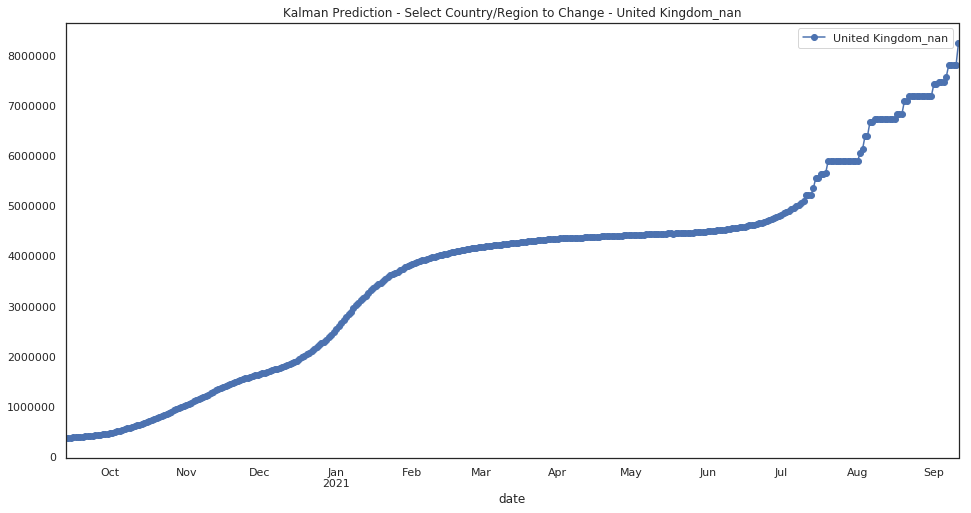

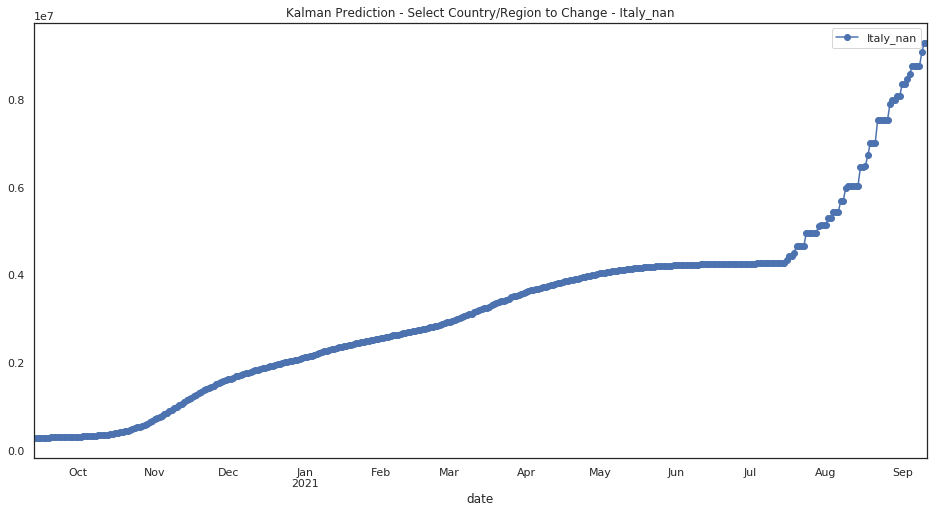

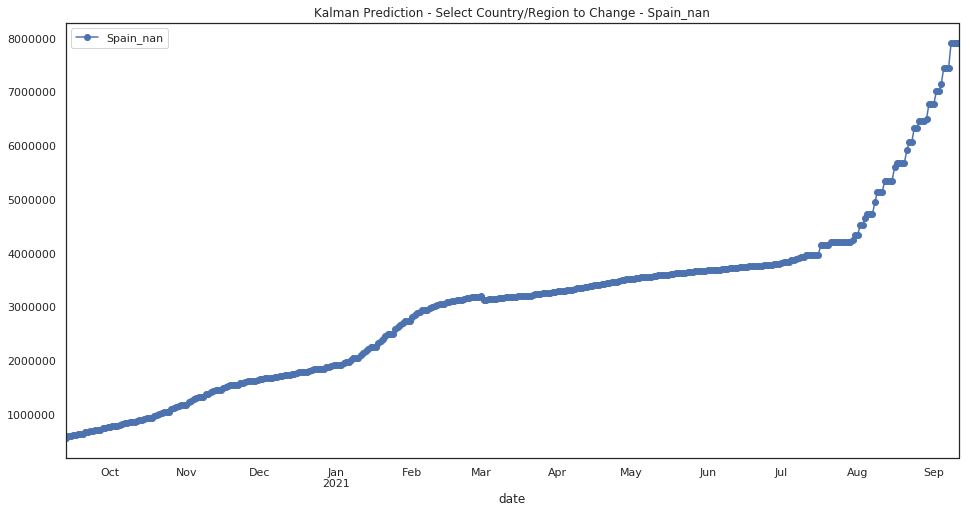

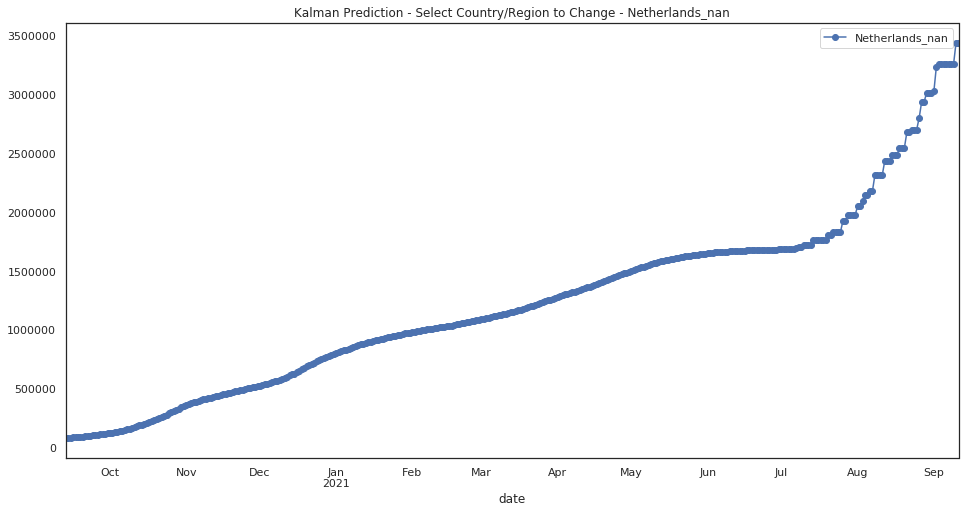

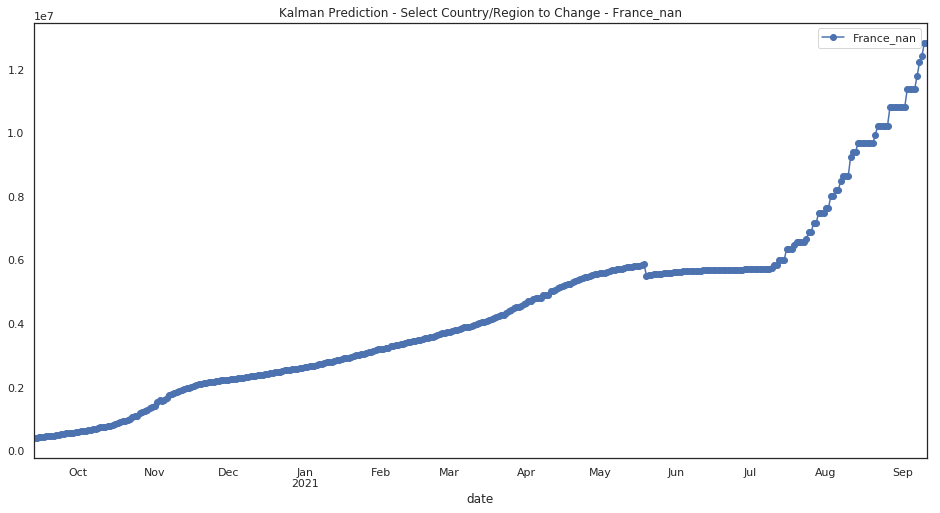

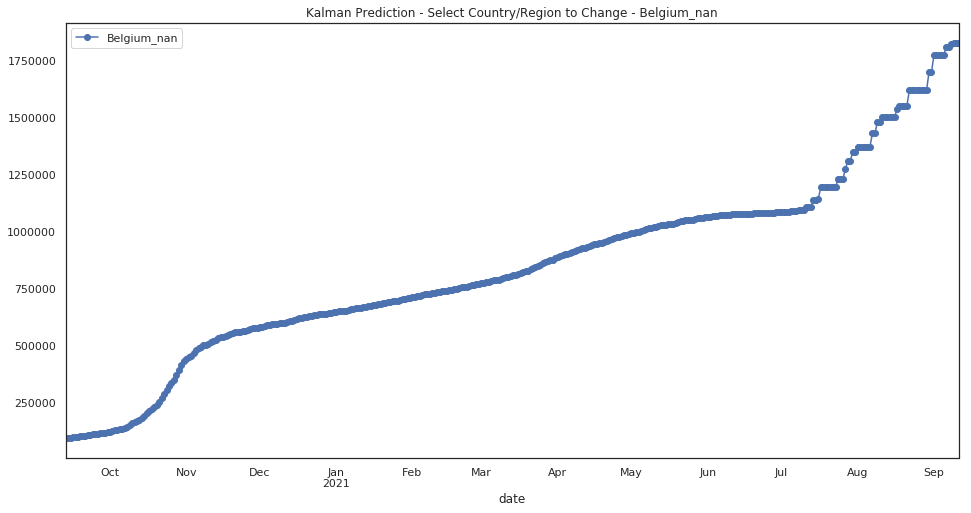

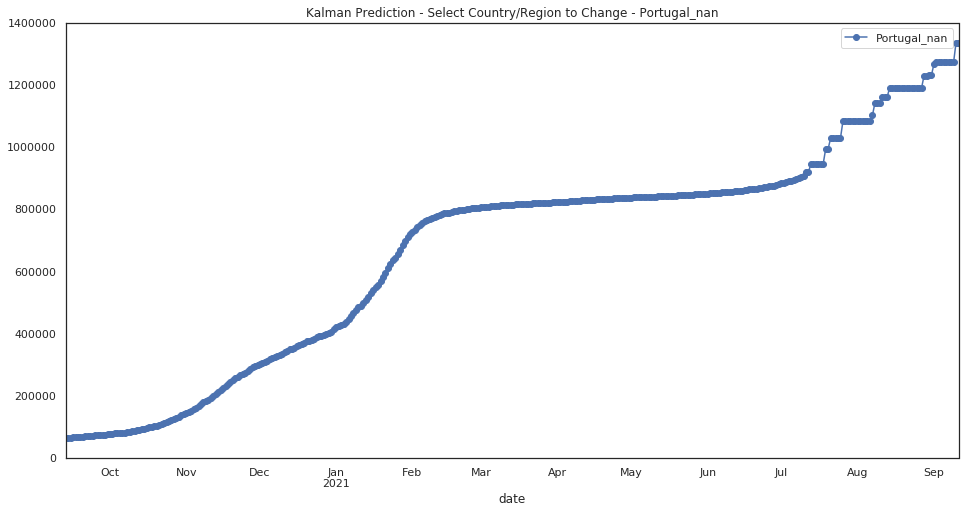

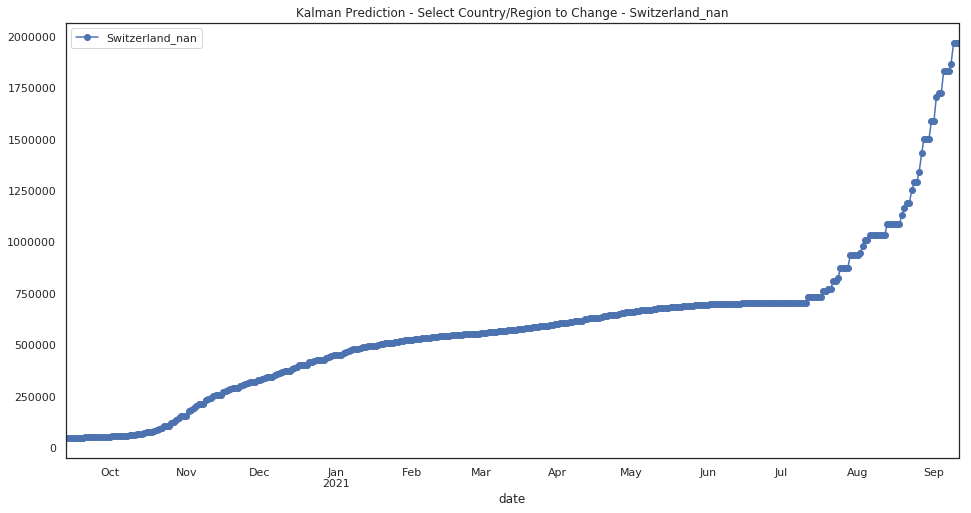

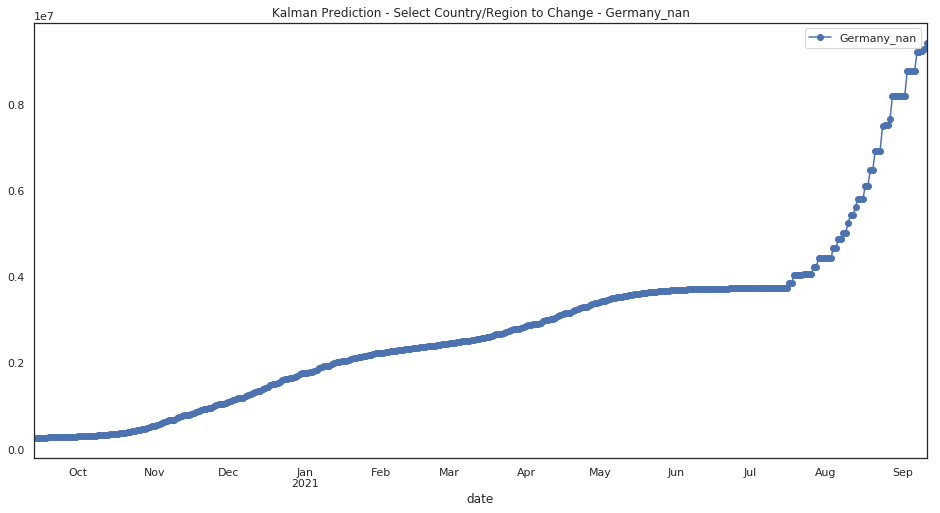

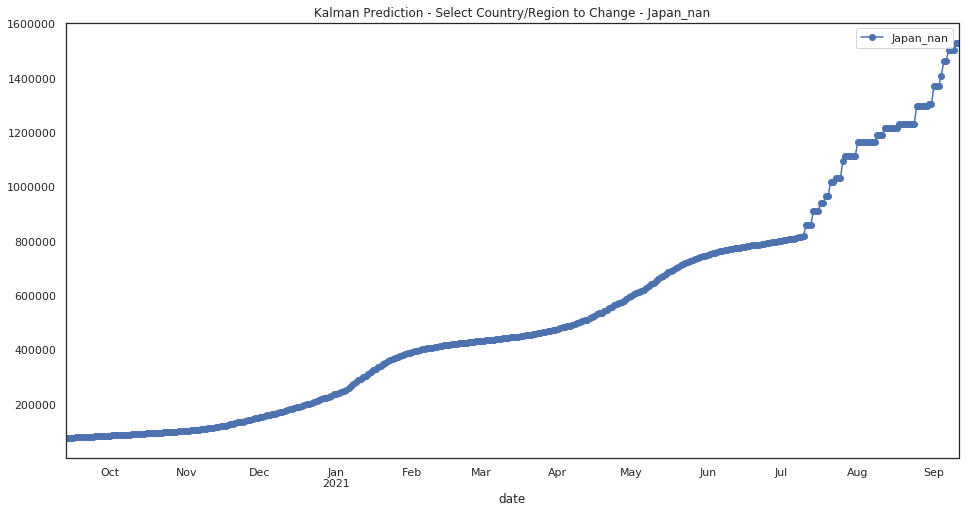

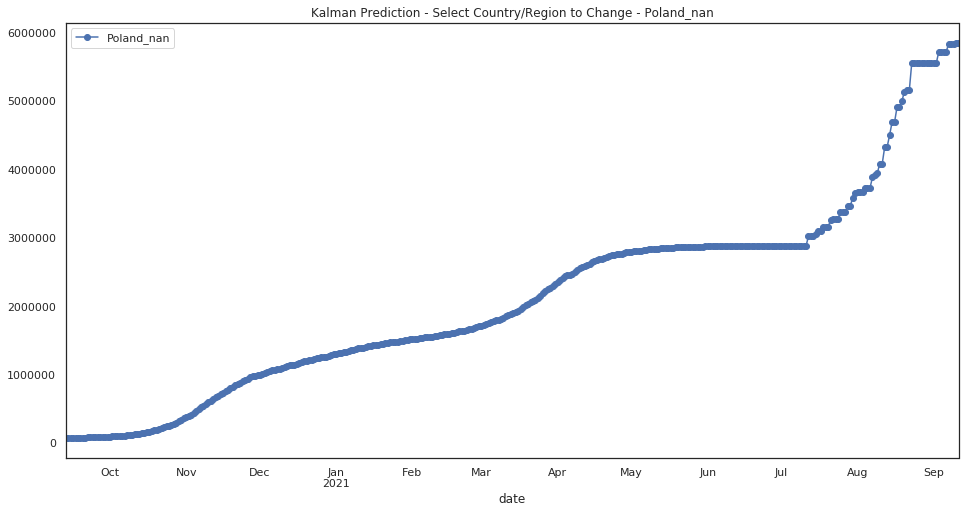

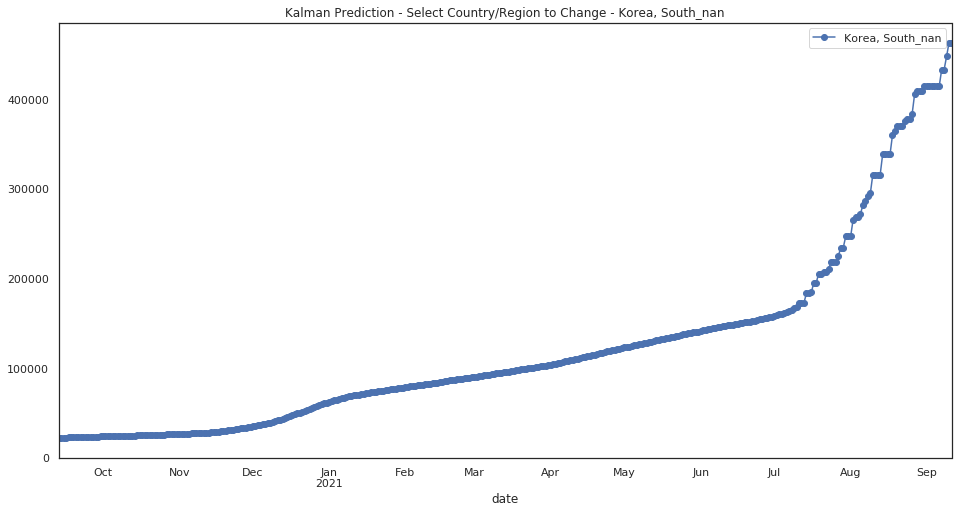

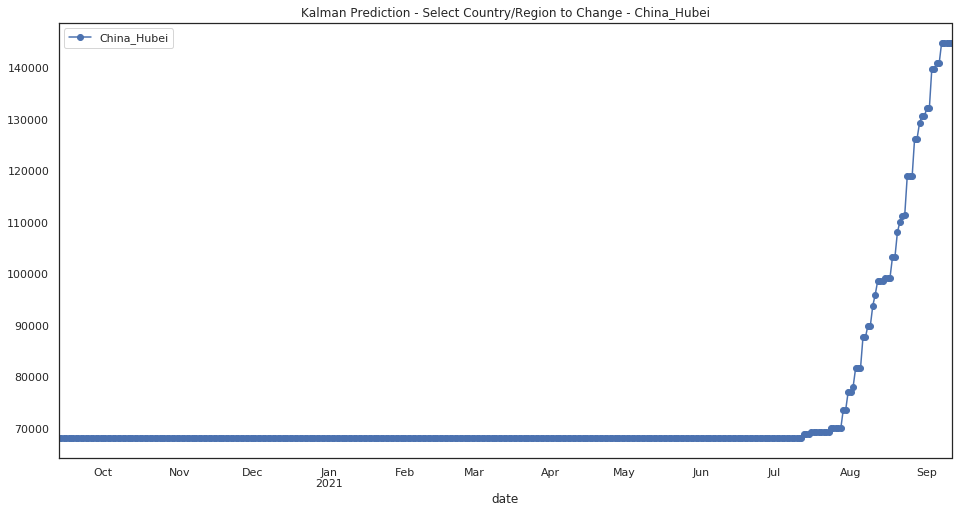

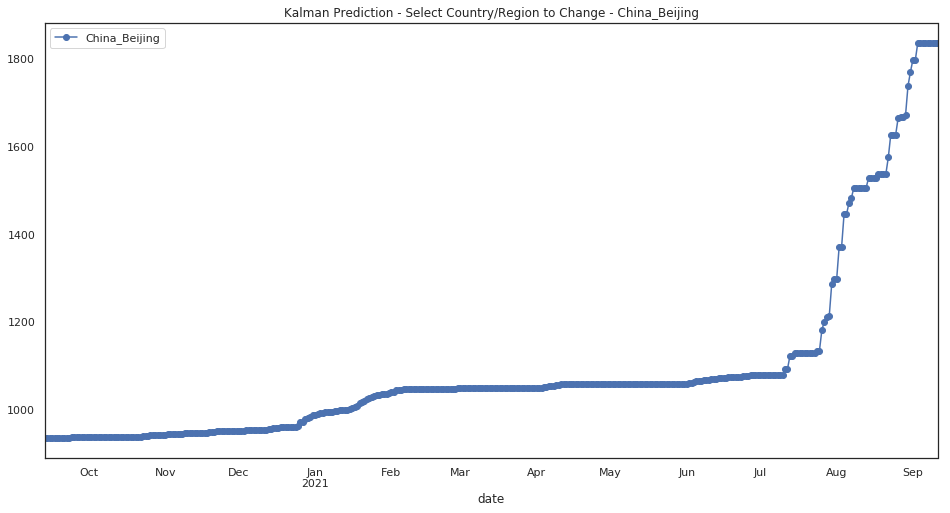

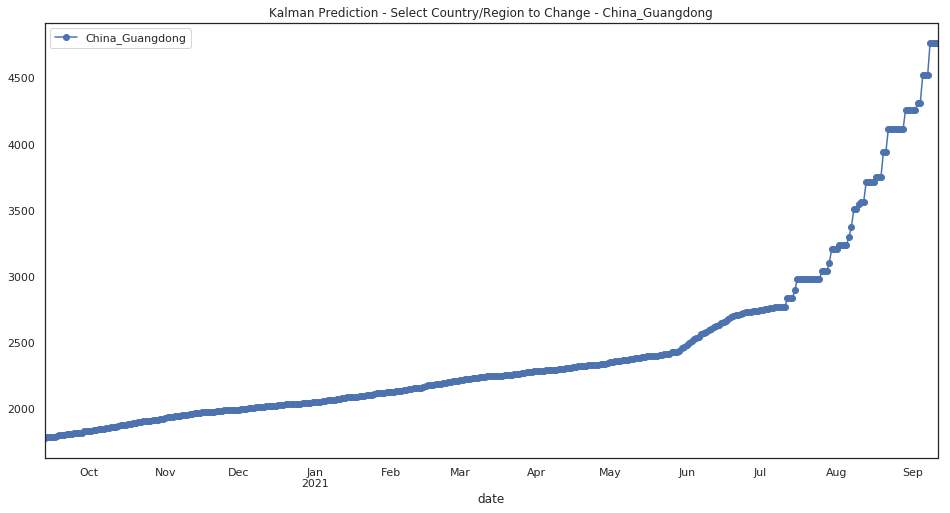

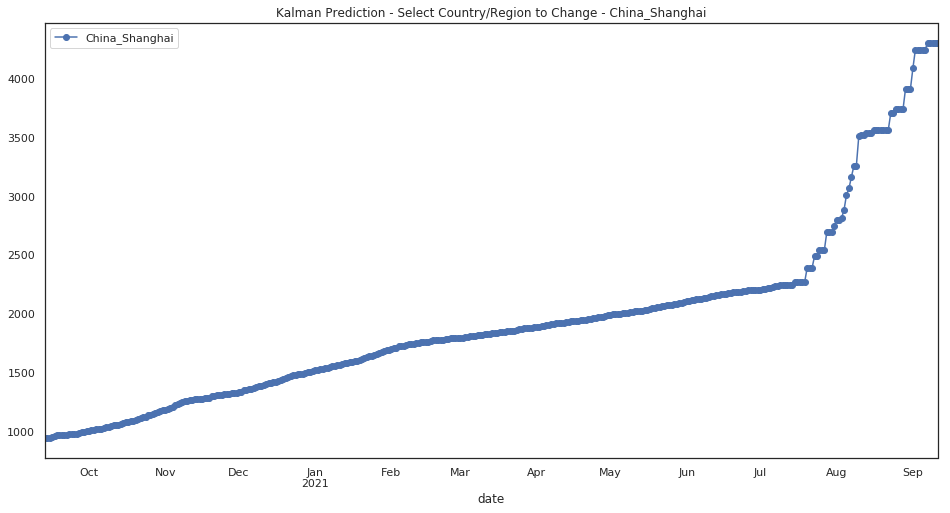

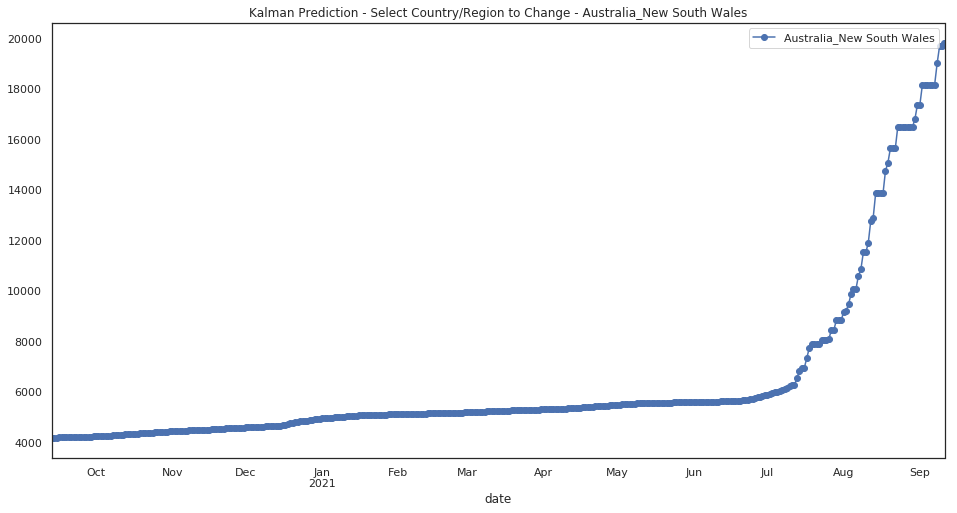

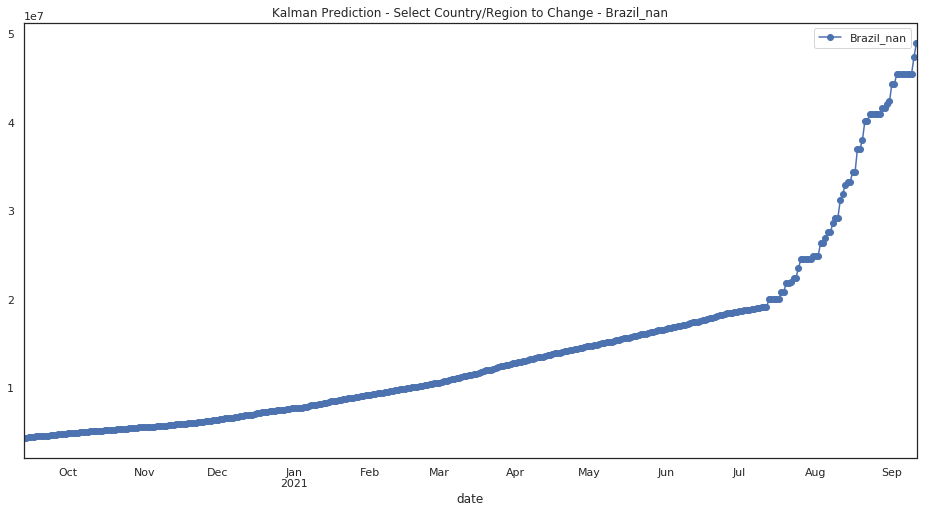

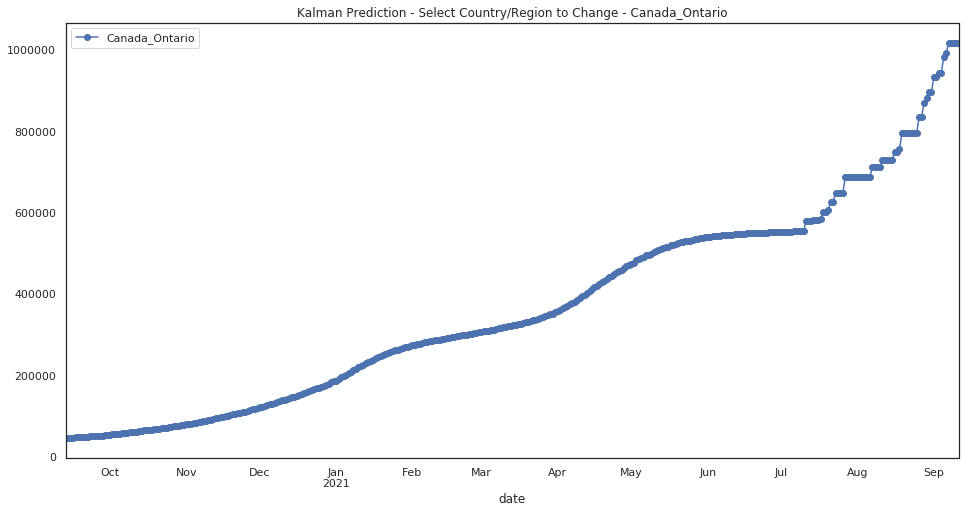

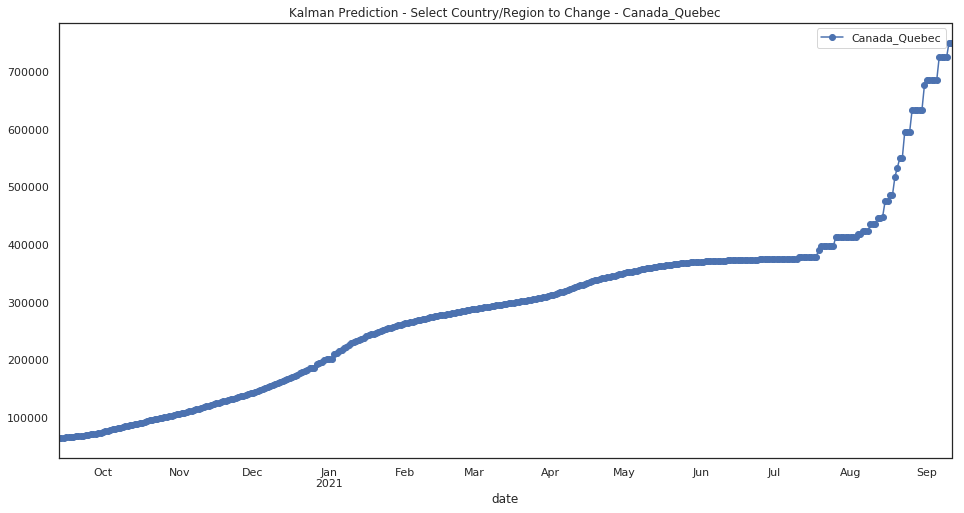

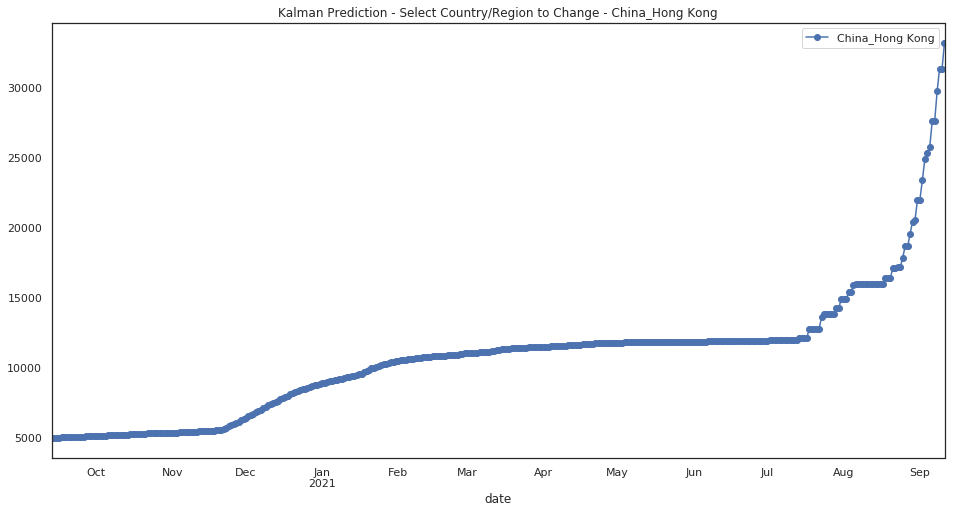

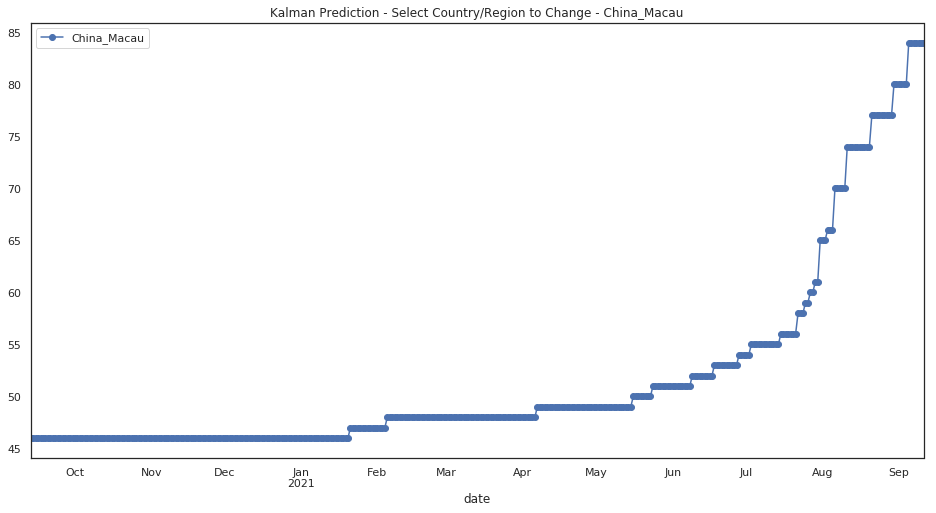

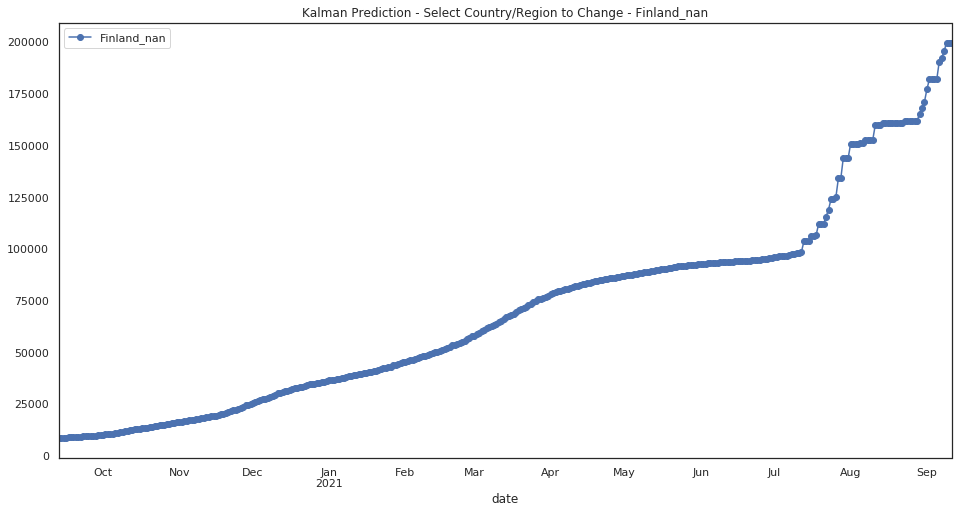

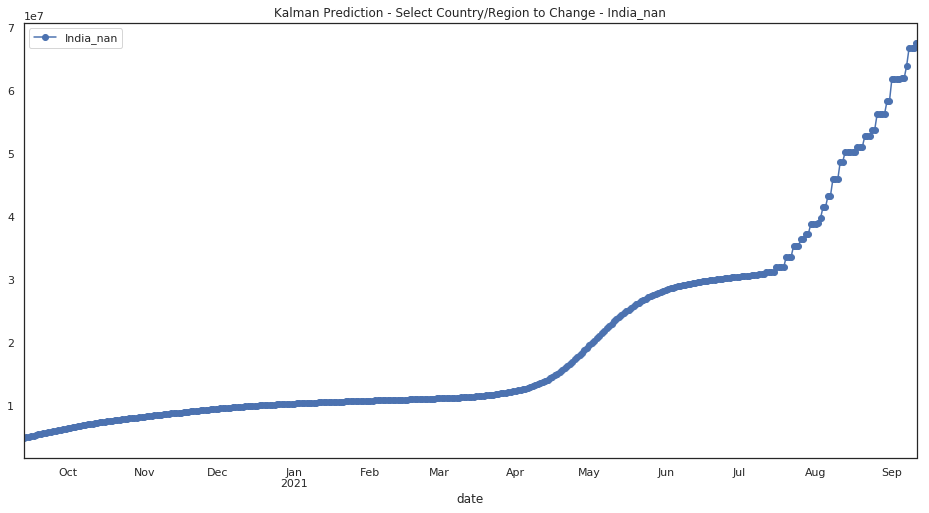

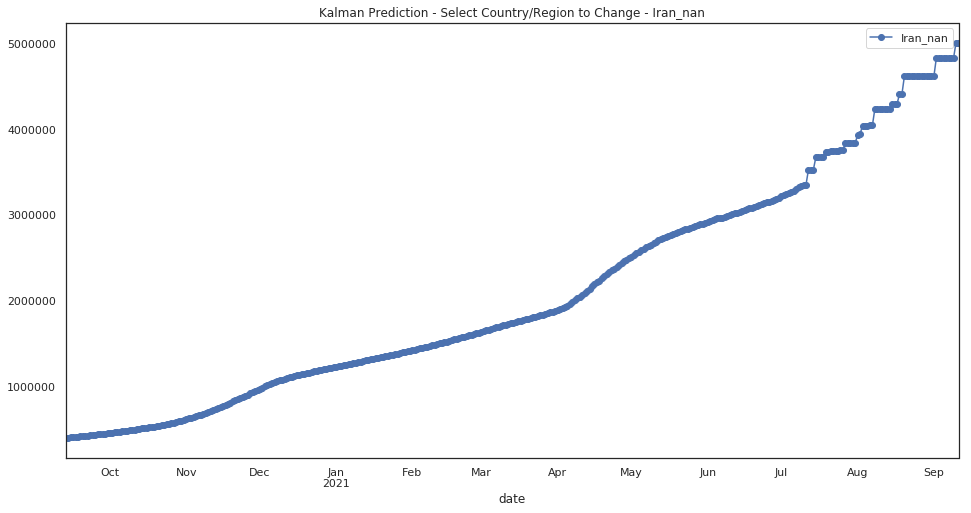

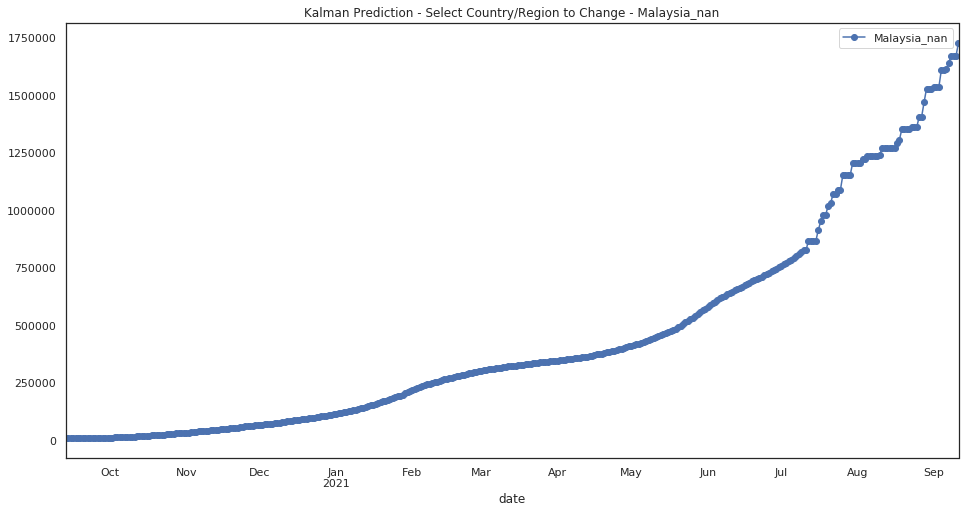

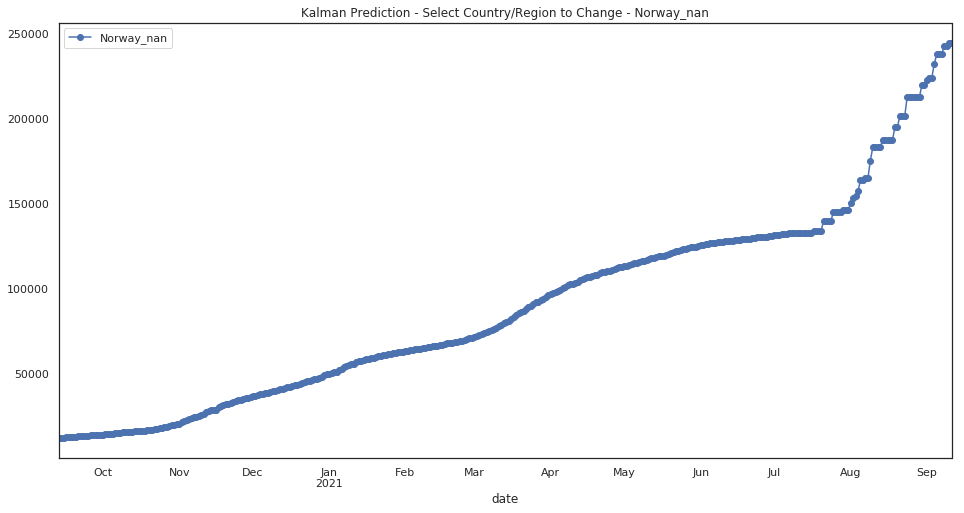

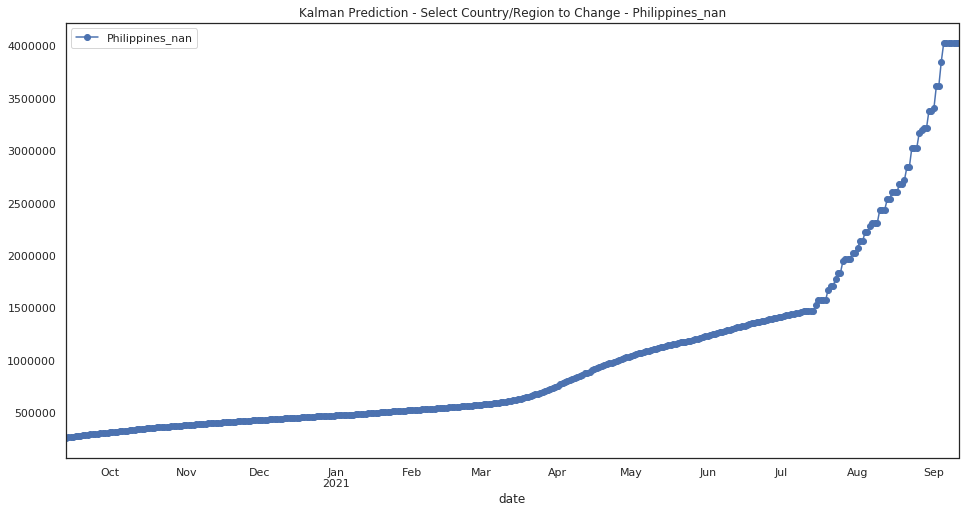

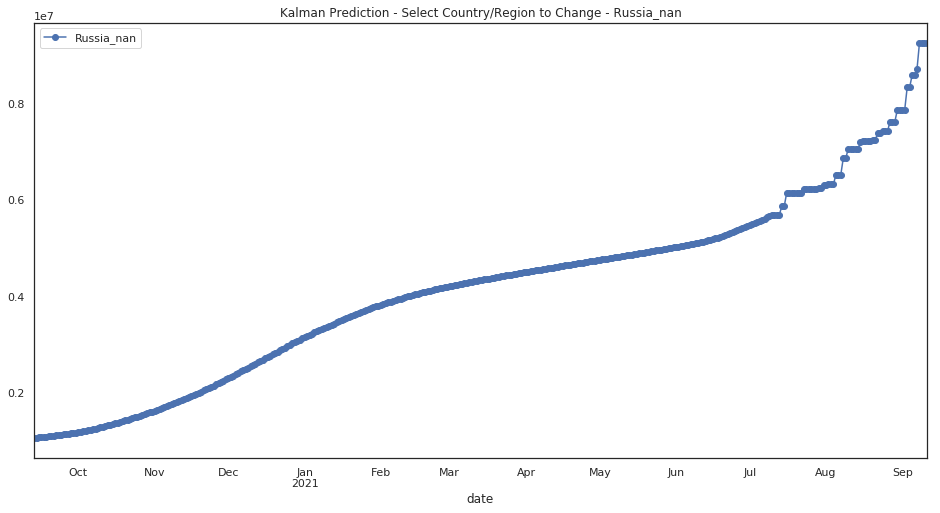

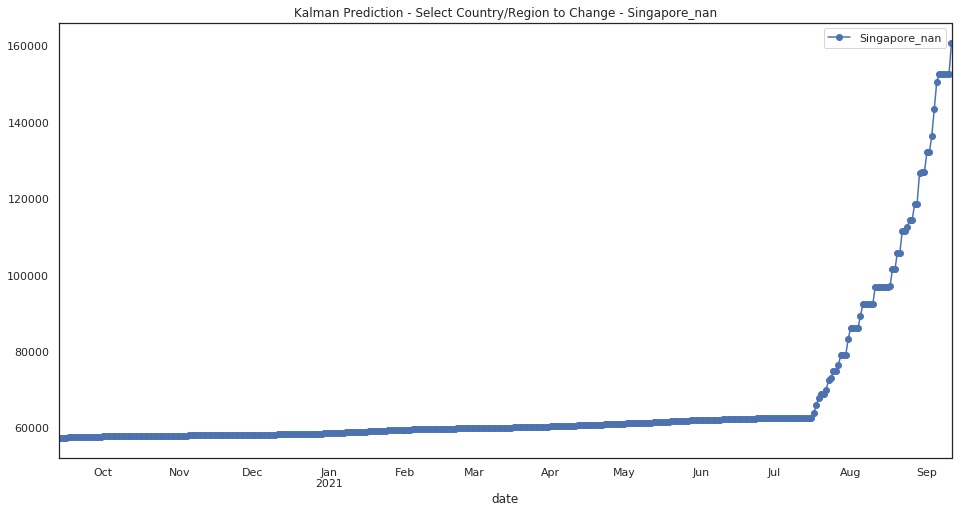

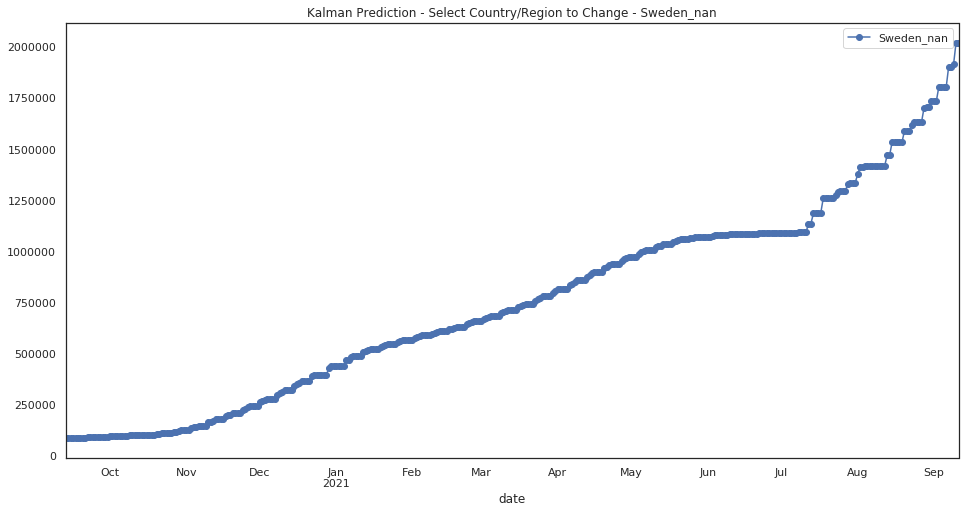

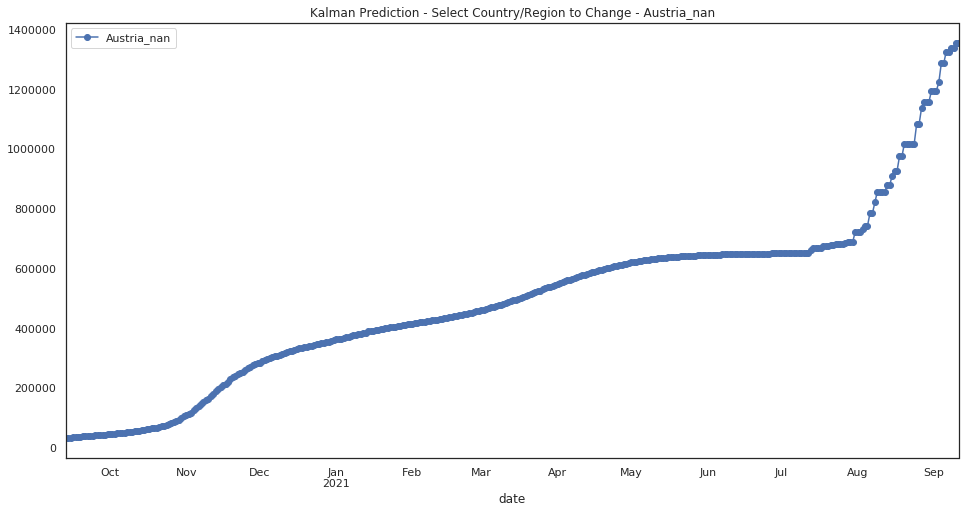

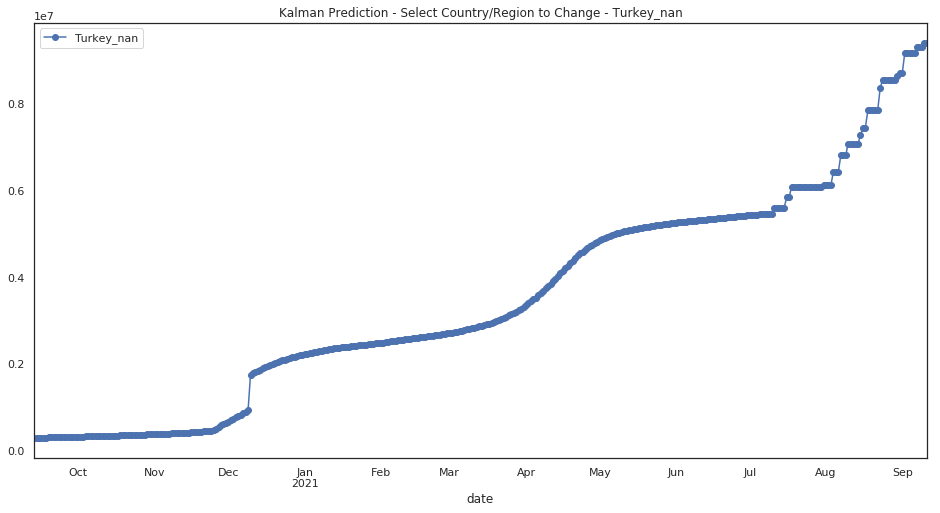

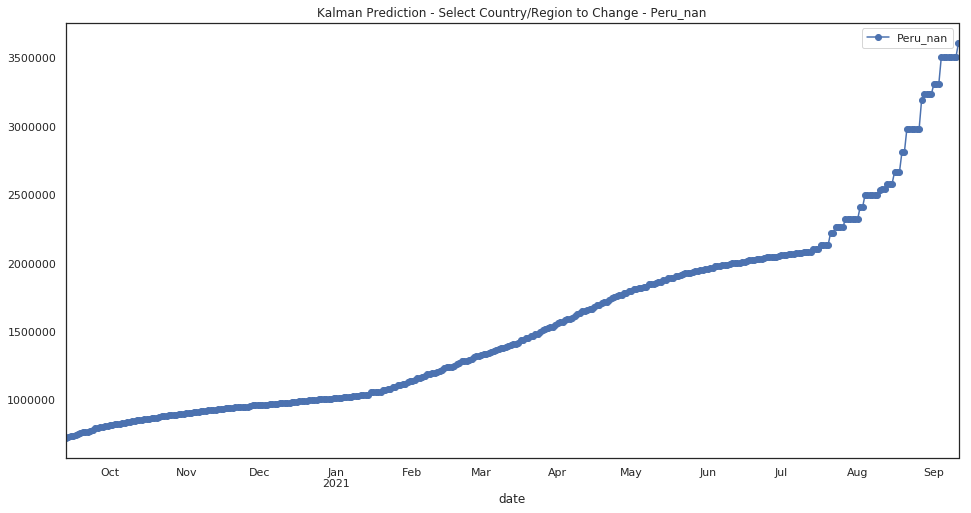

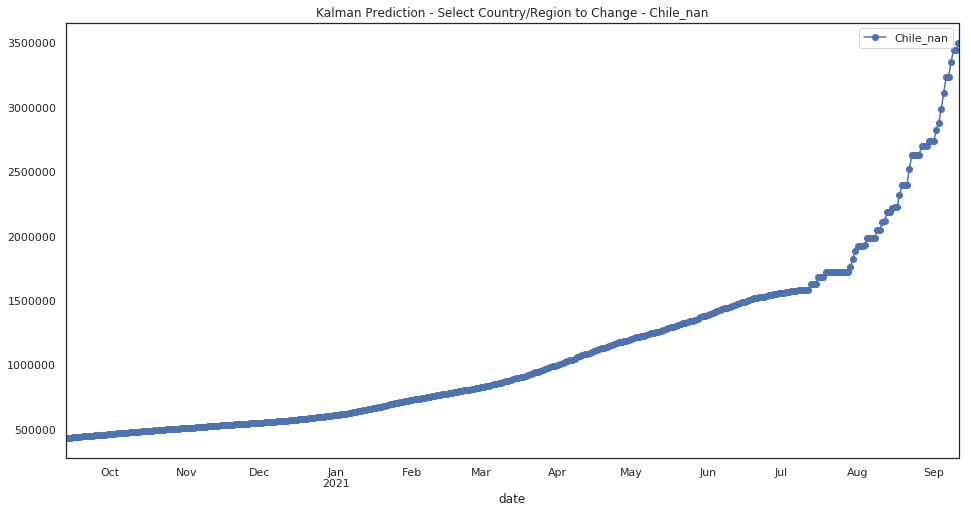

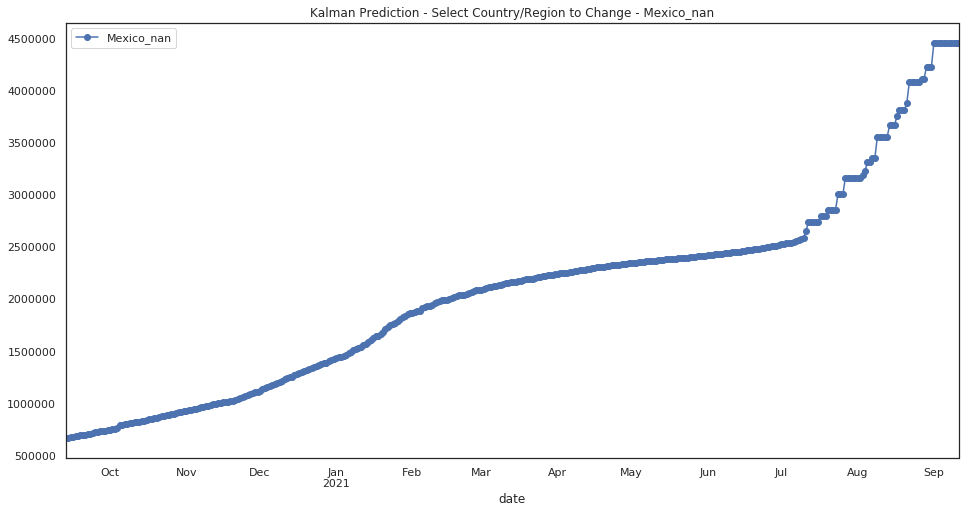

In [67]:
### Joao - Dynamic plot all regions individually
#print(region[:])
for i in range(1,len(region)):
    country_print=region[i]
    #print("here:"+country_print)
    p_kalman_rg=all_new[['date',country_print]]
    p_kalman_rg=p_kalman_rg.set_index(['date'])
    p_kalman_rg.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman_rg.columns[0]))
    

In [68]:
max_p0=all_new[:]
max_p0=max_p0.max()
max_date=max_p0[:1]
max_p0=max_p0[1:]
max_p0=pd.DataFrame(max_p0)
max_p0=max_p0.astype(str)
max_p0['pred_confirmed']=max_p0[max_p0.columns[0]].str.split(' ').str[-1].astype(float)
max_p0[max_p0.columns[0]]=max_p0[max_p0.columns[0]][:-len(max_p0['pred_confirmed'])]
max_p0=max_p0.sort_values(by='pred_confirmed', ascending=False)
#
print("### -- Confirmed max cases per country at last prediction date -- ###")
print(max_date)
max_p0[:]

### -- Confirmed max cases per country at last prediction date -- ###
date    2021-09-11 00:00:00
dtype: object


0  pred_confirmed
United States_nan                                   NaN      68778009.0
India_nan                                           NaN      67608938.0
Brazil_nan                                          NaN      48984838.0
Argentina_nan                                       NaN      16213587.0
France_nan                                          NaN      12848427.0
Colombia_nan                                        NaN      11401750.0
Germany_nan                                         NaN       9442820.0
Turkey_nan                                          NaN       9414263.0
Italy_nan                                           NaN       9297118.0
Russia_nan                                          NaN       9267827.0
United Kingdom_nan                                  NaN       8262461.0
Spain_nan                                           NaN       7918747.0
Indonesia_nan                                       NaN       6168704.0
Poland_nan                                          NaN       5852629.0
Iran_nan                                            NaN       5011634.0
South Africa_nan                                    NaN       4949791.0
Ukraine_nan                                         NaN       4628762.0
Mexico_nan                                          NaN       4459658.0
Czechia_nan                                         NaN       4414028.0
Philippines_nan                                     NaN       4031126.0
Peru_nan                                            NaN       3613080.0
Chile_nan                                           NaN       3503311.0
Netherlands_nan                                     NaN       3444539.0
Bangladesh_nan                                      NaN       3245507.0
Iraq_nan                                            NaN       2504792.0
Pakistan_nan                                        NaN       2193703.0
Sweden_nan                                          NaN       2021815.0
Switzerland_nan                                     NaN       1969645.0
Romania_nan                                         NaN       1929349.0
Belgium_nan                                         NaN       1829802.0
...                                                 ...             ...
China_Gansu                                         NaN           410.0
Grenada_nan                                         NaN           367.0
China_Guizhou                                       NaN           267.0
Canada_Northwest Territories                        NaN           242.0
France_New Caledonia                                NaN           242.0
United Kingdom_Anguilla                             NaN           211.0
China_Ningxia                                       NaN           207.0
United Kingdom_Falkland Islands (Malvinas)          NaN           122.0
Denmark_Greenland                                   NaN           100.0
China_Macau                                         NaN            84.0
United Kingdom_Montserrat                           NaN            63.0
France_Saint Pierre and Miquelon                    NaN            62.0
Holy See_nan                                        NaN            46.0
China_Qinghai                                       NaN            43.0
Canada_Grand Princess                               NaN            34.0
Solomon Islands_nan                                 NaN            34.0
Canada_Repatriated Travellers                       NaN            22.0
MS Zaandam_nan                                      NaN             9.0
Summer Olympics 2020_nan                            NaN             6.0
Vanuatu_nan                                         NaN             4.0
United Kingdom_Saint Helena, Ascension and Tris...  NaN             4.0
Marshall Islands_nan                                NaN             4.0
Samoa_nan                                           NaN             3.0
Kiribati_nan                                        NaN             2.0
China_Unknown         

In [69]:
t.to_csv(r'data/t_confirmed_global.csv', index = False, header=True)

In [70]:
all_new.to_csv(r'data/prediction_kalman_filter_global.csv', index = False, header=True)

## Iterative Regression

In [71]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
    if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
        t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
    if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
        t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
        t_iter.iloc[i,6]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-2,2]*100 -1 +1))*100
        t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
    if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
        t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
        t_iter.iloc[i,7]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-4,2]*100 -1 +1))*100
    if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
        t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
        t_iter.iloc[i,8]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-8,2]*100 -1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(10000000) # Fill 10M population if null
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
#test_iter['infected_rate'] =((test_iter['last_day']+1)*10000)/((test_iter['population']+1)*100)*100
test_iter['infected_rate']=(((test_iter['last_day'] +1)*100)/((test_iter['population'] +1)*100000) *10)
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
    if(np.isnan(test_iter.iloc[i,13])):
        if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
            test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
            test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


In [72]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [73]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
        if(pred.iloc[i,0]<pred.iloc[i-1,1]):
            pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        
### Joao - Save long term predictions
pred.to_csv('data/pred_'+str(num_days_R_prediction)+'_days.csv', index = False, header=True)
###
pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

In [74]:
pred[:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-09-13          43396.0      19744.0      51641.0      11092.0   
2020-09-14          43445.0      19888.0      51850.0      11173.0   
2020-09-15          38772.0      11520.0      48496.0       1438.0   
2020-09-16          38815.0      11672.0      48734.0       1438.0   
2020-09-17          38855.0      11816.0      49121.0       1483.0   
2020-09-18          38872.0      11948.0      49339.0       1483.0   
2020-09-19          38897.0      12073.0      49545.0       1564.0   
2020-09-20          38919.0      12226.0      49744.0       1564.0   
2020-09-21          39172.0      12546.0      50070.0       1848.0   
2020-09-22          39176.0      12690.0      50261.0       1681.0   
2020-09-23          39221.0      12818.0      50448.0       1956.0   
2020-09-24          39246.0      12949.0      50629.0       1753.0   
2020-09-25          39256.0      13066.0      50805.0       1990.0   
2020-09-26          39262.0      13179.0      50967.0       1836.0   
2020-09-27          39286.0      13292.0      51118.0       2006.0   
2020-09-28          39317.0      13420.0      51265.0       2118.0   
2020-09-29          39328.0      13542.0      51418.0       1966.0   
2020-09-30          39344.0      13678.0      51584.0       2242.0   
2020-10-01          39361.0      13835.0      51750.0       2050.0   
2020-10-02          39370.0      13989.0      51910.0       2261.0   
2020-10-03          39373.0      14146.0      52060.0       2110.0   
2020-10-04          39412.0      14299.0      52199.0       2245.0   
2020-10-05          39499.0      14440.0      52330.0       2470.0   
2020-10-06          39577.0      14595.0      52456.0       2370.0   
2020-10-07          39638.0      14752.0      52577.0       2824.0   
2020-10-08          39703.0      14919.0      52712.0       2568.0   
2020-10-09          39774.0      15089.0      52864.0       2903.0   
2020-10-10          39791.0      15257.0      53007.0       2696.0   
2020-10-11          39853.0      15425.0      53139.0       2869.0   
2020-10-12          39946.0      15594.0      53375.0       3127.0   
...                     ...          ...          ...          ...   
2021-08-14         176449.0     223155.0     208949.0      23179.0   
2021-08-15         178221.0     232727.0     211447.0      23119.0   
2021-08-16         177631.0     239744.0     213416.0      23111.0   
2021-08-17         182295.0     245276.0     215912.0      24352.0   
2021-08-18         186410.0     240048.0     225750.0      24698.0   
2021-08-19         190973.0     240048.0     233667.0      24698.0   
2021-08-20         202622.0     240048.0     233269.0      24698.0   
2021-08-21         202610.0     240048.0     237571.0      25772.0   
2021-08-22         199836.0     240048.0     234846.0      26172.0   
2021-08-23         205663.0     242052.0     234846.0      27167.0   
2021-08-24         209941.0     255994.0     234846.0      28596.0   
2021-08-25         214686.0     268033.0     236270.0      28767.0   
2021-08-26         220342.0     266410.0     236270.0      28642.0   
2021-08-27         217361.0     264708.0     236270.0      30589.0   
2021-08-28         230998.0     267318.0     236741.0      31182.0   
2021-08-29         240240.0     268007.0     237122.0      31109.0   
2021-08-30         233937.0     277004.0     239299.0      31109.0   
2021-08-31         233937.0     289469.0     241055.0      31112.0   
2021-09-01         237929.0     292519.0     245973.0      31112.0   
2021-09-02         243278.0     294417.0     254609.0      31112.0   
2021-09-03         242356.0     291958.0     253908.0      31112.0   
2021-09-04         255483.0     295800.0     251826.0      31112.0   
2021-09-05         262950.0     302302.0     263930.0      31112.0   
2021-09-06         270902.0     301693.0     275209.0      31112.0   
2021-09-07

In [75]:
### JOAO - FIX - issue if all source days ts[:]
## Comment for -35days start. 26feb.2020 ts=ts[35:]
## 06Aug2020 - For all
pred=pred[:-1]

In [76]:
region1=max_p0[max_p0.columns[0]].astype(str).reset_index().rename(columns={"index": "region"}).get_values()
region=[region[0] for region in region1]
region

['United States_nan',
 'India_nan',
 'Brazil_nan',
 'Argentina_nan',
 'France_nan',
 'Colombia_nan',
 'Germany_nan',
 'Turkey_nan',
 'Italy_nan',
 'Russia_nan',
 'United Kingdom_nan',
 'Spain_nan',
 'Indonesia_nan',
 'Poland_nan',
 'Iran_nan',
 'South Africa_nan',
 'Ukraine_nan',
 'Mexico_nan',
 'Czechia_nan',
 'Philippines_nan',
 'Peru_nan',
 'Chile_nan',
 'Netherlands_nan',
 'Bangladesh_nan',
 'Iraq_nan',
 'Pakistan_nan',
 'Sweden_nan',
 'Switzerland_nan',
 'Romania_nan',
 'Belgium_nan',
 'Hungary_nan',
 'Malaysia_nan',
 'Israel_nan',
 'Jordan_nan',
 'Japan_nan',
 'Lebanon_nan',
 'Serbia_nan',
 'Austria_nan',
 'Portugal_nan',
 'United Arab Emirates_nan',
 'Morocco_nan',
 'Oman_nan',
 'Panama_nan',
 'Greece_nan',
 'Nepal_nan',
 'Canada_Ontario',
 'Saudi Arabia_nan',
 'Bolivia_nan',
 'Kazakhstan_nan',
 'Tunisia_nan',
 'Dominican Republic_nan',
 'Belarus_nan',
 'Bulgaria_nan',
 'Uruguay_nan',
 'Costa Rica_nan',
 'Bahrain_nan',
 'Paraguay_nan',
 'Burma_nan',
 'Cuba_nan',
 'Croatia_nan',


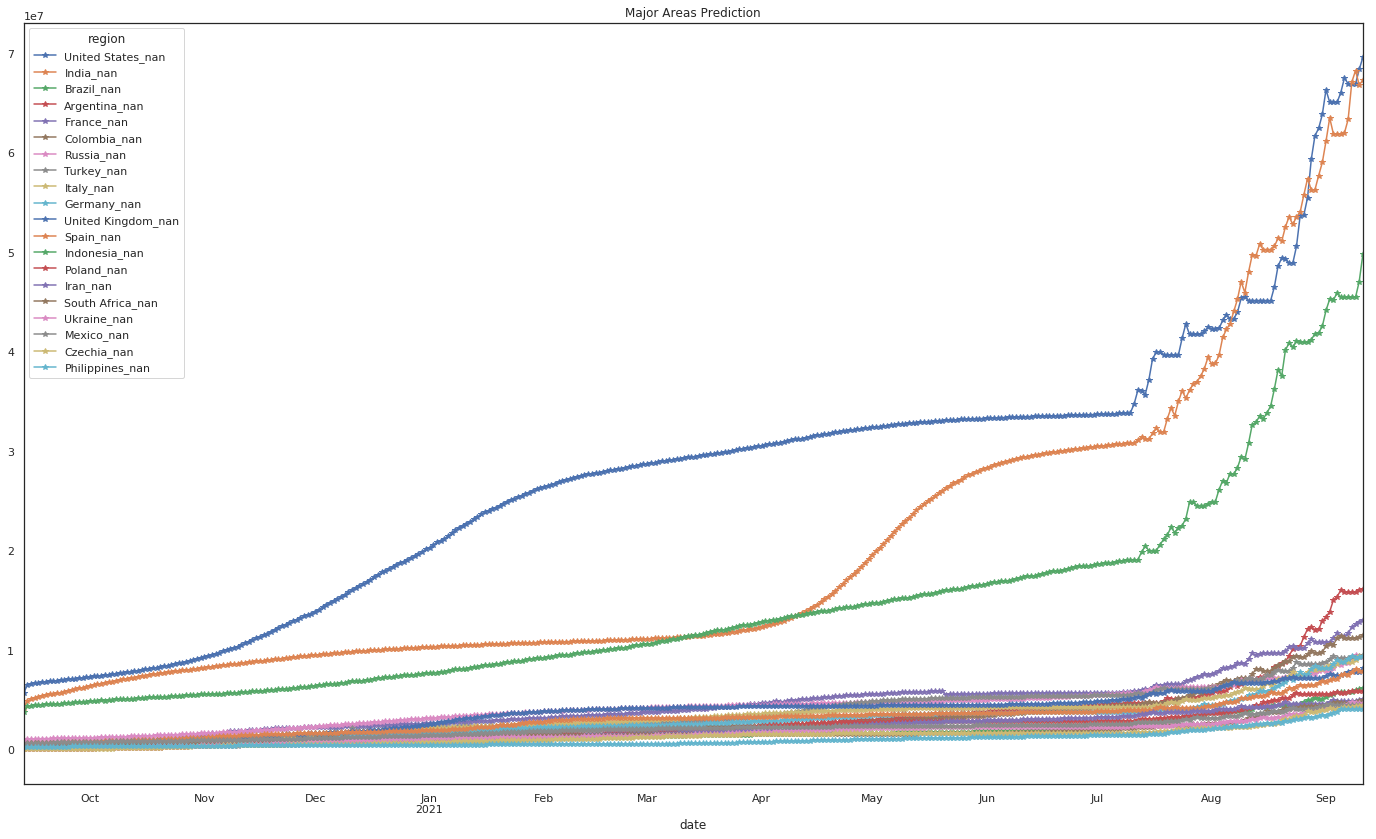

In [77]:
#
p=pred[region[:20]]
p[:].reindex(p.max().sort_values(ascending=False).index, axis=1).plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

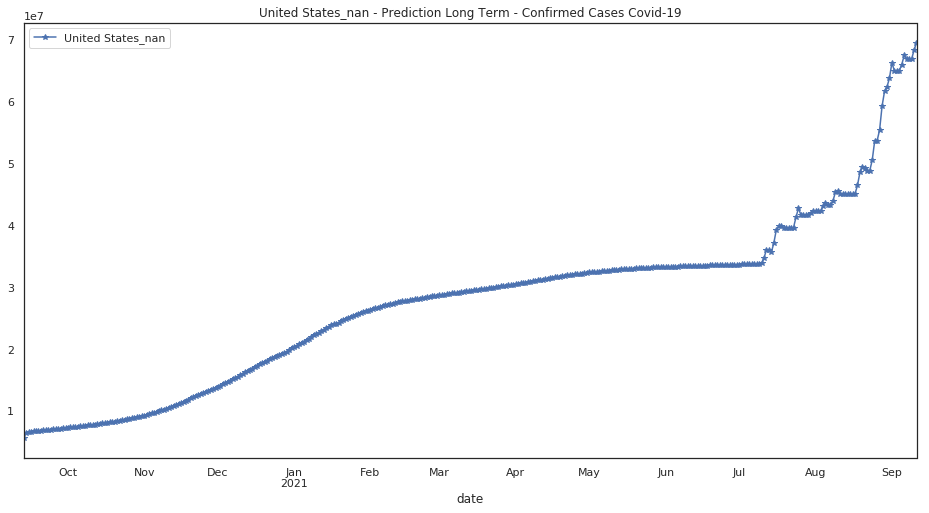

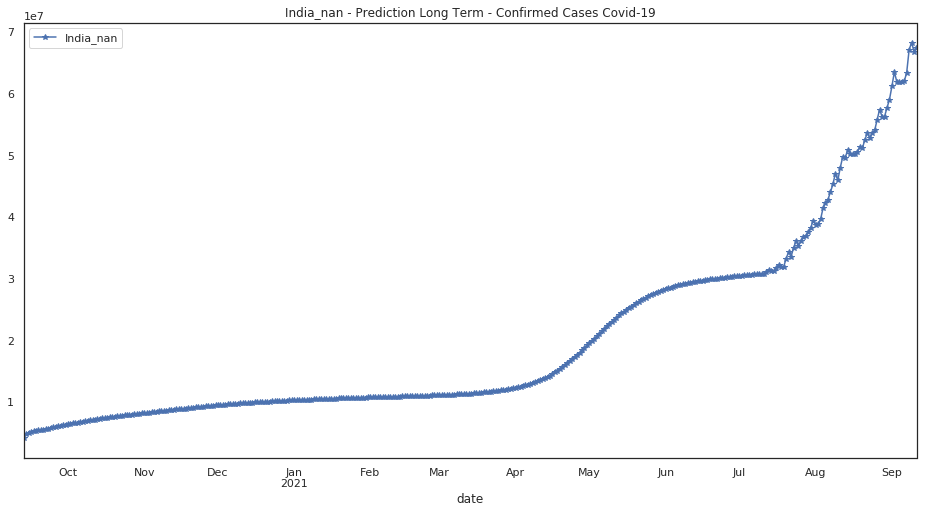

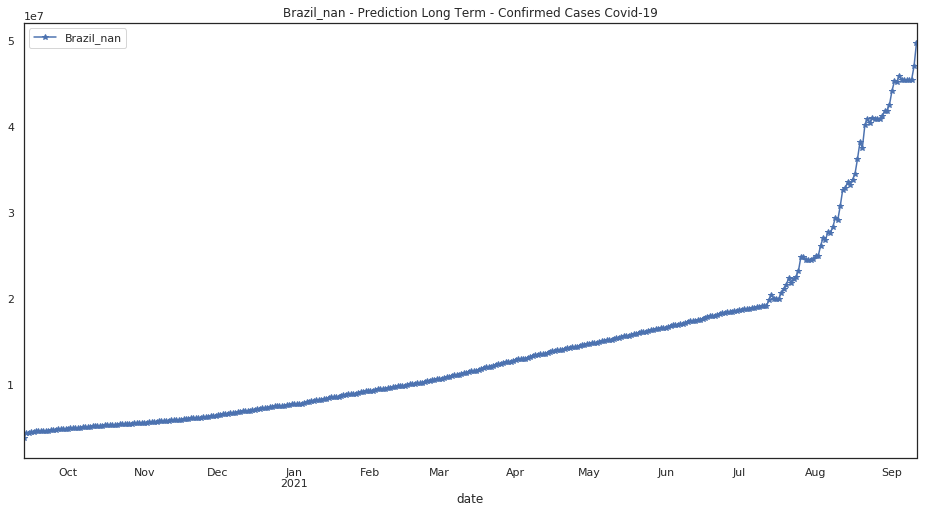

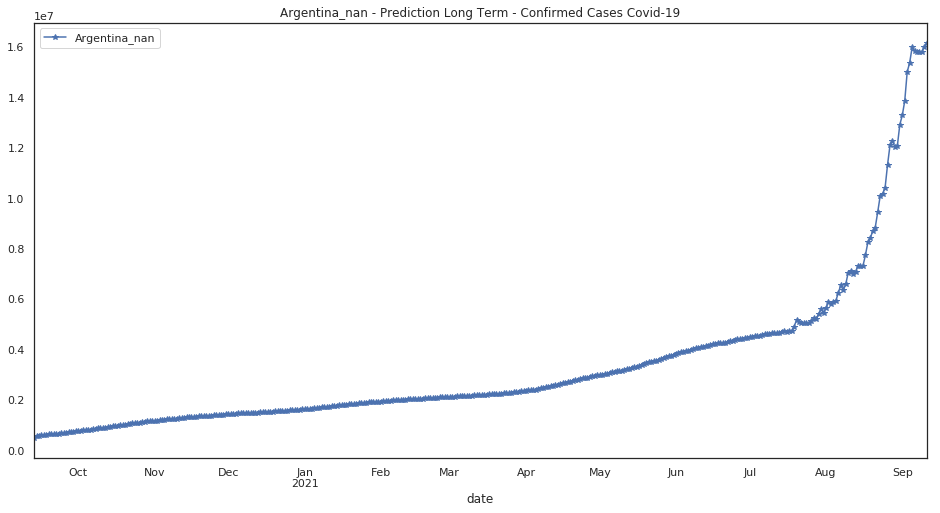

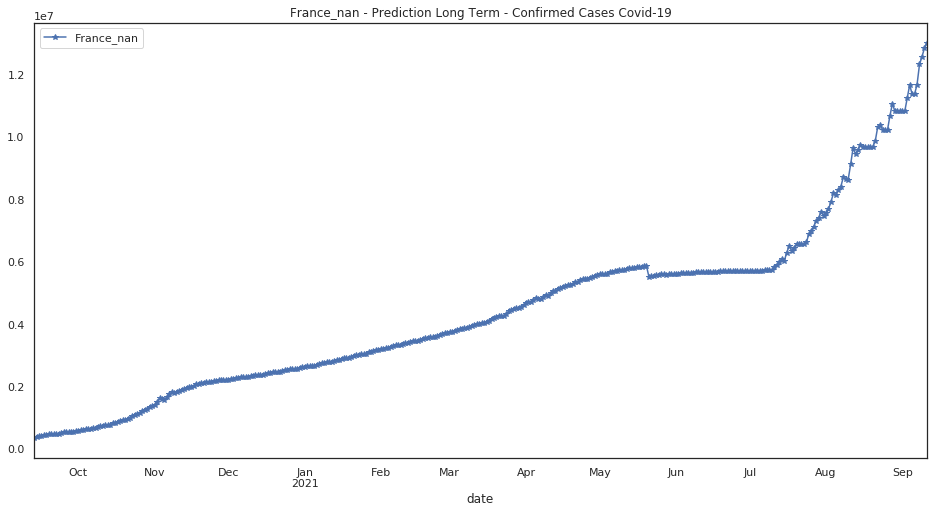

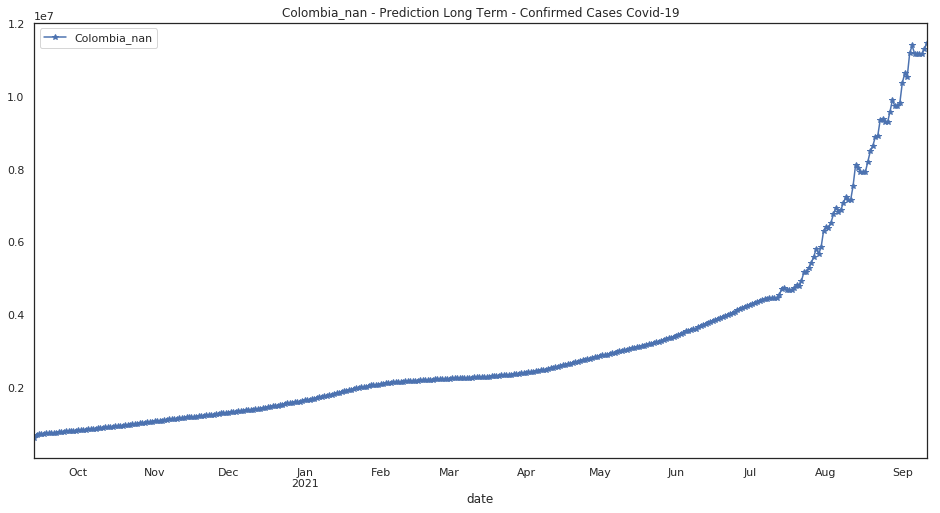

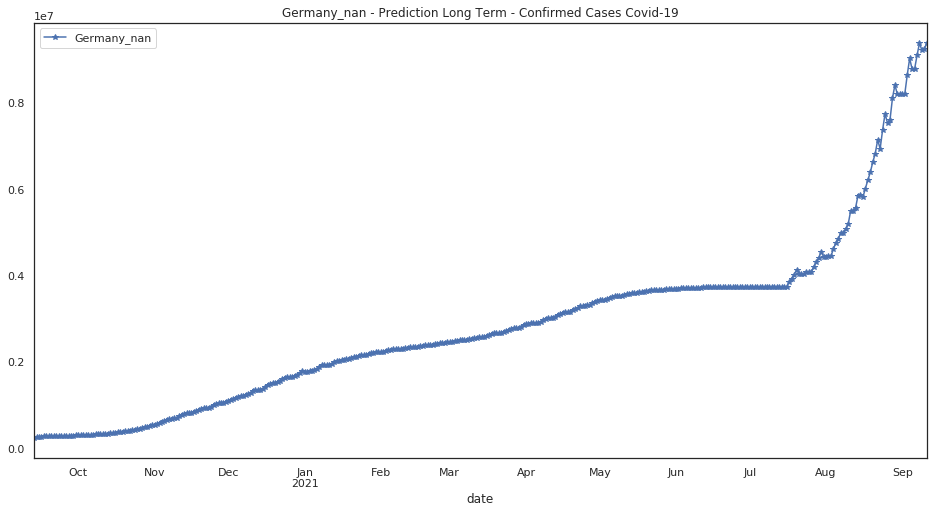

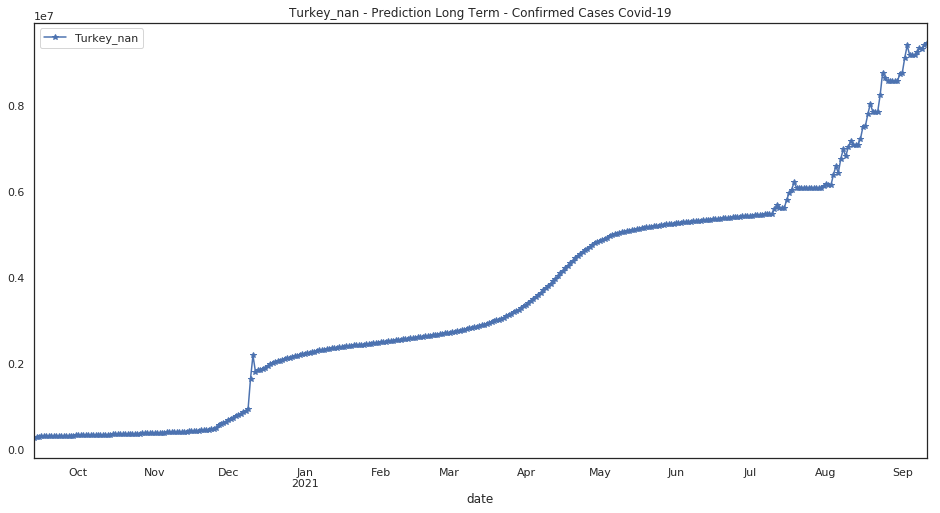

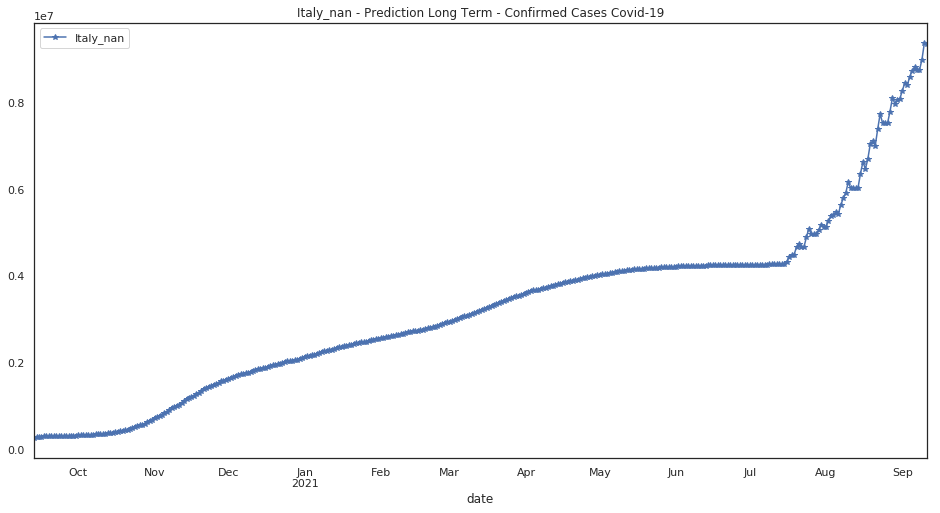

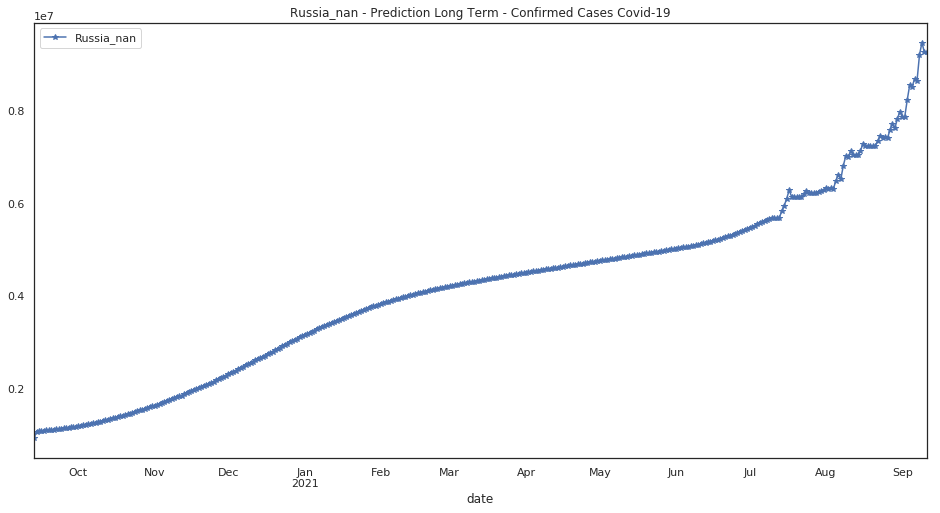

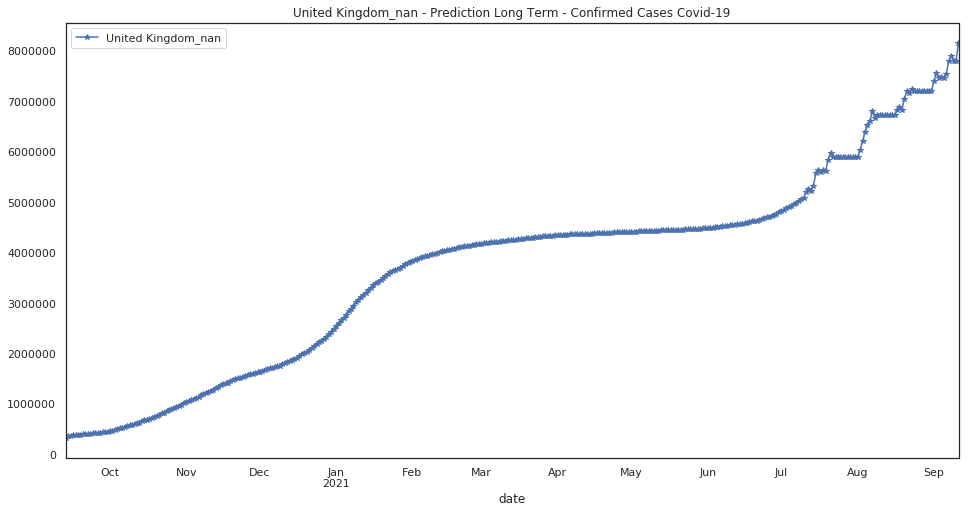

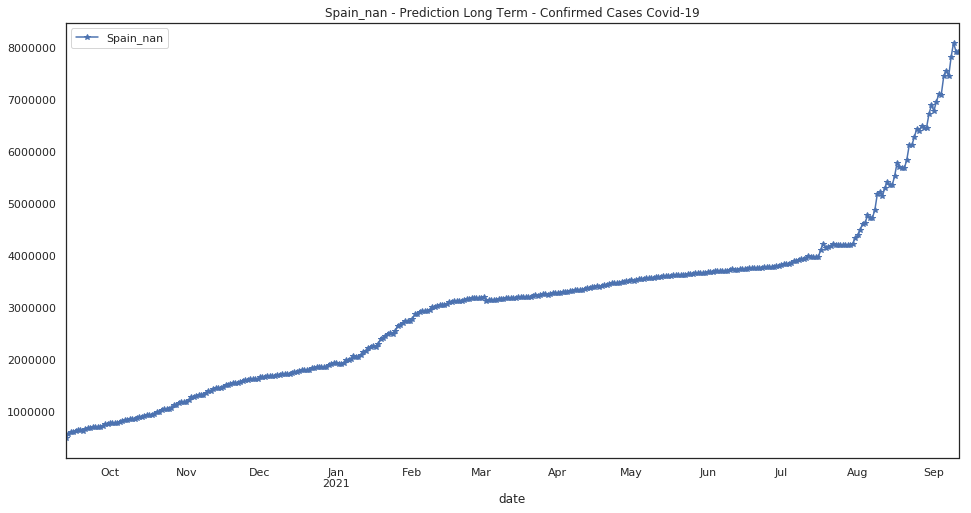

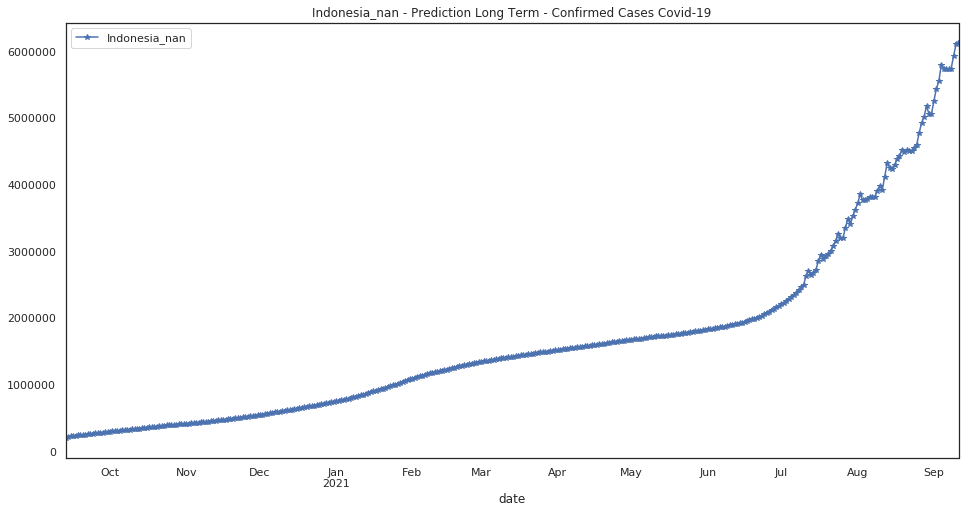

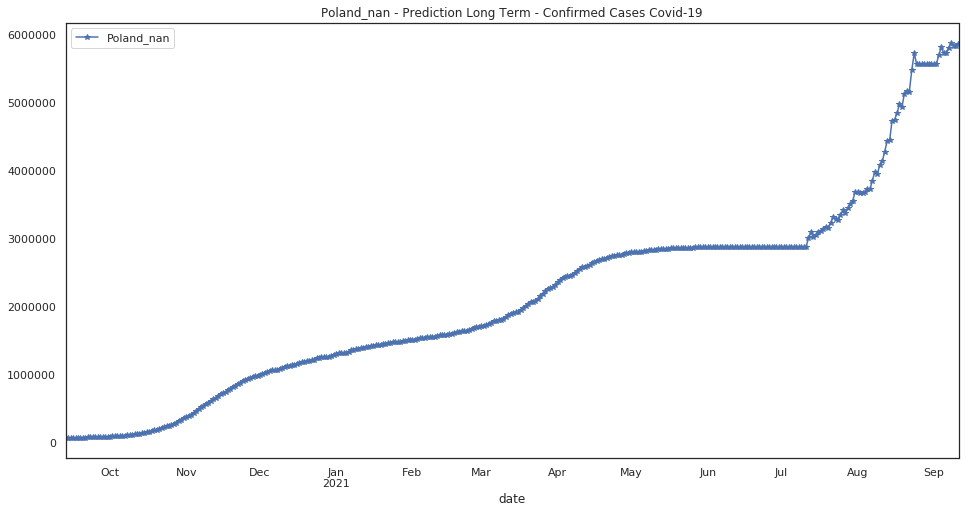

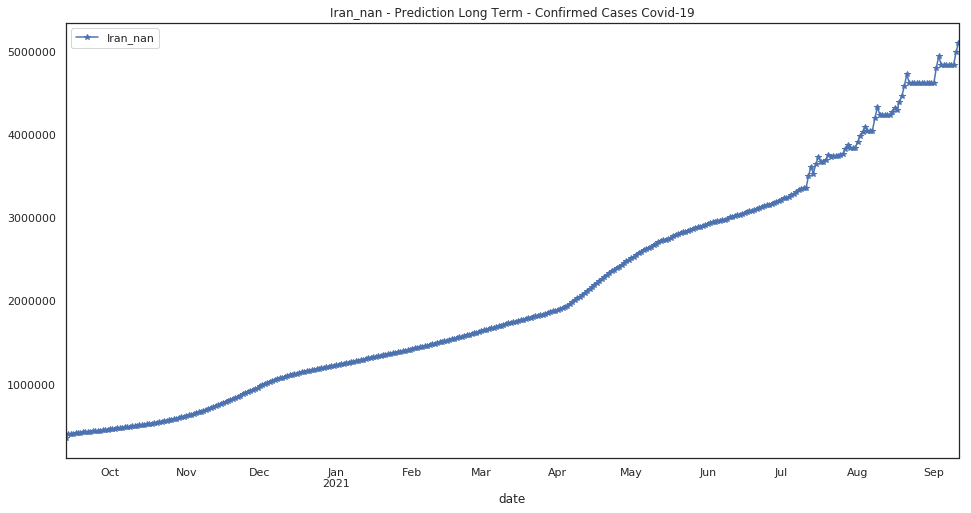

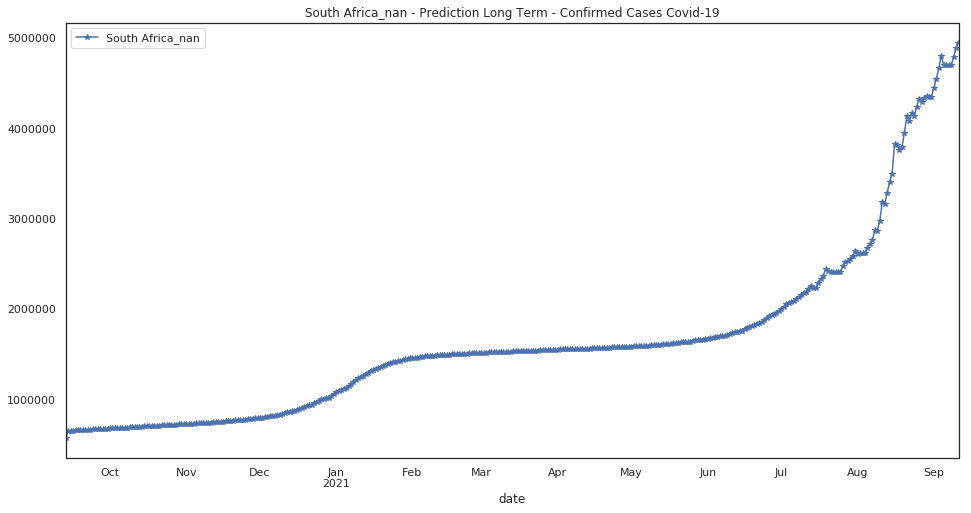

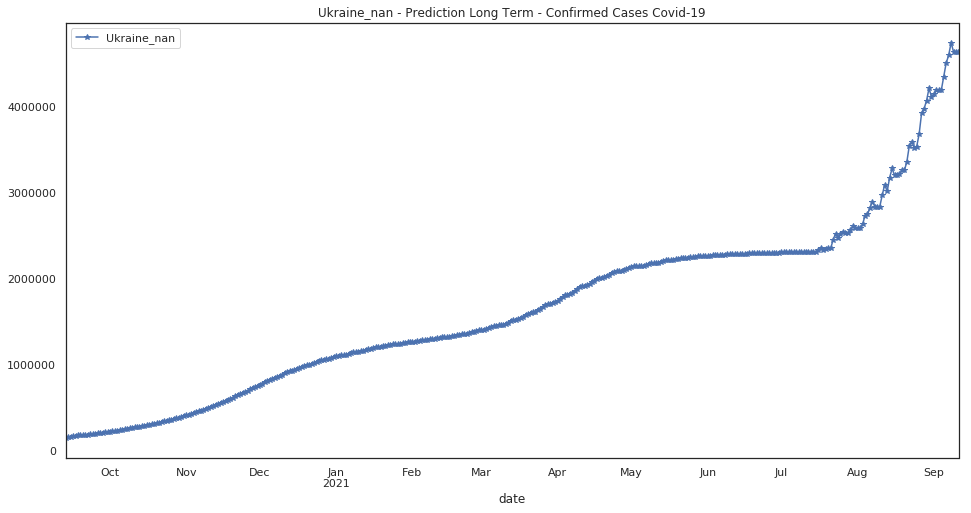

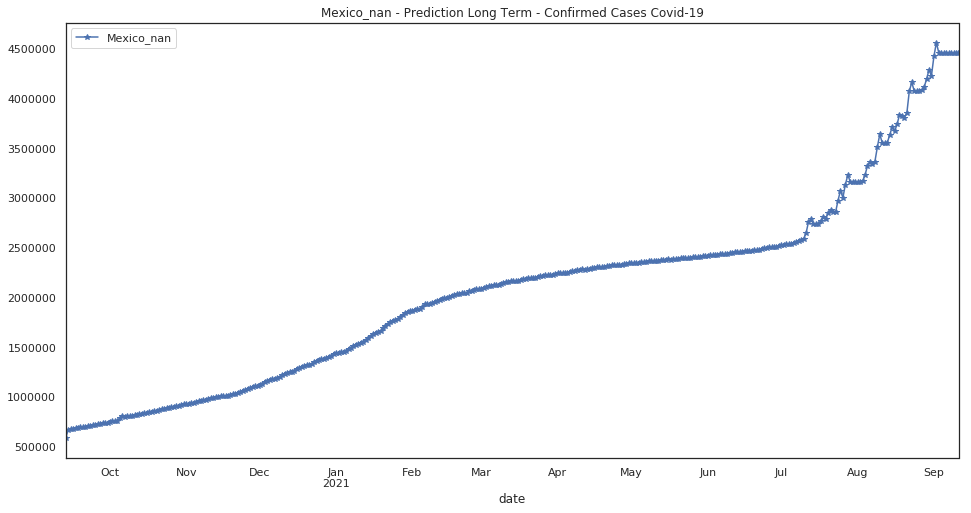

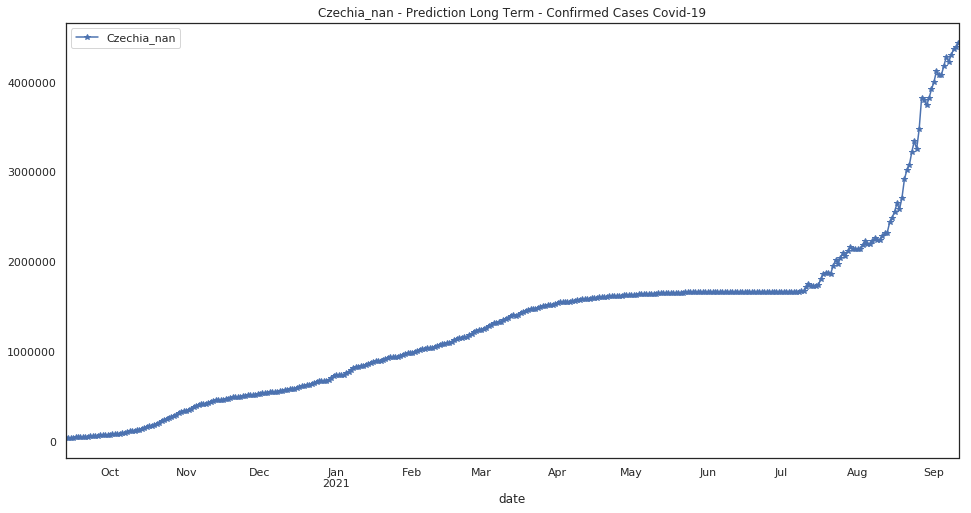

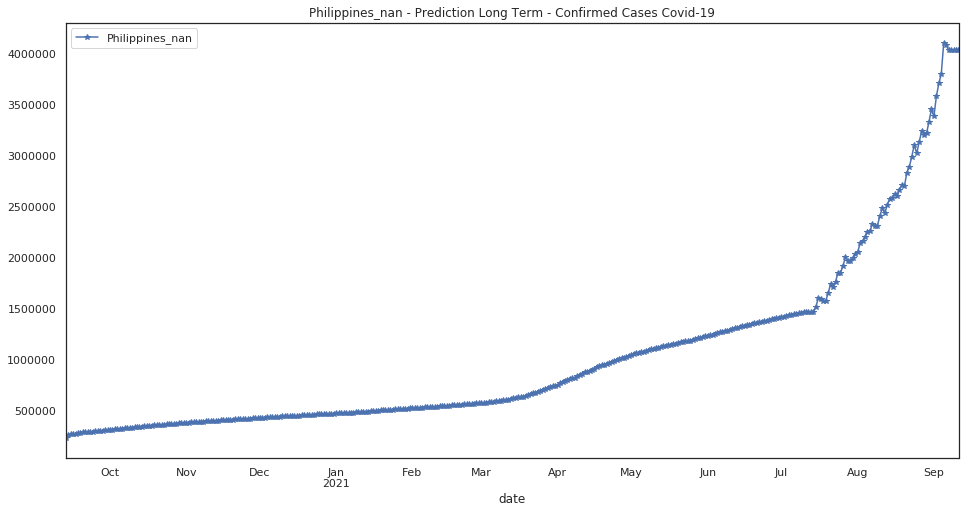

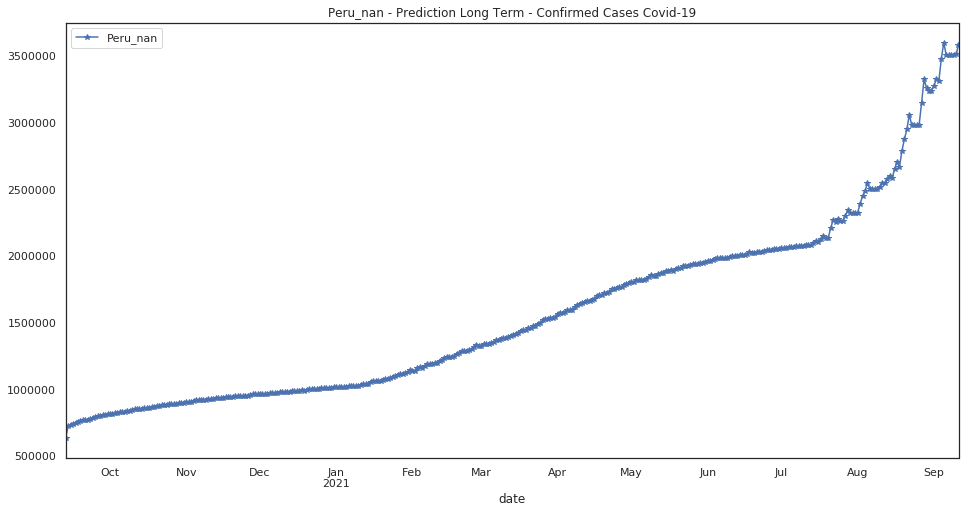

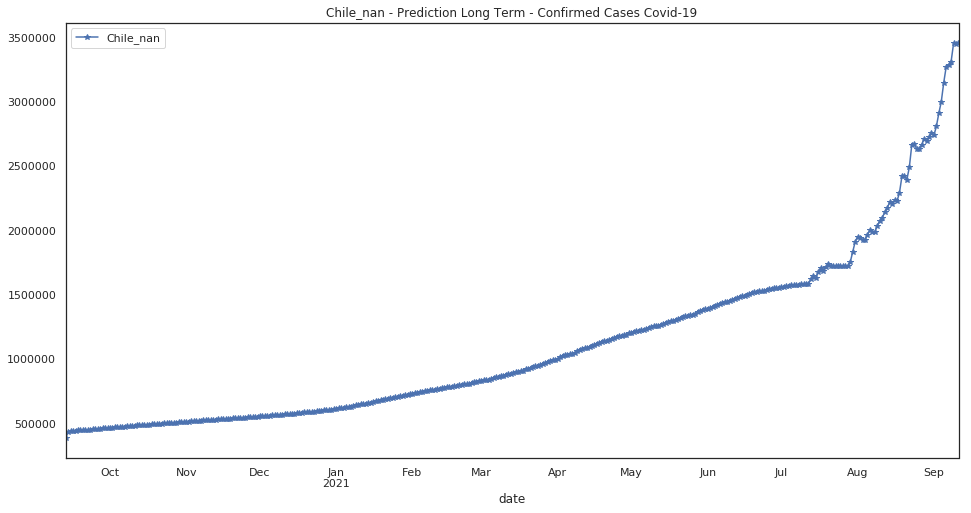

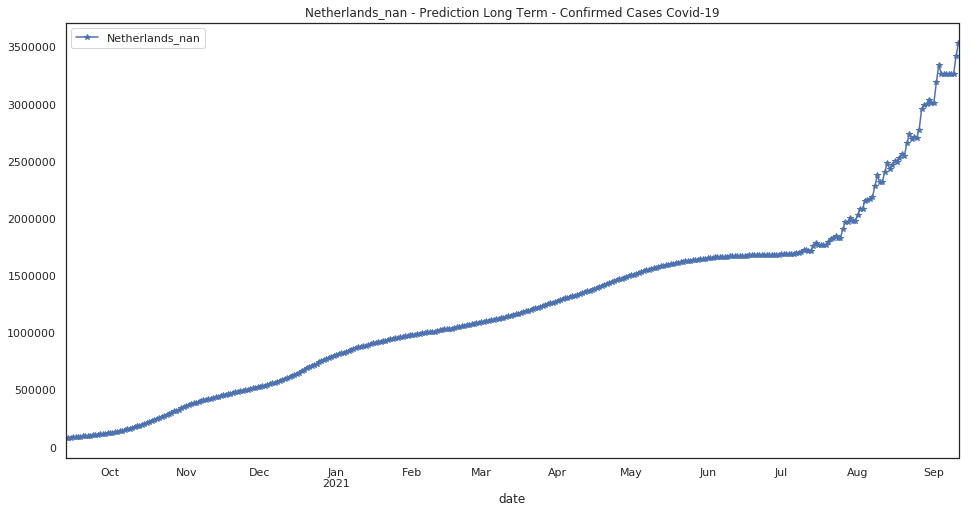

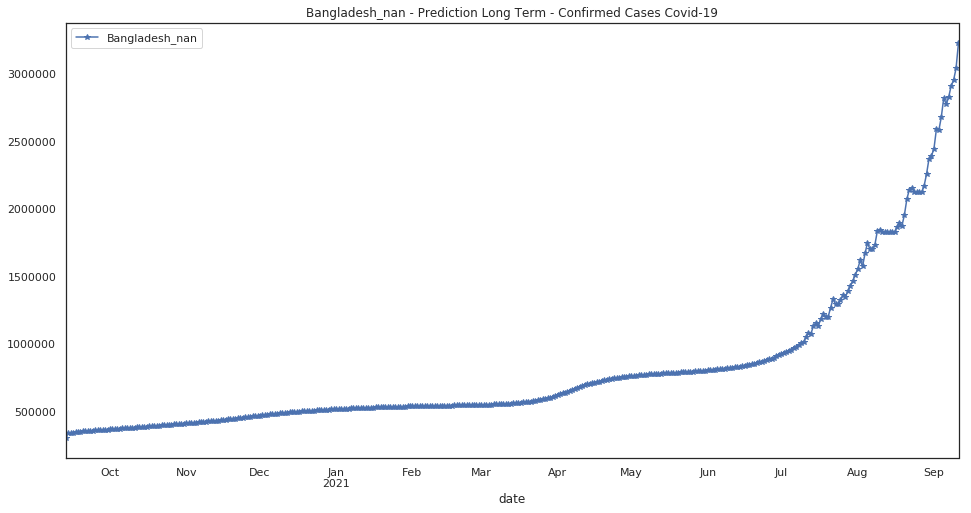

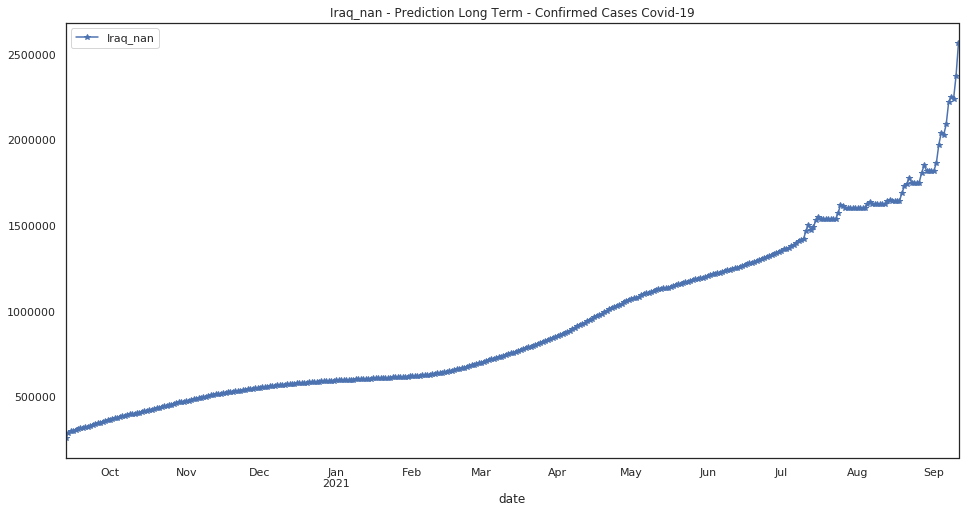

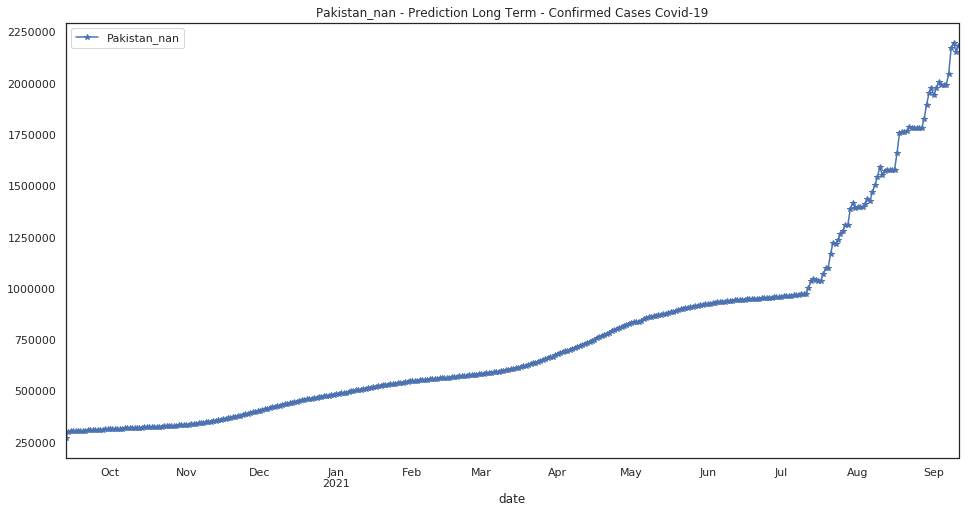

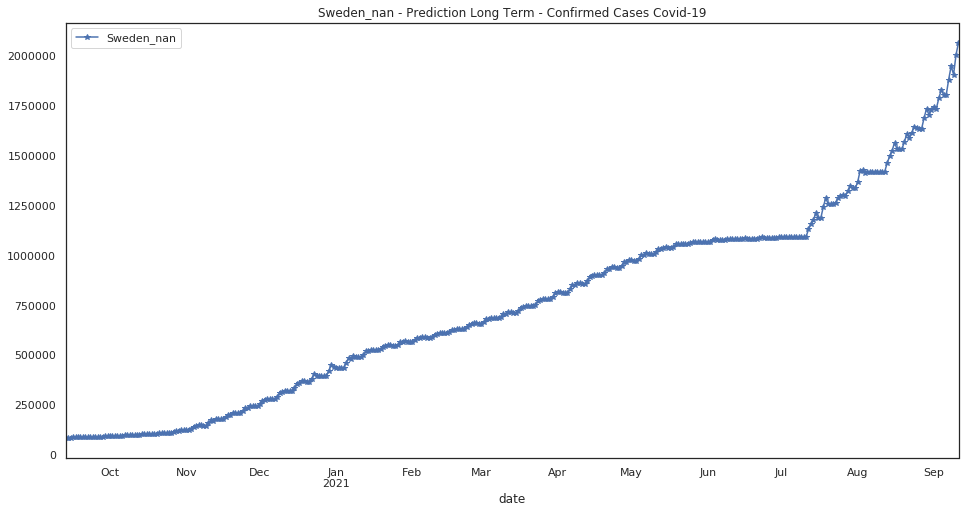

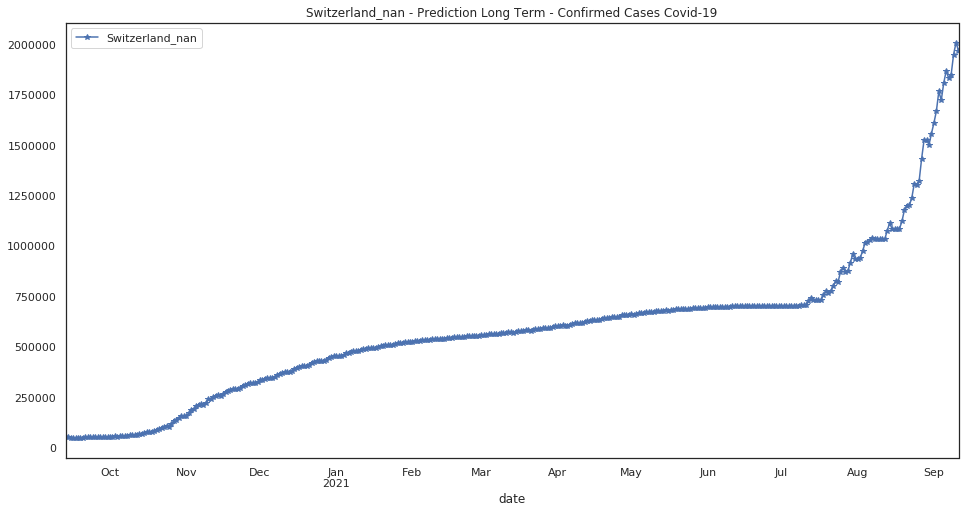

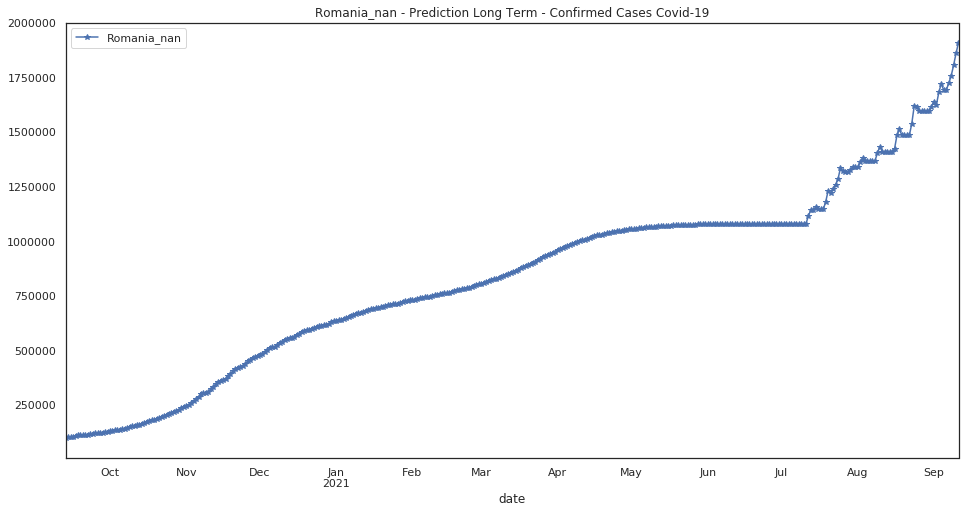

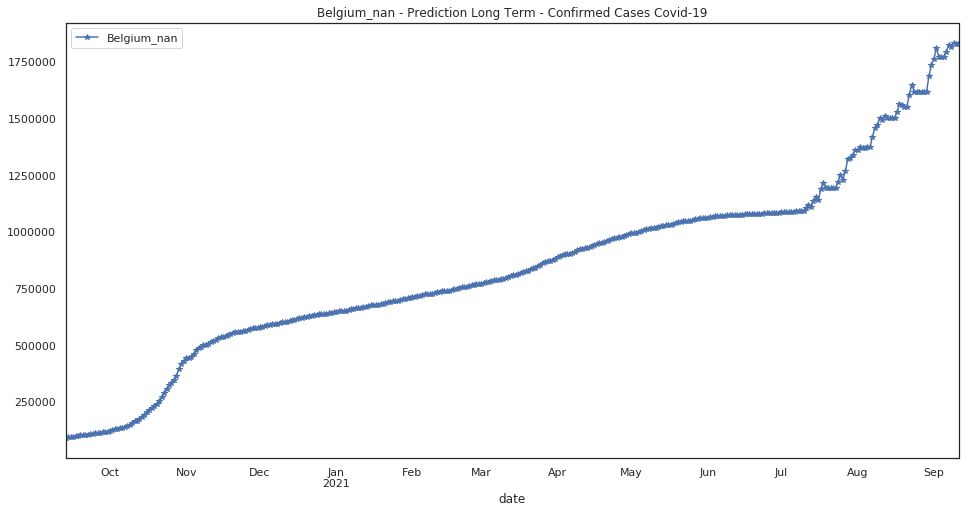

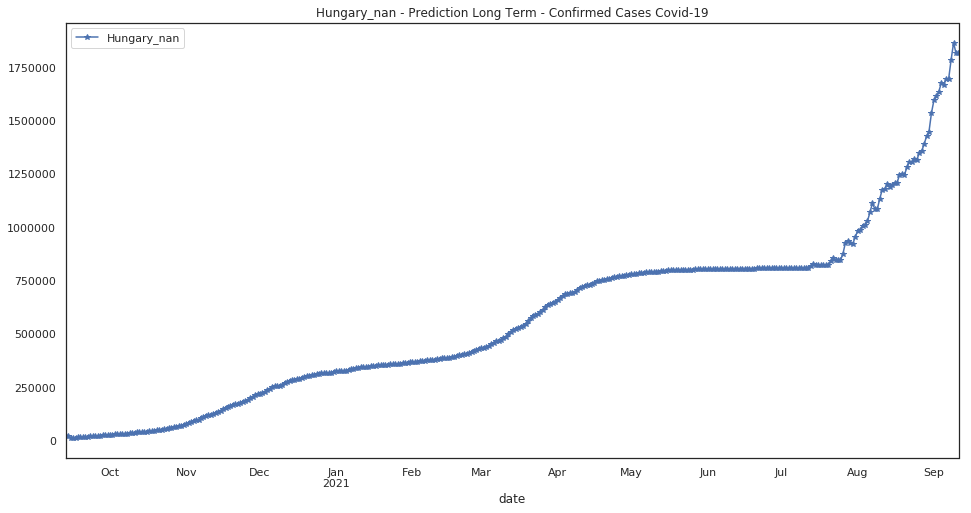

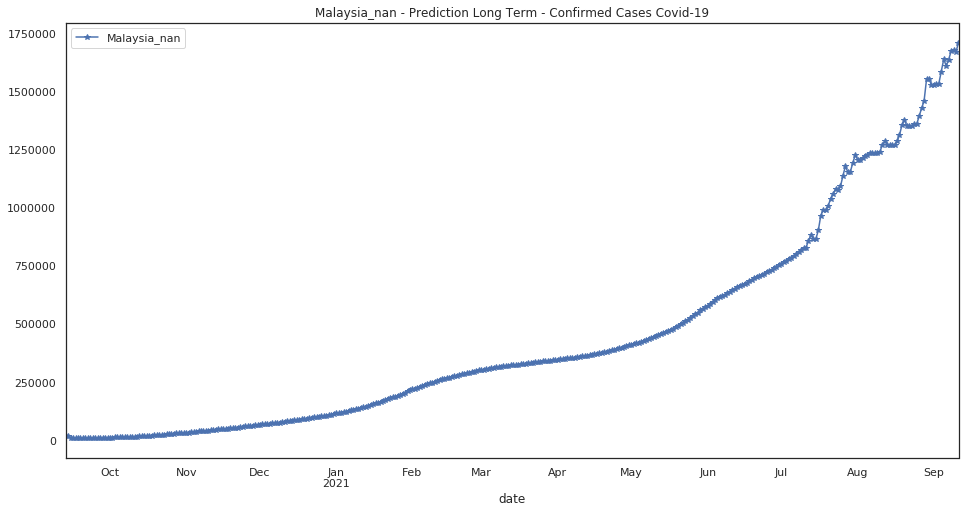

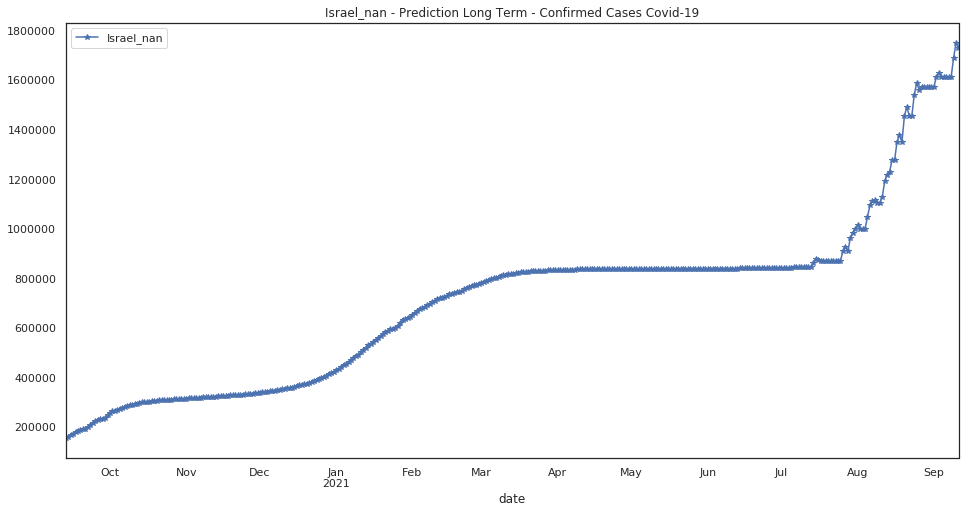

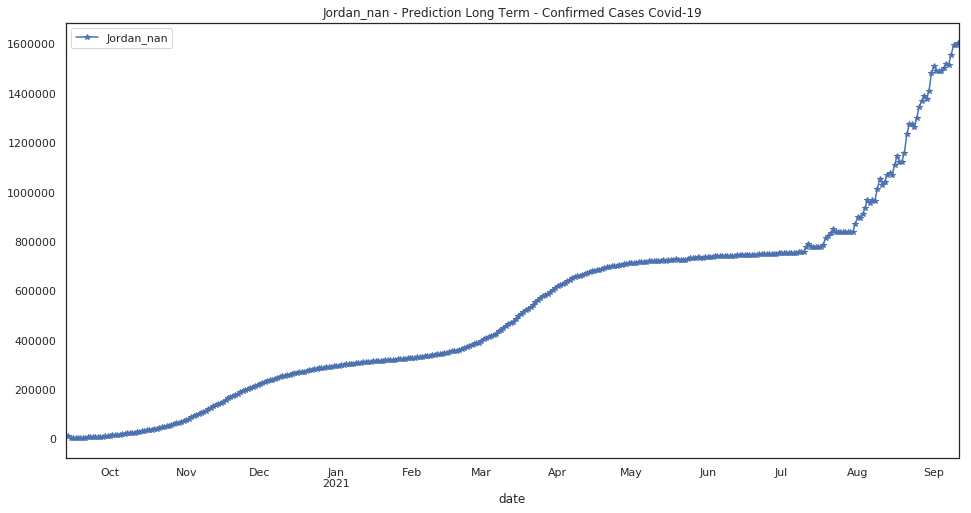

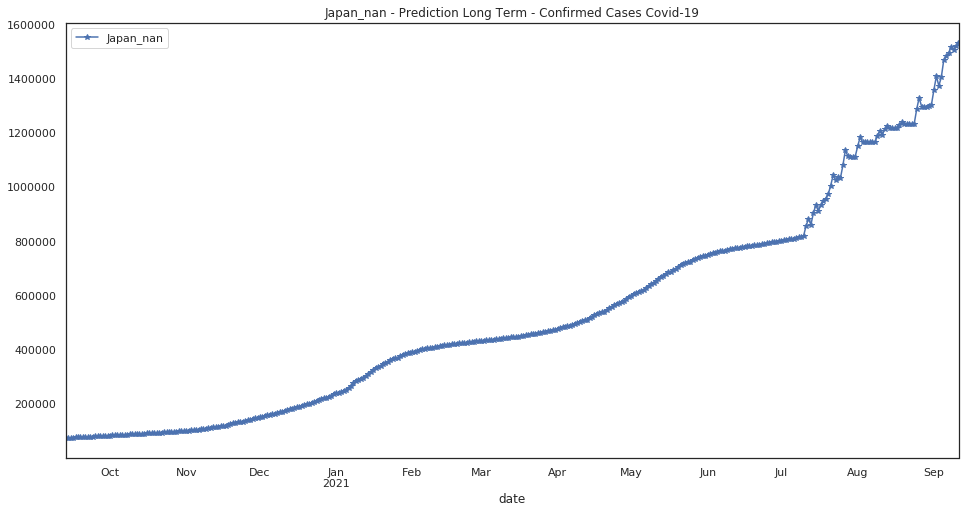

In [78]:
#
rgsx=region[:35]
for i in range (0,len(rgsx)):
        rg_print=rgsx[i]
        pred_prg=pd.DataFrame()
        pred_prg=pred[rg_print]
        pred_prg[:].plot(marker='*',figsize=(16,8),title =rg_print+' - Prediction Long Term - Confirmed Cases Covid-19')
        plt.legend(loc = 'upper left')
        plt.show()
#

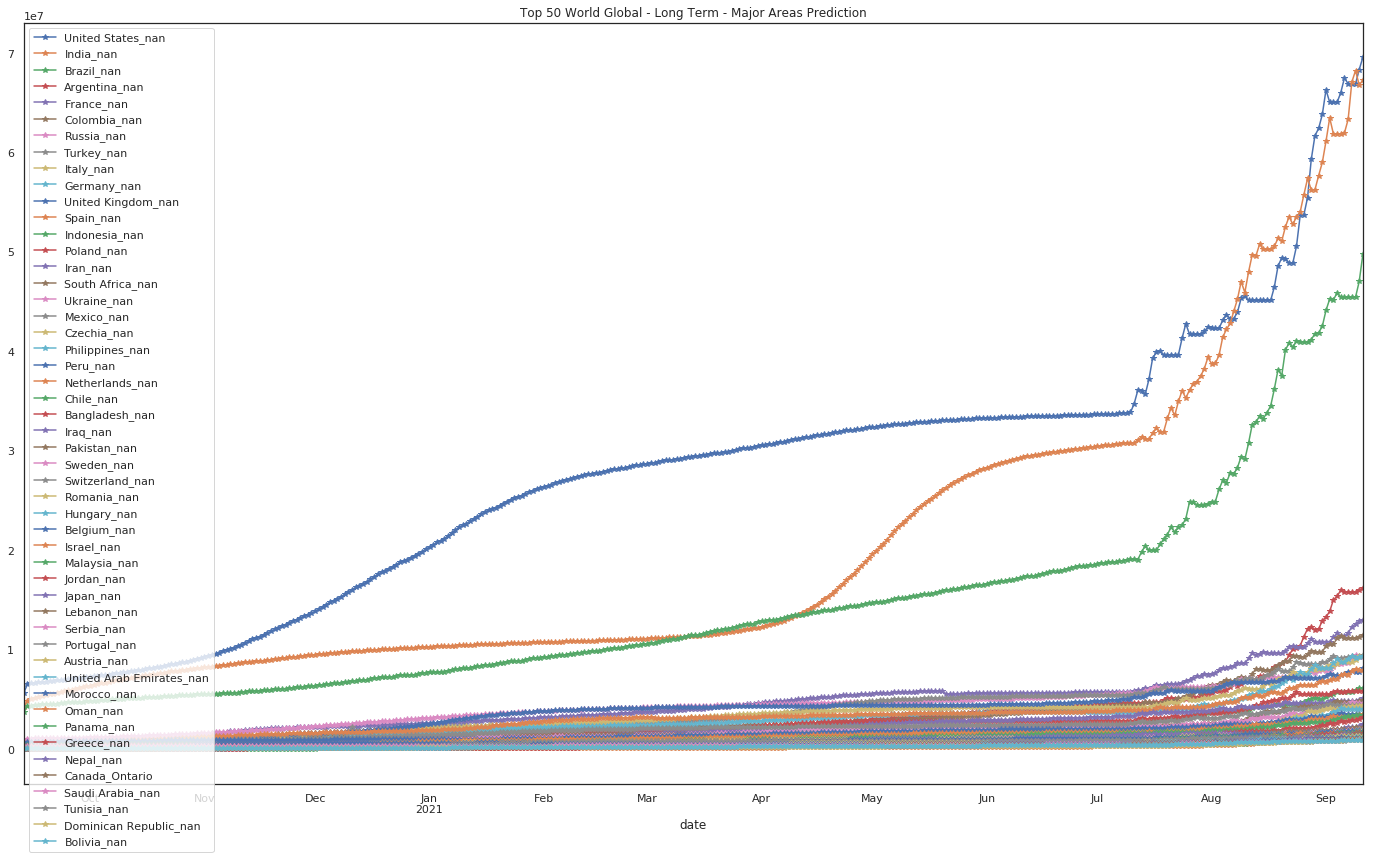

In [79]:
#region=my_train_list
pv2=pred
pv2=pv2.reindex(pv2.max().sort_values(ascending=False).index, axis=1)
pv2[:].iloc[:,0:50].plot(marker='*',figsize=(24,14),title ='Top 50 World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()

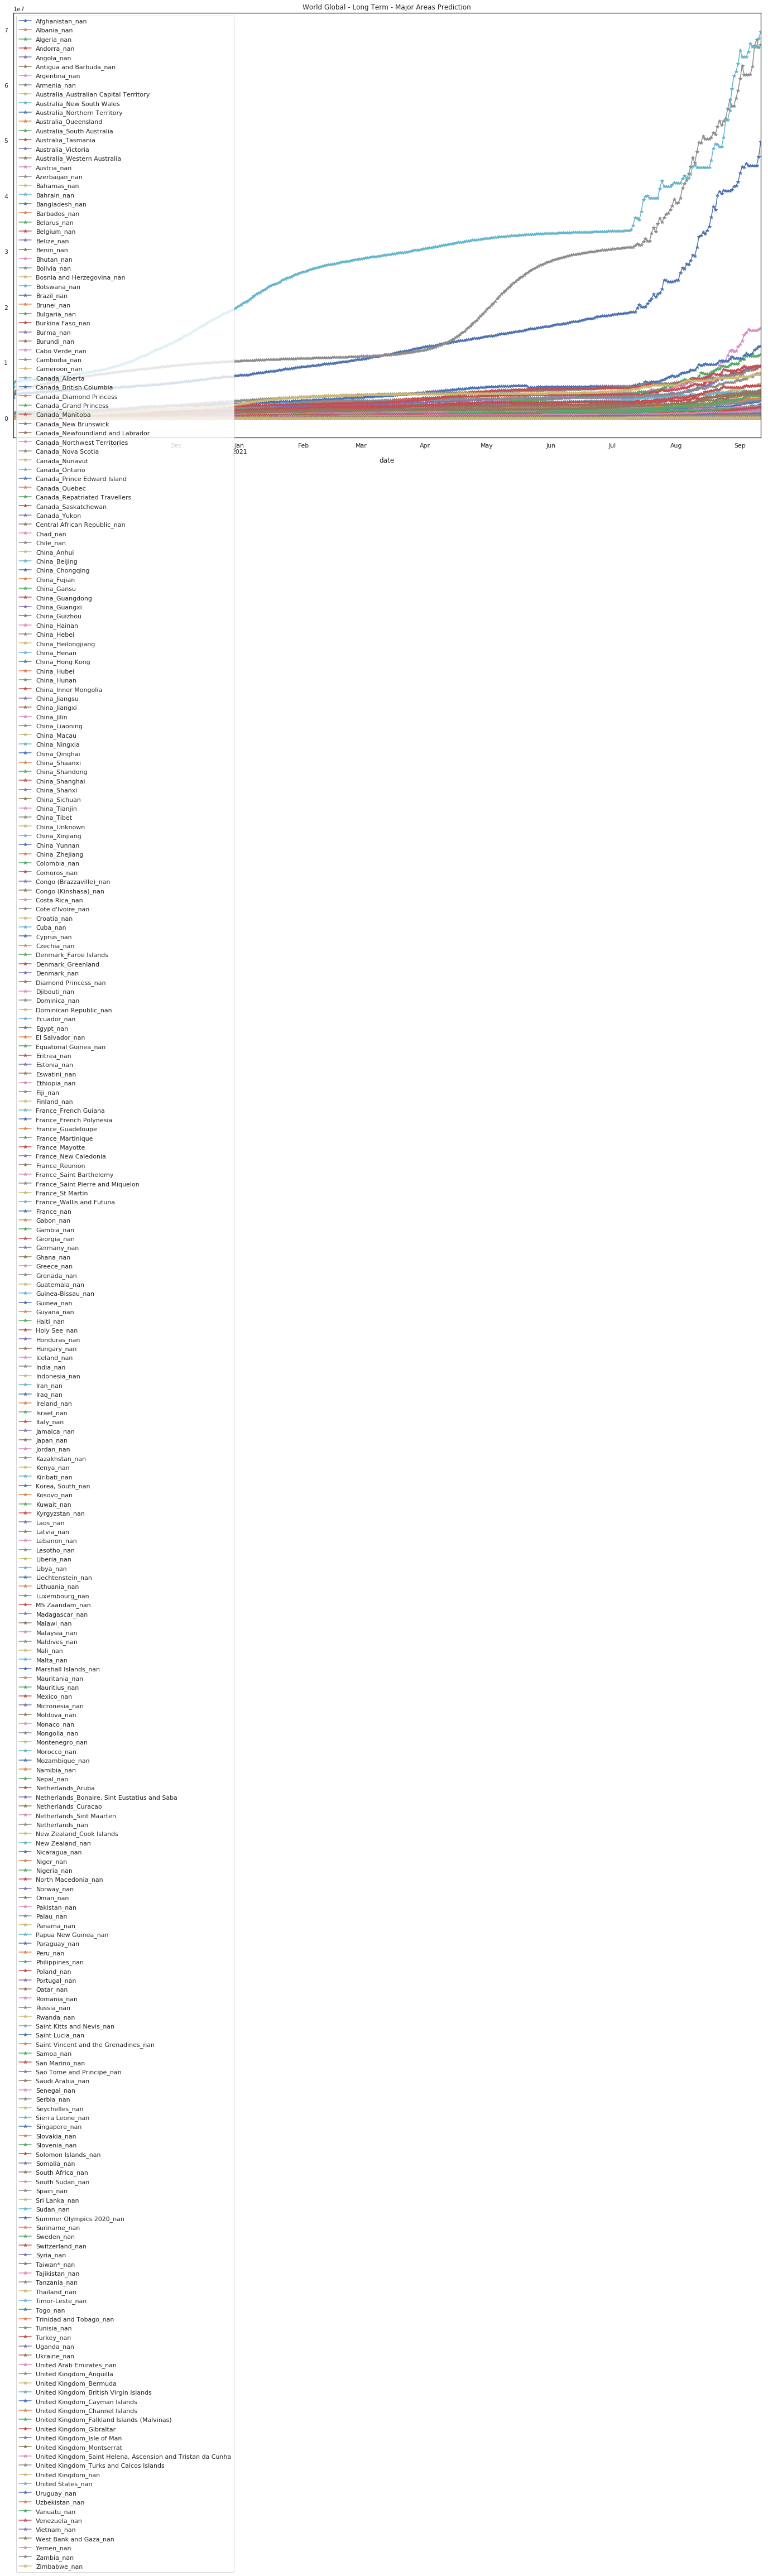

In [80]:
#region=my_train_list
pv2=pred
pv2[:].plot(marker='*',figsize=(24,14),title ='World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()


## Prediction Heatmap

In [81]:
pv1=pv2[:] #p  #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)

In [82]:
p[45:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-10-28          41208.0      20035.0      57079.0       4531.0   
2020-10-29          41342.0      20315.0      57398.0       4591.0   
2020-10-30          41420.0      20631.0      57712.0       4697.0   
2020-10-31          41489.0      20886.0      58011.0       4699.0   
2020-11-01          41570.0      21199.0      58319.0       4779.0   
2020-11-02          41684.0      21525.0      58635.0       4893.0   
2020-11-03          41804.0      21897.0      59013.0       4922.0   
2020-11-04          41882.0      22306.0      59577.0       5093.0   
2020-11-05          42000.0      22729.0      60258.0       5045.0   
2020-11-06          42058.0      23214.0      60930.0       5135.0   
2020-11-07          42089.0      23714.0      61512.0       5423.0   
2020-11-08          42210.0      24212.0      62131.0       5319.0   
2020-11-09          42360.0      24734.0      62781.0       5454.0   
2020-11-10          42536.0      25285.0      63481.0       5533.0   
2020-11-11          42699.0      25799.0      64310.0       5586.0   
2020-11-12          42872.0      26213.0      65168.0       5572.0   
2020-11-13          43058.0      26671.0      66052.0       5738.0   
2020-11-14          43125.0      27194.0      66897.0       5725.0   
2020-11-15          43273.0      27788.0      67728.0       5949.0   
2020-11-16          43529.0      28416.0      68621.0       5872.0   
2020-11-17          43749.0      29110.0      69610.0       5987.0   
2020-11-18          43997.0      29844.0      70672.0       6070.0   
2020-11-19          44253.0      30624.0      71710.0       6052.0   
2020-11-20          44448.0      31461.0      72794.0       6153.0   
2020-11-21          44572.0      32214.0      73845.0       6195.0   
2020-11-22          44736.0      32777.0      74876.0       6259.0   
2020-11-23          45018.0      33487.0      75905.0       6333.0   
2020-11-24          45245.0      34257.0      76972.0       6372.0   
2020-11-25          45434.0      34905.0      78061.0       6441.0   
2020-11-26          45659.0      35559.0      79092.0       6512.0   
...                     ...          ...          ...          ...   
2021-08-13         174768.0     215651.0     207349.0      22680.0   
2021-08-14         176449.0     223155.0     208949.0      23179.0   
2021-08-15         178221.0     232727.0     211447.0      23119.0   
2021-08-16         177631.0     239744.0     213416.0      23111.0   
2021-08-17         182295.0     245276.0     215912.0      24352.0   
2021-08-18         186410.0     240048.0     225750.0      24698.0   
2021-08-19         190973.0     240048.0     233667.0      24698.0   
2021-08-20         202622.0     240048.0     233269.0      24698.0   
2021-08-21         202610.0     240048.0     237571.0      25772.0   
2021-08-22         199836.0     240048.0     234846.0      26172.0   
2021-08-23         205663.0     242052.0     234846.0      27167.0   
2021-08-24         209941.0     255994.0     234846.0      28596.0   
2021-08-25         214686.0     268033.0     236270.0      28767.0   
2021-08-26         220342.0     266410.0     236270.0      28642.0   
2021-08-27         217361.0     264708.0     236270.0      30589.0   
2021-08-28         230998.0     267318.0     236741.0      31182.0   
2021-08-29         240240.0     268007.0     237122.0      31109.0   
2021-08-30         233937.0     277004.0     239299.0      31109.0   
2021-08-31         233937.0     289469.0     241055.0      31112.0   
2021-09-01         237929.0     292519.0     245973.0      31112.0   
2021-09-02         243278.0     294417.0     254609.0      31112.0   
2021-09-03         242356.0     291958.0     253908.0      31112.0   
2021-09-04         255483.0     295800.0     251826.0      31112.0   
2021-09-05         262950.0     302302.0     263930.0      31112.0   
2021-09-06

In [83]:
pfname='data/p+'+str(num_days_R_prediction)+'_confirmed_daily.csv'
p.to_csv(pfname, index = False, header=True)

In [84]:
#!pip install gmplot
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [85]:
heatmap=confirmed[['region','Lat','Long']]
p_m=p.T # pred.T #
### JOAO - Change Global HeapMap print - USA is too small, as USA States datasets are not used! 
#heatmap=heatmap[heatmap['region'].isin(region)]  ## heatmap for region dataset only 
heatmap=heatmap[heatmap['region'].isin(confirmed['region'])] ## Global heatmap
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')


In [86]:
heatmap_m[:]

region        Lat        Long  \
0                                      Afghanistan_nan  33.939110   67.709953   
1                                          Albania_nan  41.153300   20.168300   
2                                          Algeria_nan  28.033900    1.659600   
3                                          Andorra_nan  42.506300    1.521800   
4                                           Angola_nan -11.202700   17.873900   
5                              Antigua and Barbuda_nan  17.060800  -61.796400   
6                                        Argentina_nan -38.416100  -63.616700   
7                                          Armenia_nan  40.069100   45.038200   
8               Australia_Australian Capital Territory -35.473500  149.012400   
9                            Australia_New South Wales -33.868800  151.209300   
10                        Australia_Northern Territory -12.463400  130.845600   
11                                Australia_Queensland -27.469800  153.025100   
12                           Australia_South Australia -34.928500  138.600700   
13                                  Australia_Tasmania -42.882100  147.327200   
14                                  Australia_Victoria -37.813600  144.963100   
15                         Australia_Western Australia -31.950500  115.860500   
16                                         Austria_nan  47.516200   14.550100   
17                                      Azerbaijan_nan  40.143100   47.576900   
18                                         Bahamas_nan  25.025885  -78.035889   
19                                         Bahrain_nan  26.027500   50.550000   
20                                      Bangladesh_nan  23.685000   90.356300   
21                                        Barbados_nan  13.193900  -59.543200   
22                                         Belarus_nan  53.709800   27.953400   
23                                         Belgium_nan  50.833300    4.469936   
24                                          Belize_nan  17.189900  -88.497600   
25                                           Benin_nan   9.307700    2.315800   
26                                          Bhutan_nan  27.514200   90.433600   
27                                         Bolivia_nan -16.290200  -63.588700   
28                          Bosnia and Herzegovina_nan  43.915900   17.679100   
29                                        Botswana_nan -22.328500   24.684900   
..                                                 ...        ...         ...   
255                                    Timor-Leste_nan  -8.874217  125.727539   
256                                           Togo_nan   8.619500    0.824800   
257                            Trinidad and Tobago_nan  10.691800  -61.222500   
258                                        Tunisia_nan  33.886917    9.537499   
259                                         Turkey_nan  38.963700   35.243300   
260                                  United States_nan  40.000000 -100.000000   
261                                         Uganda_nan   1.373333   32.290275   
262                                        Ukraine_nan  48.379400   31.165600   
263                           United Arab Emirates_nan  23.424076   53.847818   
264                            United Kingdom_Anguilla  18.220600  -63.068600   
265                             United Kingdom_Bermuda  32.307800  -64.750500   
266              United Kingdom_British Virgin Islands  18.420700  -64.640000   
267                      United Kingdom_Cayman Islands  19.313300  -81.254600   
268                     United Kingdom_Channel Islands  49.372300   -2.364400   
269         United Kingdom_Falkland Islands (Malvinas) -51.796300  -59.523600   
270                           United Kingdom_Gibraltar  36.140800   -5.353600   
271                         United Kingdom_Isle of Man  54.236100   -4.548100   
272                          United Kingdom_Montserrat  16.742498  -62.187366  

In [87]:
# Fill empty lat,long with 0
heatmap_m['Lat']=heatmap_m['Lat'].fillna(0)
heatmap_m['Long']=heatmap_m['Long'].fillna(0)
#
heatmap_m_fn="heatmap_m_"+str(num_days_R_prediction)+".csv"
heatmap_m.to_csv(r'data/'+heatmap_m_fn, index = False, header=True)

In [88]:
#!pip install folium
import folium
import re

lat=40.99474
lang=6.87237

p21_cluster=folium.Map(location=[lat,lang],zoom_start=3)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
backday=num_BackTrack_Days
ndayarray=-1-backday-num_days_R_prediction
n2dayarray=-1-backday-(num_days_R_prediction*2)

for lat,lng,num,totpred,lastday7DayAvg,today7DayAvg in zip(heatmap_m.Lat,heatmap_m.Long,range(0,heatmap_m.shape[0]), heatmap_m[heatmap_m.columns[-1]], \
                                                           (heatmap_m[heatmap_m.columns[-1]]-heatmap_m[heatmap_m.columns[ndayarray]])/ndaysavg, \
                                                           (heatmap_m[heatmap_m.columns[ndayarray]]-heatmap_m[heatmap_m.columns[n2dayarray]])/ndaysavg):
    use_color=heatmap_m['region'][num][0]
    print_region=re.sub('_nan',  '', heatmap_m['region'][num])
    popup = folium.Popup( print_region+' Current7DayAVG='+str(round(today7DayAvg))+' Predicted7DayAVG='+str(round(lastday7DayAvg))+' ConfTotPred='+str(round(totpred))+' Date='+date_pred , parse_html=True)
    #
    folium.Marker(
                    [lat,lng],
                    popup=popup,
                    icon=folium.Icon(color=colors[use_color])
            ).add_to(p21_cluster)
p21_cluster

In [89]:
# Top 50 Regions in the World impacted
#
max_cont=max_countries_map
region_m2=region[:max_cont]
#
heatmap_m2=heatmap_m[heatmap_m['region'].isin(region_m2)].reset_index()
#
heatmap_m2[:]

index                    region        Lat        Long  \
0       6             Argentina_nan -38.416100  -63.616700   
1      16               Austria_nan  47.516200   14.550100   
2      20            Bangladesh_nan  23.685000   90.356300   
3      23               Belgium_nan  50.833300    4.469936   
4      27               Bolivia_nan -16.290200  -63.588700   
5      30                Brazil_nan -14.235000  -51.925300   
6      51            Canada_Ontario  51.253800  -85.323200   
7      59                 Chile_nan -35.675100  -71.543000   
8      94              Colombia_nan   4.570900  -74.297300   
9     103               Czechia_nan  49.817500   15.473000   
10    132                France_nan  46.227600    2.213700   
11    137               Germany_nan  51.165691   10.451526   
12    139                Greece_nan  39.074200   21.824300   
13    149               Hungary_nan  47.162500   19.503300   
14    151                 India_nan  20.593684   78.962880   
15    152             Indonesia_nan  -0.789300  113.921300   
16    153                  Iran_nan  32.427908   53.688046   
17    154                  Iraq_nan  33.223191   43.679291   
18    156                Israel_nan  31.046051   34.851612   
19    157                Israel_nan  31.046051   34.851612   
20    158                 Italy_nan  41.871940   12.567380   
21    160                 Japan_nan  36.204824  138.252924   
22    161                Jordan_nan  31.240000   36.510000   
23    162            Kazakhstan_nan  48.019600   66.923700   
24    171               Lebanon_nan  33.854700   35.862300   
25    172               Lebanon_nan  33.854700   35.862300   
26    182              Malaysia_nan   4.210484  101.975766   
27    189                Mexico_nan  23.634500 -102.552800   
28    195               Morocco_nan  31.791700   -7.092600   
29    198                 Nepal_nan  28.166700   84.250000   
30    203           Netherlands_nan  52.132600    5.291300   
31    211                  Oman_nan  21.512583   55.923255   
32    212              Pakistan_nan  30.375300   69.345100   
33    214                Panama_nan   8.538000  -80.782100   
34    217                  Peru_nan  -9.190000  -75.015200   
35    218           Philippines_nan  12.879721  121.774017   
36    219                Poland_nan  51.919400   19.145100   
37    220              Portugal_nan  39.399900   -8.224500   
38    222               Romania_nan  45.943200   24.966800   
39    223                Russia_nan  61.524010  105.318756   
40    231          Saudi Arabia_nan  23.885942   45.079162   
41    233                Serbia_nan  44.016500   21.005900   
42    241          South Africa_nan -30.559500   22.937500   
43    243                 Spain_nan  40.463667   -3.749220   
44    248                Sweden_nan  60.128161   18.643501   
45    249           Switzerland_nan  46.818200    8.227500   
46    258               Tunisia_nan  33.886917    9.537499   
47    259                Turkey_nan  38.963700   35.243300   
48    260         United States_nan  40.000000 -100.000000   
49    262               Ukraine_nan  48.379400   31.165600   
50    263  United Arab Emirates_nan  23.424076   53.847818   
51    275        United Kingdom_nan  55.378100   -3.436000   

    2020-09-13 00:00:00  2020-09-14 00:00:00  2020-09-15 00:00:00  \
0              490133.0             555537.0             579150.0   
1               38593.0              38923.0              33541.0   
2              301680.0             337520.0             340141.0   
3               90712.0              93455.0              94306.0   
4              119528.0             126791.0             127619.0   
5             3753144.0            4330455.0            4383401.0   
6               50112.0              50475.0              46905.0   
7              385723.0             434748.0             437029.0   
8              629111.0             716319.0             728927.0   
9               41211.0    

In [90]:
import folium
import re

lat=40.99474
lang=6.87237

p21_reg_cluster=folium.Map(location=[lat,lang],zoom_start=3)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_reg_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
backday=num_BackTrack_Days
ndayarray=-1-backday-num_days_R_prediction
n2dayarray=-1-backday-(num_days_R_prediction*2)

for lat2,lng2,num2,totpred2,lastday7DayAvg2,today7DayAvg2 in zip(heatmap_m2.Lat,heatmap_m2.Long,range(0,heatmap_m2.shape[0]), heatmap_m2[heatmap_m2.columns[-1]], \
                                                                (heatmap_m2[heatmap_m2.columns[-1]]-heatmap_m2[heatmap_m2.columns[ndayarray]])/ndaysavg, \
                                                                (heatmap_m2[heatmap_m2.columns[ndayarray]]-heatmap_m2[heatmap_m2.columns[n2dayarray]])/ndaysavg):
    use_color2=heatmap_m2['region'][num2][0]
    print_region=re.sub('_nan',  '', heatmap_m2['region'][num2])
    popup2 = folium.Popup( print_region+' Current7DayAvg='+str(round(today7DayAvg2))+' Predicted7DayAvg='+str(round(lastday7DayAvg2))+' ConfTotPred='+str(round(totpred2))+' Date='+date_pred, parse_html=True)  
    #
    folium.Marker(
                    [lat2,lng2],
                    popup=popup2,
                    icon=folium.Icon(color=colors[use_color2])
            ).add_to(p21_reg_cluster)
p21_reg_cluster

In [91]:
#
datemap=datetime.today().strftime('%Y-%m-%d')
p21_cluster.save("heatmaps/Heatmap_Folium-Global-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")
#
p21_reg_cluster.save("heatmaps/Heatmap_Folium-Regional-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")

In [92]:
print("Stats and Forecast Done for Today!")
print("I'm done with this past month of March, April and May!")
print(" April-May-June-July are going to be hard with this Global Lock-Down!")

Stats and Forecast Done for Today!
I'm done with this past month of March, April and May!
 April-May-June-July are going to be hard with this Global Lock-Down!


In [93]:
exit()